# 1. Import libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# 2. Load data

In [89]:
df_1 = pd.read_csv('title_location_company_salary.csv')
df_2 = pd.read_csv('qualifications.csv')
df_3 = pd.read_csv('benefits.csv')

In [90]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1287 non-null   int64  
 1   Title       1287 non-null   object 
 2   Company     1285 non-null   object 
 3   Location    1116 non-null   object 
 4   Salary      1209 non-null   float64
 5   Levels      1287 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 60.5+ KB


In [91]:
df_1.head()

Unnamed: 0           Title        Company           Location    Salary  \
0           0  Data Scientist       Numerdox     Sacramento, CA  110000.0   
1           1    Data Analyst        Cepheid           Lodi, CA  120000.0   
2           2  Data Scientist        Cepheid      Sunnyvale, CA  150000.0   
3           3  Data Scientist  Verana Health  San Francisco, CA  150000.0   
4           4  Data Scientist         Tinder  San Francisco, CA  130000.0   

    Levels  
0      Jr.  
1  Unknown  
2    Staff  
3  Unknown  
4      Jr.

In [103]:
# Check if any locations contain 'TX' in the Location column of df_1
texas_locations_exist = df_1['Location'].str.contains('TX', na=False).any()

if texas_locations_exist:
    print("Texas locations exist in df_1.")
else:
    print("No Texas locations found in df_1.")


No Texas locations found in df_1.


In [92]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 363 entries, Unnamed: 0 to Editing
dtypes: float64(362), int64(1)
memory usage: 3.6 MB


In [93]:
df_2.head()

Unnamed: 0  Analysis skills  Communication skills  Research    R  \
0           0              1.0                   1.0       1.0  1.0   
1           1              0.0                   0.0       0.0  1.0   
2           2              0.0                   0.0       0.0  0.0   
3           3              0.0                   1.0       0.0  1.0   
4           4              0.0                   0.0       0.0  0.0   

   Machine learning  Bachelor's degree  Master's degree  Doctoral degree  \
0               1.0                1.0              1.0              1.0   
1               0.0                1.0              1.0              0.0   
2               1.0                1.0              1.0              1.0   
3               0.0                0.0              1.0              0.0   
4               0.0                0.0              0.0              1.0   

   Doctor of Philosophy  ...  Spectroscopy  SoC  GLP  CGMP  Bootstrap  \
0                   1.0  ...           0.0  0.0  0.0   0.0        0.0   
1                   0.0  ...           0.0  0.0  0.0   0.0        0.0   
2                   0.0  ...           0.0  0.0  0.0   0.0        0.0   
3                   0.0  ...           0.0  0.0  0.0   0.0        0.0   
4                   1.0  ...           0.0  0.0  0.0   0.0        0.0   

   Lending  Grant writing  Pass polygraph test  Pivot tables  Editing  
0      0.0            0.0                  0.0           0.0      0.0  
1      0.0            0.0                  0.0           0.0      0.0  
2      0.0            0.0                  0.0           0.0      0.0  
3      0.0            0.0                  0.0           0.0      0.0  
4      0.0            0.0                  0.0           0.0      0.0  

[5 rows x 363 columns]

In [94]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1287 non-null   int64  
 1   Health insurance                     558 non-null    float64
 2   Paid time off                        558 non-null    float64
 3   Commuter assistance                  558 non-null    float64
 4   Employee stock purchase plan         558 non-null    float64
 5   401(k) matching                      558 non-null    float64
 6   401(k)                               558 non-null    float64
 7   Dental insurance                     558 non-null    float64
 8   Employee assistance program          558 non-null    float64
 9   Unlimited paid time off              558 non-null    float64
 10  Work from home                       558 non-null    float64
 11  Flexible schedule             

In [95]:
df_3.head()

Unnamed: 0  Health insurance  Paid time off  Commuter assistance  \
0           0               NaN            NaN                  NaN   
1           1               1.0            1.0                  0.0   
2           2               1.0            1.0                  0.0   
3           3               NaN            NaN                  NaN   
4           4               1.0            0.0                  1.0   

   Employee stock purchase plan  401(k) matching  401(k)  Dental insurance  \
0                           NaN              NaN     NaN               NaN   
1                           0.0              0.0     0.0               0.0   
2                           0.0              0.0     0.0               0.0   
3                           NaN              NaN     NaN               NaN   
4                           1.0              1.0     1.0               0.0   

   Employee assistance program  Unlimited paid time off  ...  \
0                          NaN                      NaN  ...   
1                          0.0                      0.0  ...   
2                          0.0                      0.0  ...   
3                          NaN                      NaN  ...   
4                          0.0                      0.0  ...   

   Cell phone reimbursement  On-site gym  Bereavement leave  \
0                       NaN          NaN                NaN   
1                       0.0          0.0                0.0   
2                       0.0          0.0                0.0   
3                       NaN          NaN                NaN   
4                       0.0          0.0                0.0   

   Relocation assistance  Family leave  Free parking  \
0                    NaN           NaN           NaN   
1                    0.0           0.0           0.0   
2                    0.0           0.0           0.0   
3                    NaN           NaN           NaN   
4                    0.0           0.0           0.0   

   Meals & incidentals stipend  Employee stock ownership plan  Free massages  \
0                          NaN                            NaN            NaN   
1                          0.0                            0.0            0.0   
2                          0.0                            0.0            0.0   
3                          NaN                            NaN            NaN   
4                          0.0                            0.0            0.0   

   Green card sponsorship  
0                     NaN  
1                     0.0  
2                     0.0  
3                     NaN  
4                     0.0  

[5 rows x 53 columns]

# 3. Data cleaning

In [96]:
df_1 = df_1.drop('Unnamed: 0', axis=1)
df_2 = df_2.drop('Unnamed: 0', axis=1)
df_3 = df_3.drop('Unnamed: 0', axis=1)

In [97]:
for i in df_2.columns:
    df_2.loc[:,i] = df_2.loc[:,i].astype('Int64')
    
for i in df_3.columns:
    df_3.loc[:,i] = df_3.loc[:,i].astype('Int64')

# 4. EDA

In [99]:
pd.pivot_table(df_1, 'Salary', index=['Title'], columns=['Levels'])

Levels                          Distinguished            Jr.           Lead  \
Title                                                                         
Applied Scientist                         NaN            NaN            NaN   
Data Analyst                              NaN   82666.666667  150000.000000   
Data Architect                       190000.0            NaN            NaN   
Data Engineer                             NaN            NaN            NaN   
Data Science Manager                      NaN            NaN            NaN   
Data Scientist                            NaN  126736.000000  169545.454545   
Director of Data Science                  NaN            NaN            NaN   
Head of Data Science                      NaN            NaN            NaN   
Machine Learning Engineer                 NaN  154000.000000  172000.000000   
Machine Learning Scientist                NaN  146000.000000  120000.000000   
Software Engineer                         NaN  151379.310345  160000.000000   
Statistician                              NaN   84000.000000            NaN   
Vice President of Data Science            NaN            NaN            NaN   

Levels                              Principal            Sr.          Staff  \
Title                                                                         
Applied Scientist               130000.000000  157142.857143  156666.666667   
Data Analyst                     96000.000000  132699.250000  130000.000000   
Data Architect                            NaN  170000.000000            NaN   
Data Engineer                             NaN  139310.344828            NaN   
Data Science Manager                      NaN            NaN            NaN   
Data Scientist                  179760.000000  165748.325359  151021.000000   
Director of Data Science                  NaN            NaN            NaN   
Head of Data Science                      NaN            NaN            NaN   
Machine Learning Engineer       200000.000000  176176.121951  167500.000000   
Machine Learning Scientist      170000.000000  161481.481481  133833.333333   
Software Engineer               156666.666667  174285.714286  137272.727273   
Statistician                              NaN  110000.000000            NaN   
Vice President of Data Science            NaN            NaN            NaN   

Levels                                Unknown  
Title                                          
Applied Scientist               146666.666667  
Data Analyst                     95044.444444  
Data Architect                  200000.000000  
Data Engineer                   133846.153846  
Data Science Manager            160365.079365  
Data Scientist                  131012.383333  
Director of Data Science        231909.090909  
Head of Data Science            175000.000000  
Machine Learning Engineer       143733.333333  
Machine Learning Scientist      156575.428571  
Software Engineer               147055.555556  
Statistician                     86000.000000  
Vice President of Data Science  157500.000000

/tmp/ipykernel_668534/3439865297.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df_1[df_1.Title=='Data Scientist'], x='Salary', hue='Levels', shade='fill')


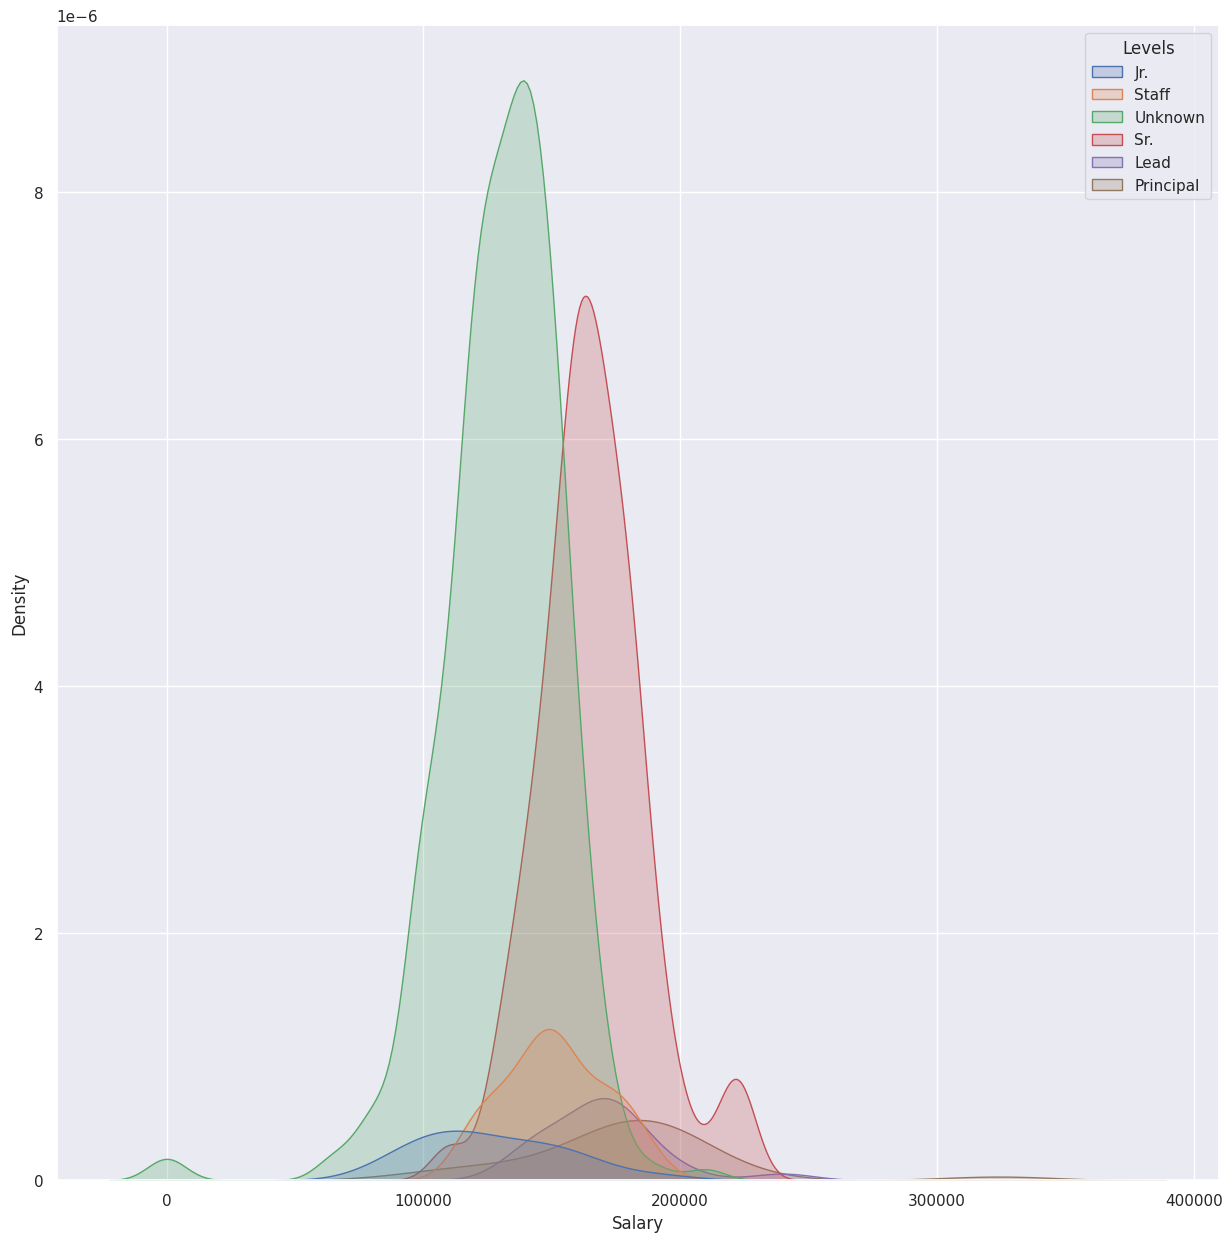

In [73]:
plt.figure(figsize=(15, 15))
sns.kdeplot(data = df_1[df_1.Title=='Data Scientist'], x='Salary', hue='Levels', shade='fill')
plt.show()

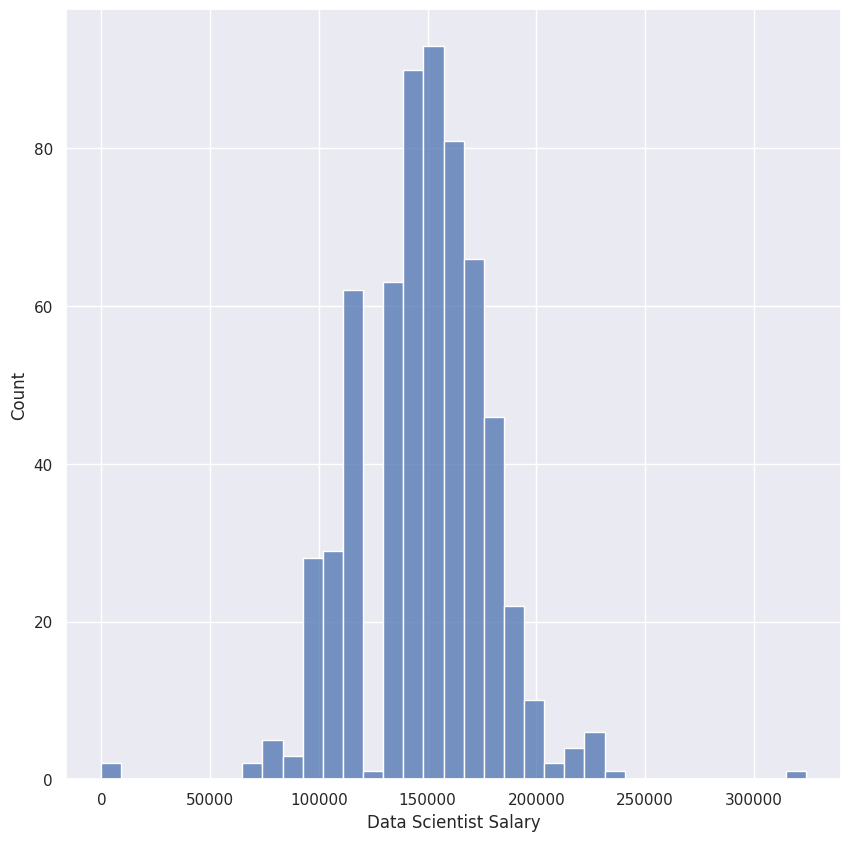

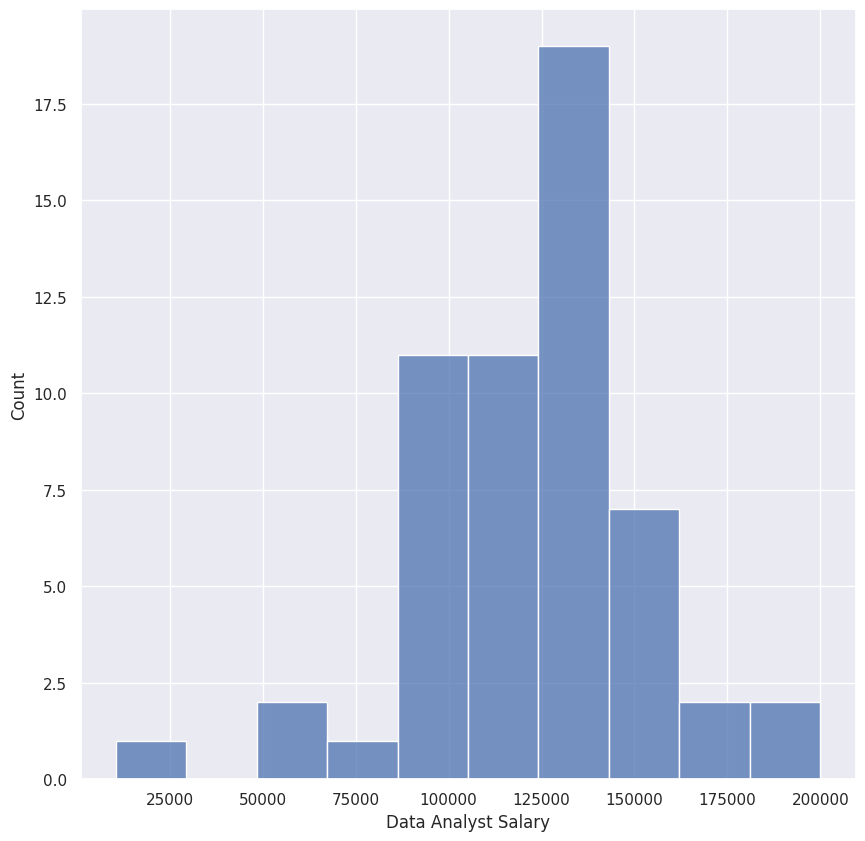

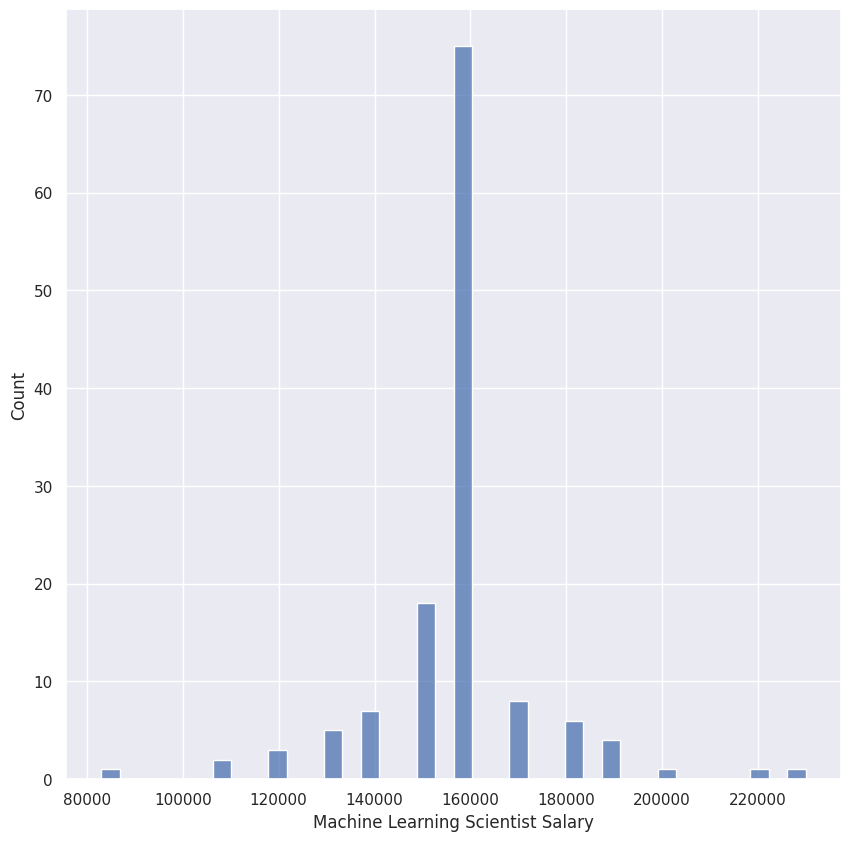

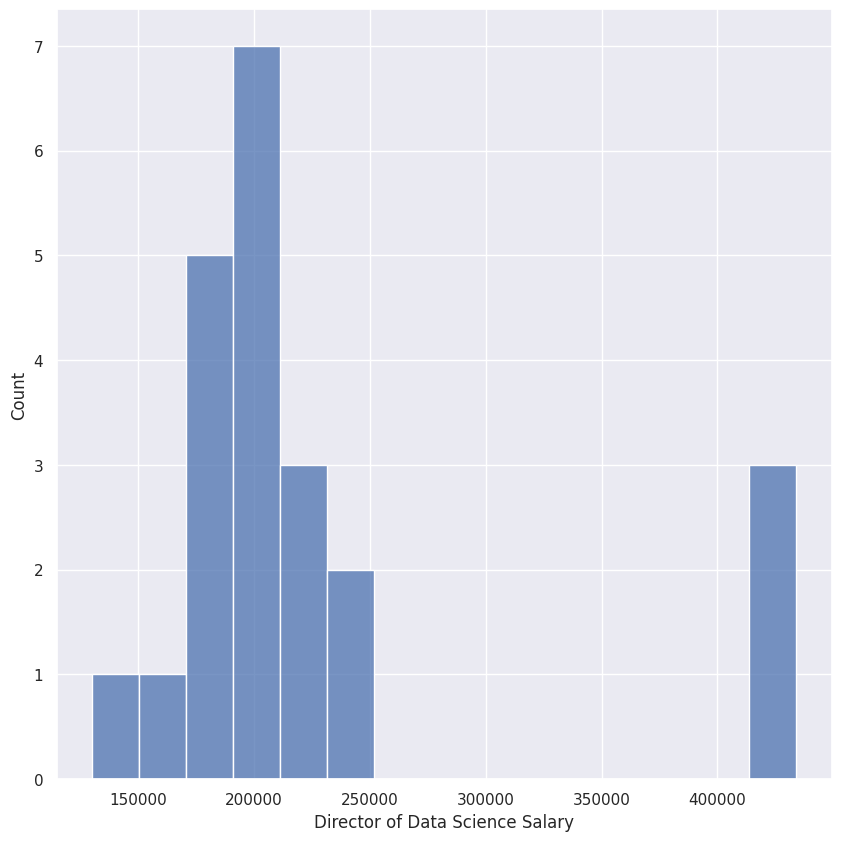

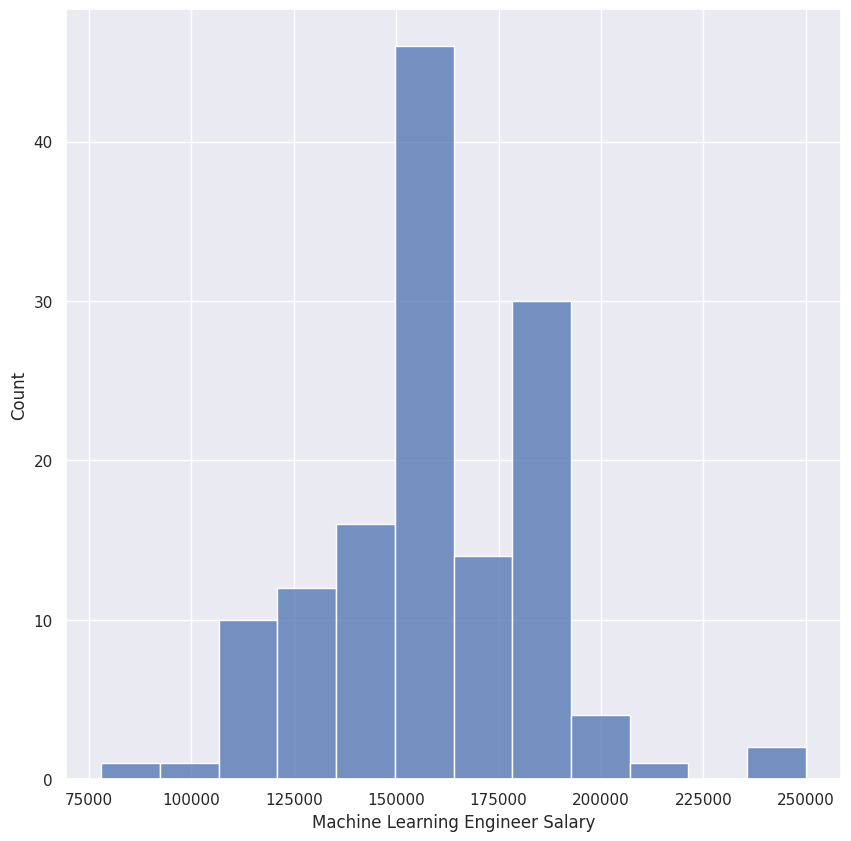

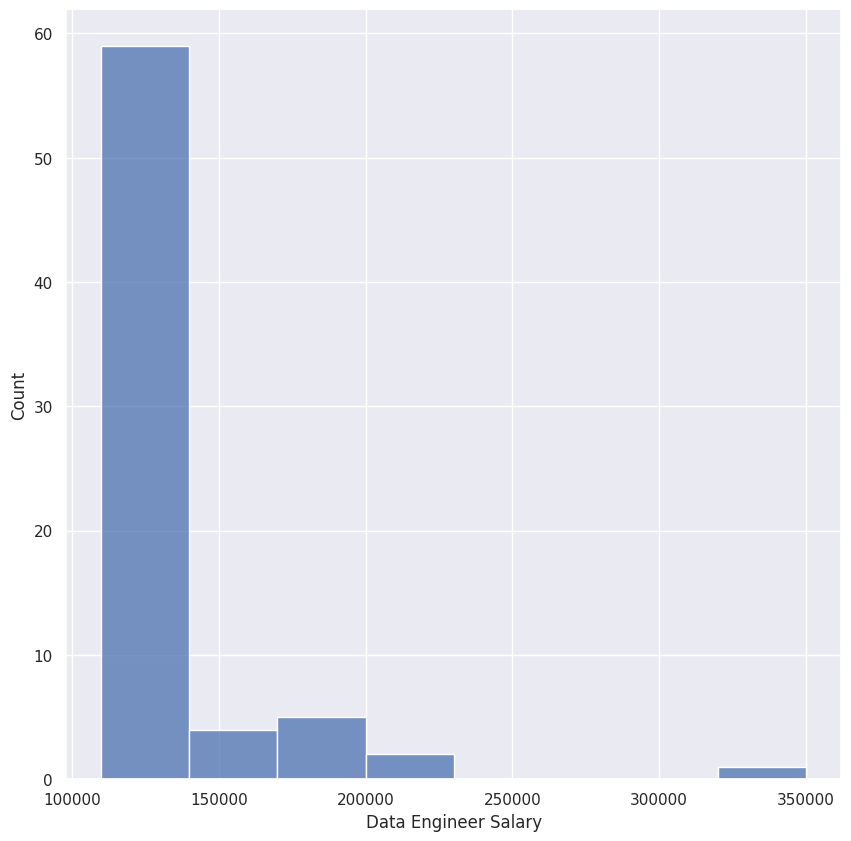

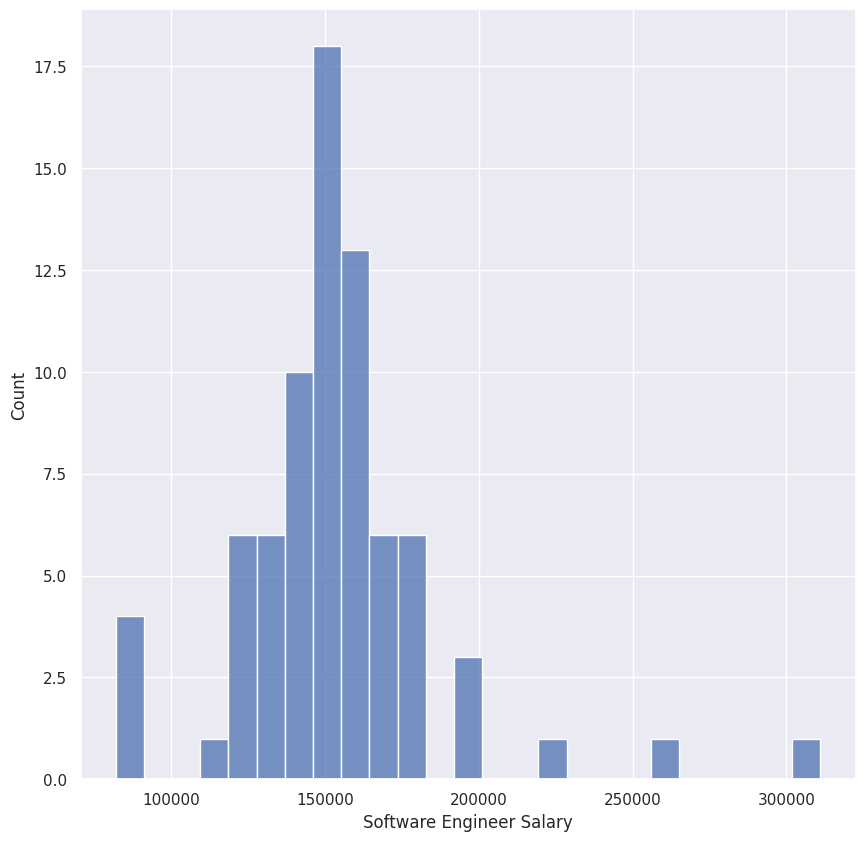

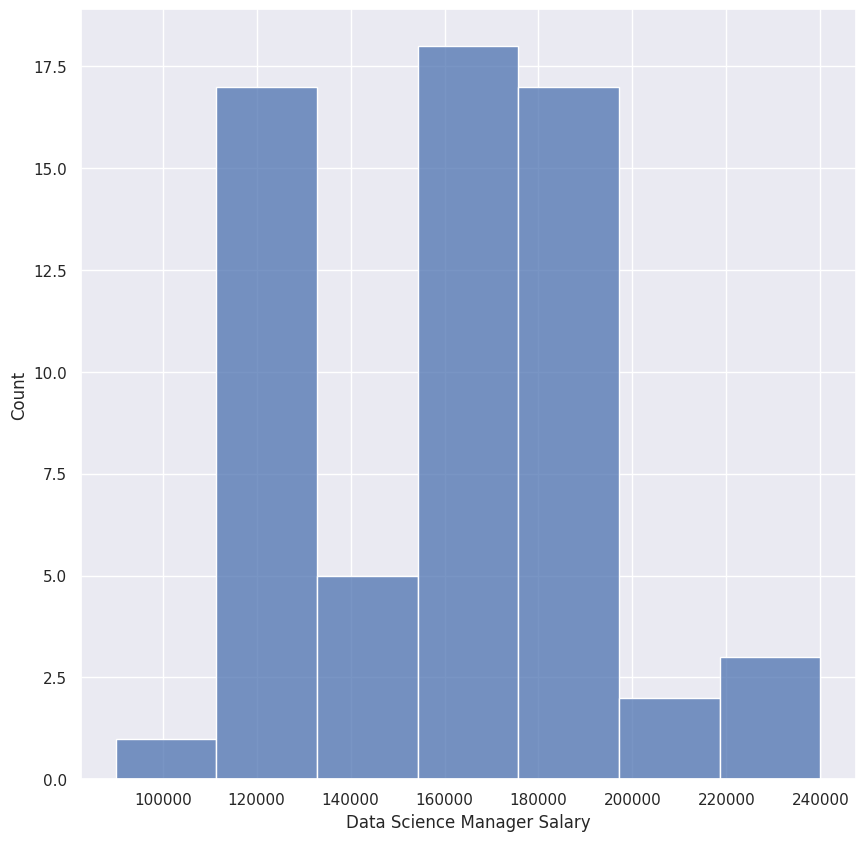

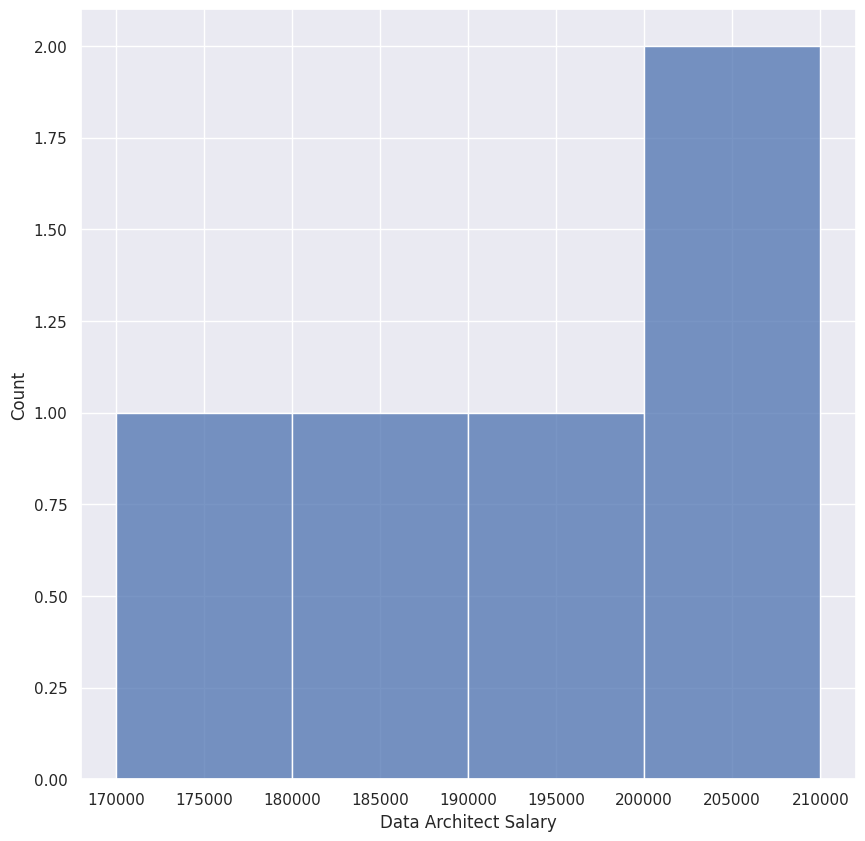

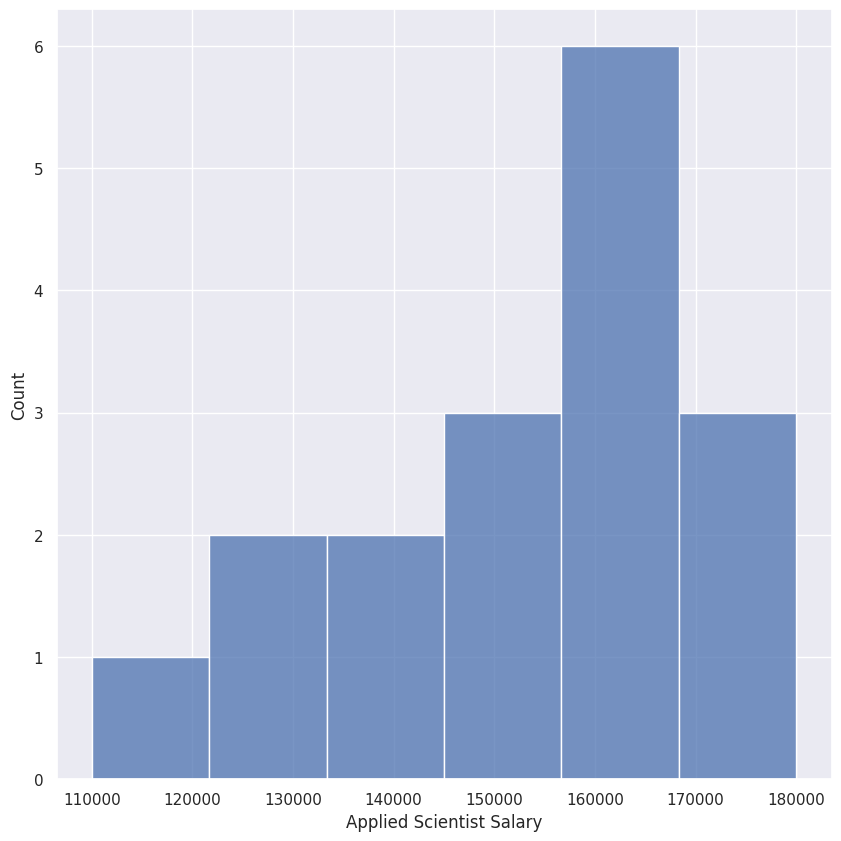

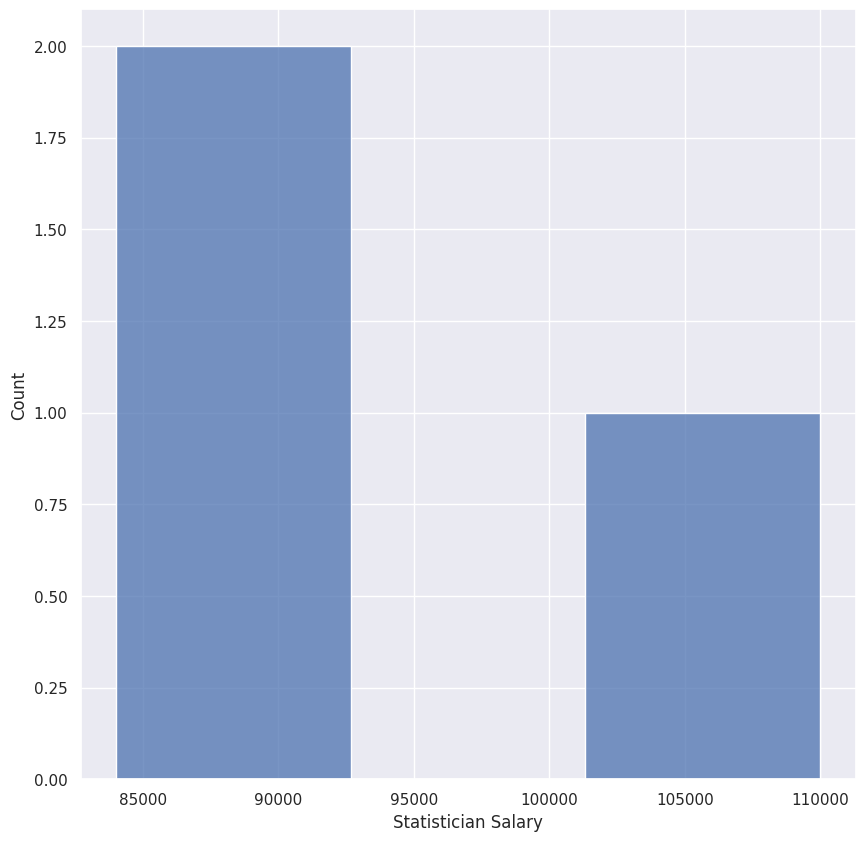

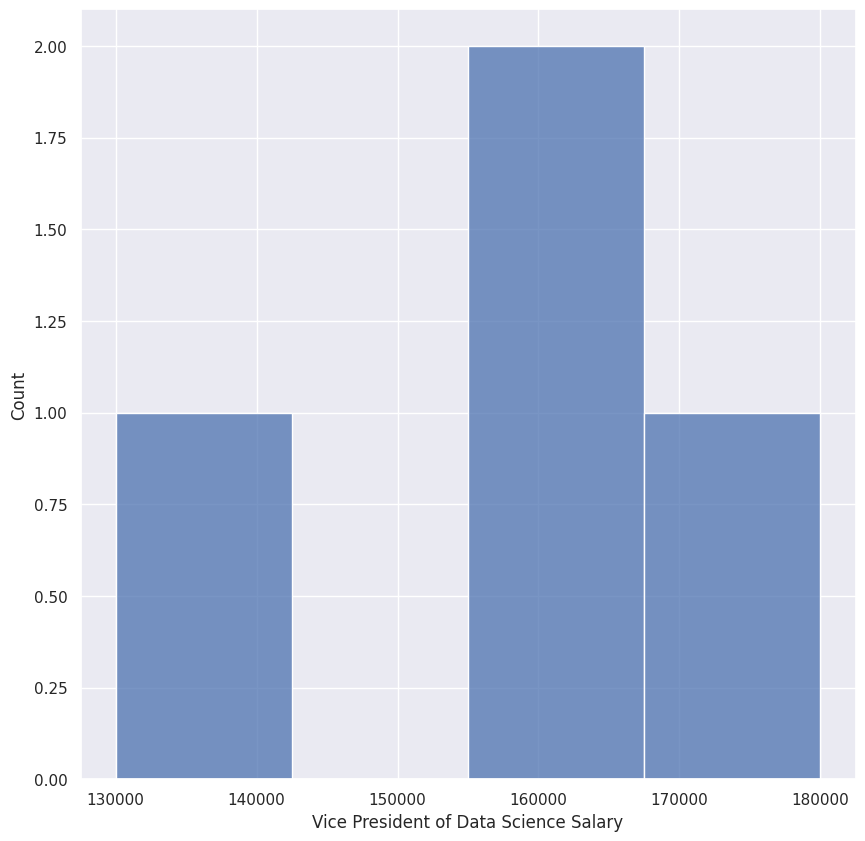

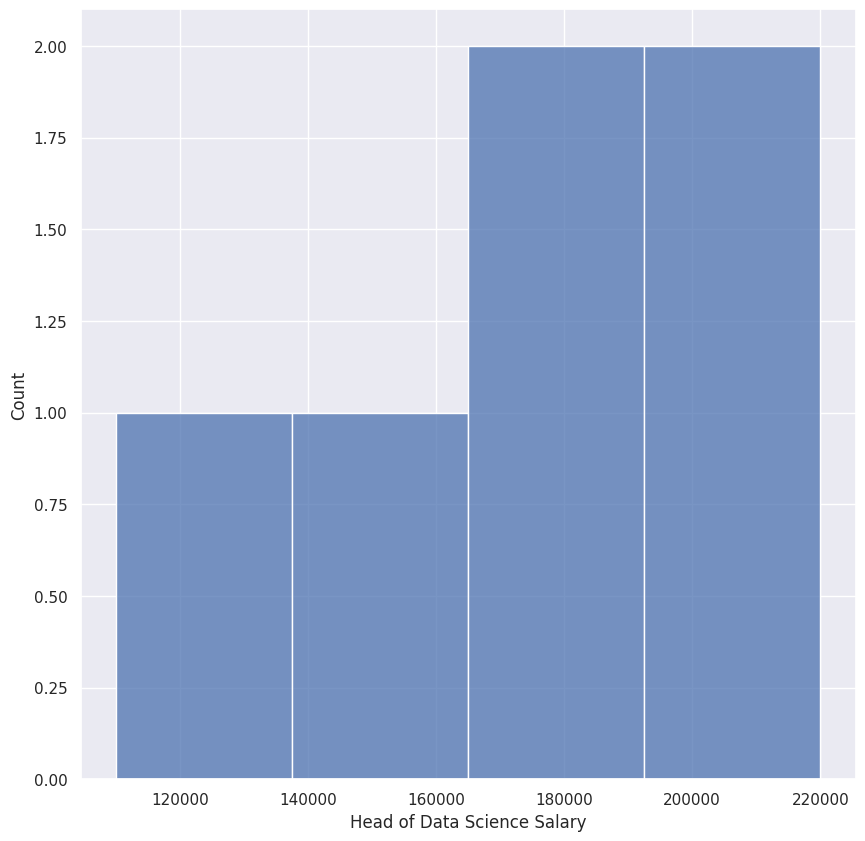

In [27]:
for i in df_1.Title.unique():
    plt.figure(figsize=(10, 10))
    sns.histplot(data = df_1[df_1.Title==i], x='Salary')
    plt.xlabel('{} Salary'.format(i))
    plt.show()

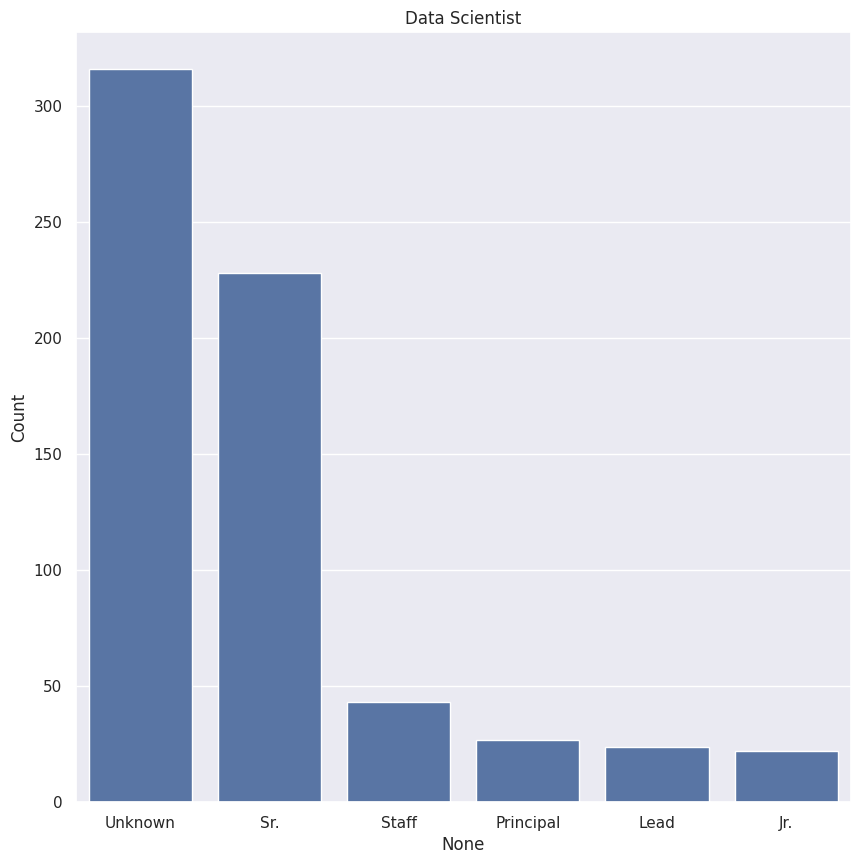

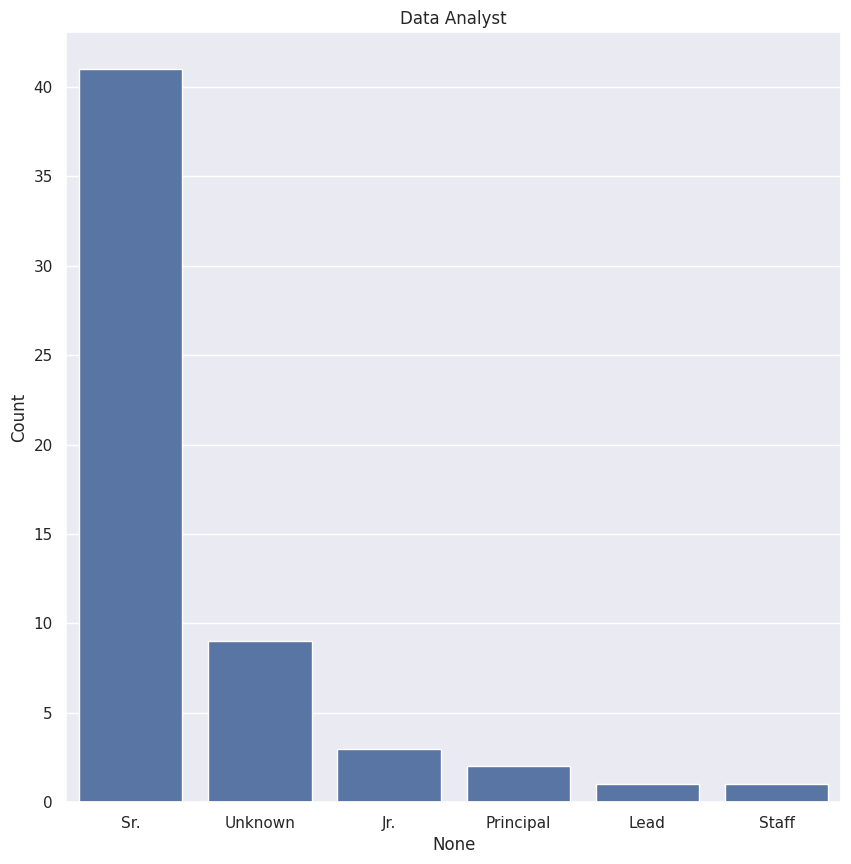

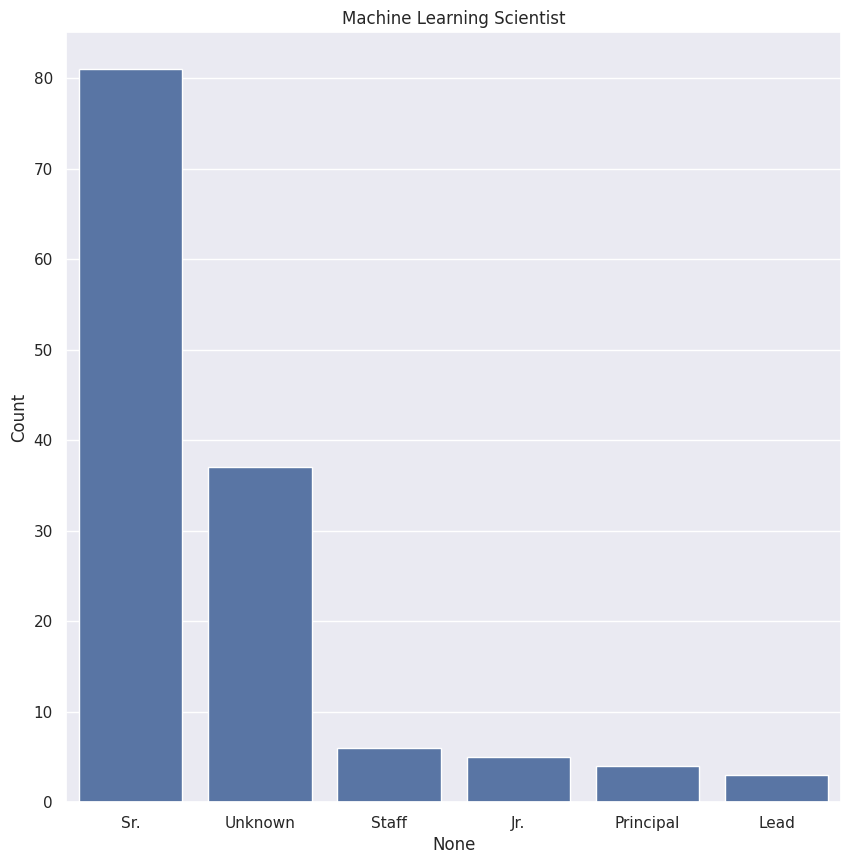

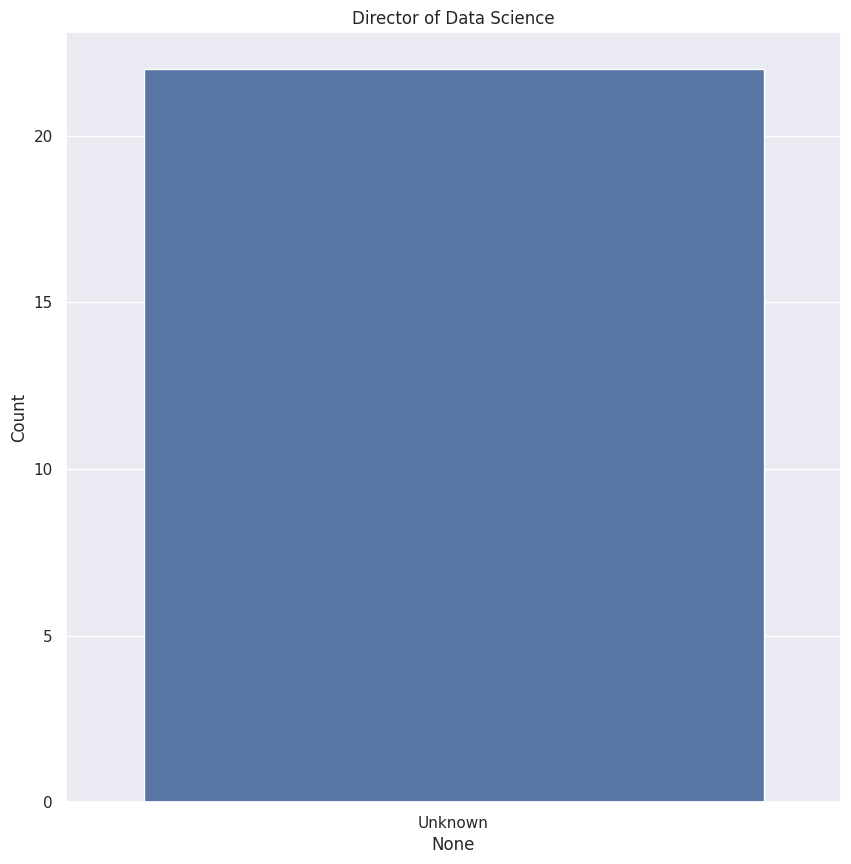

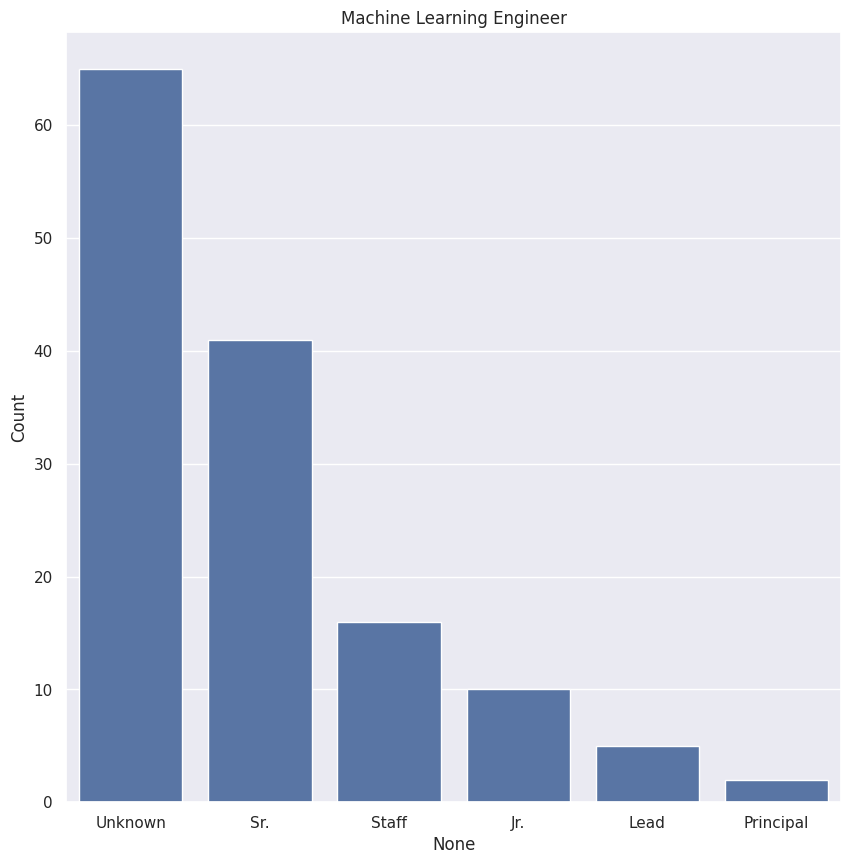

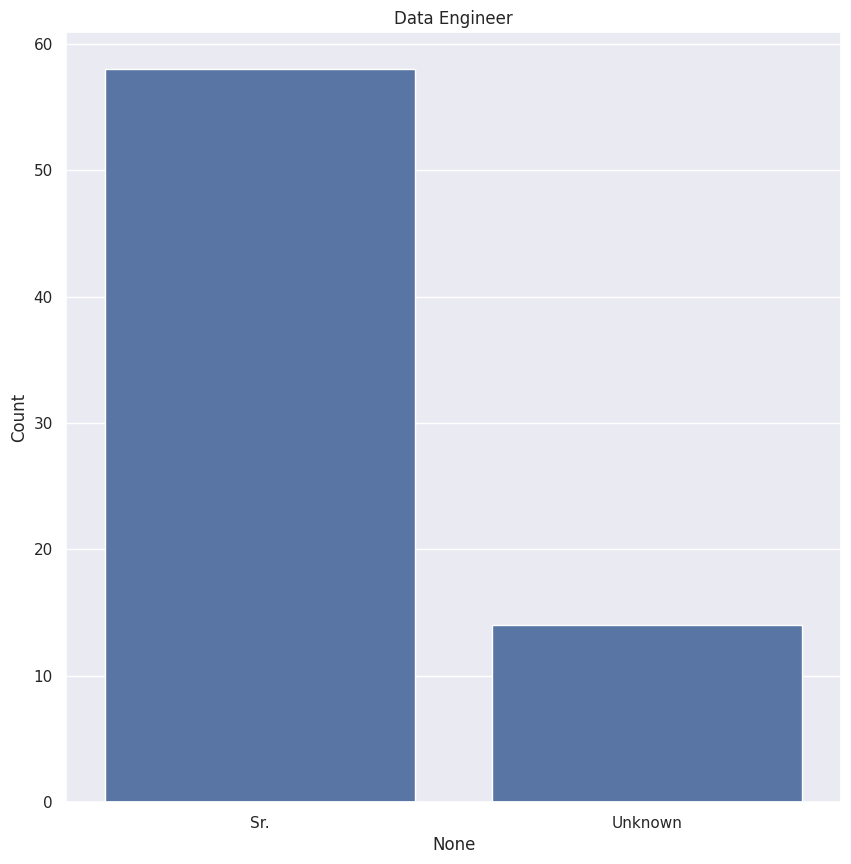

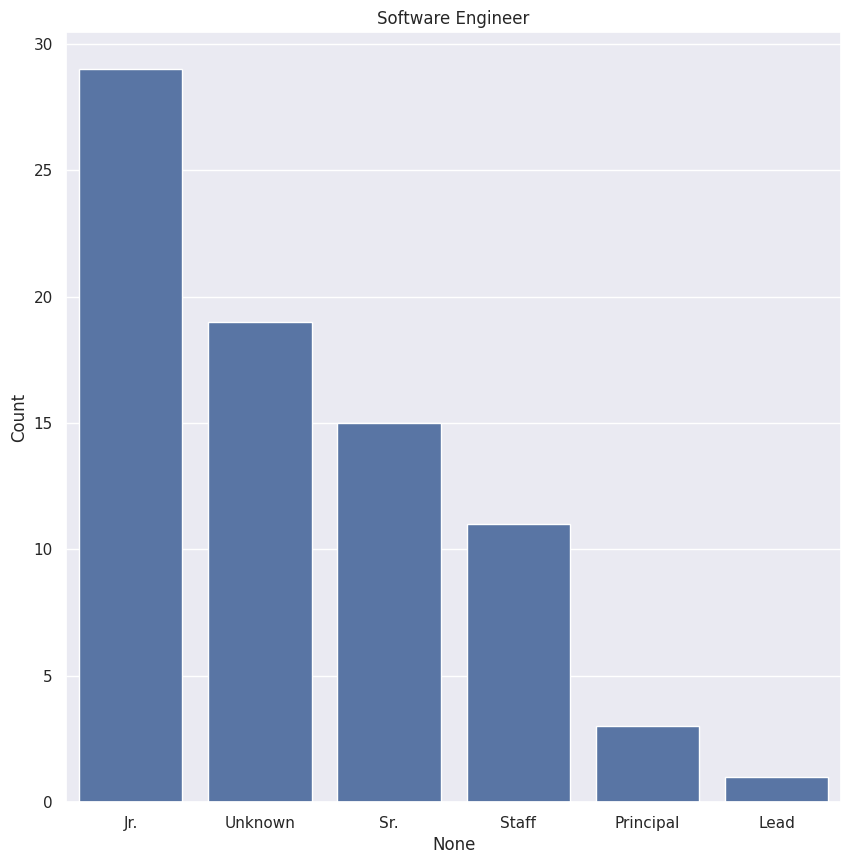

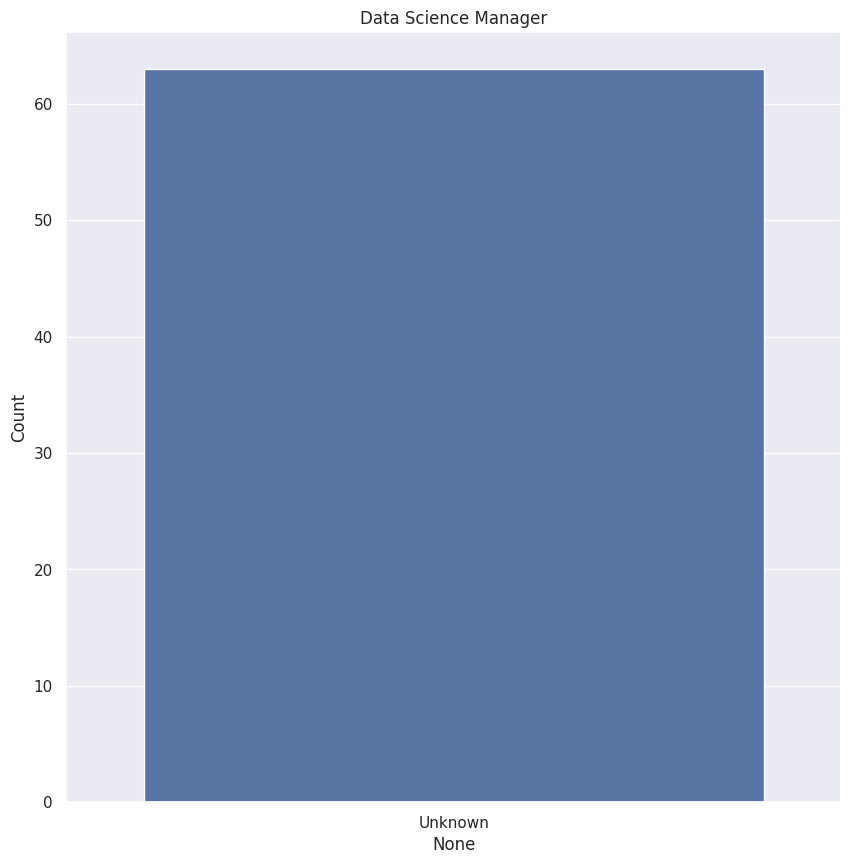

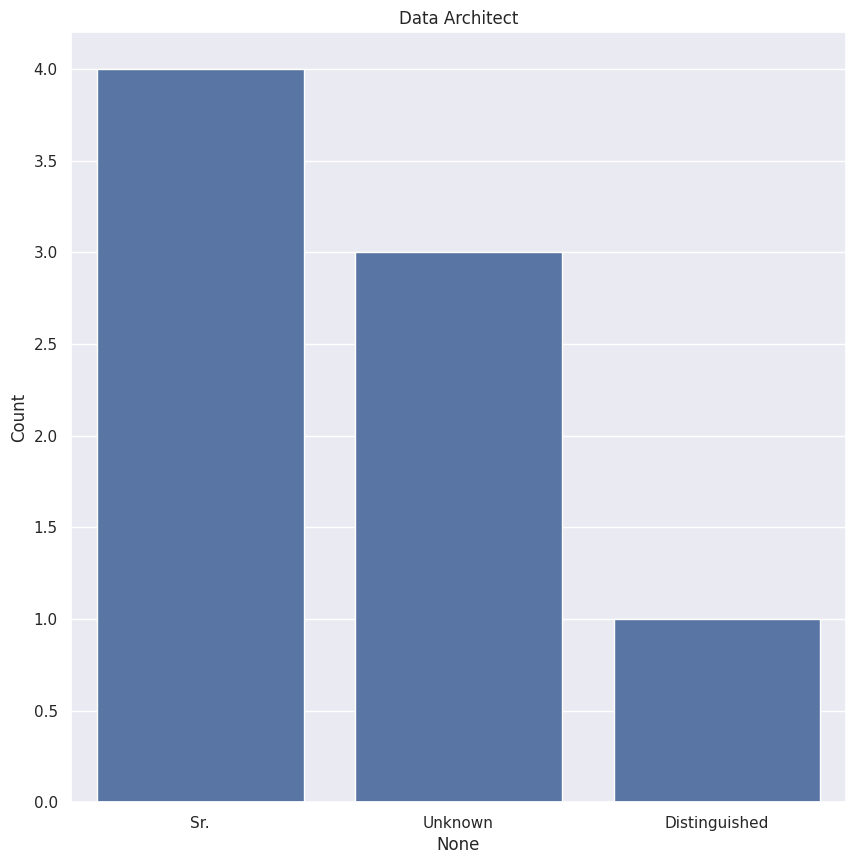

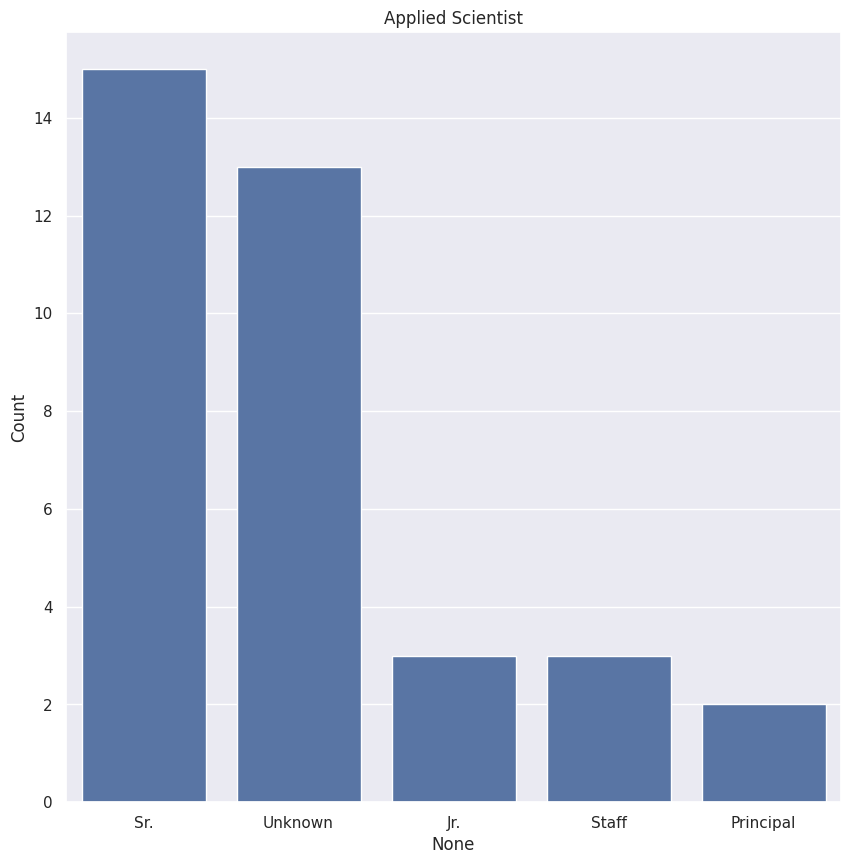

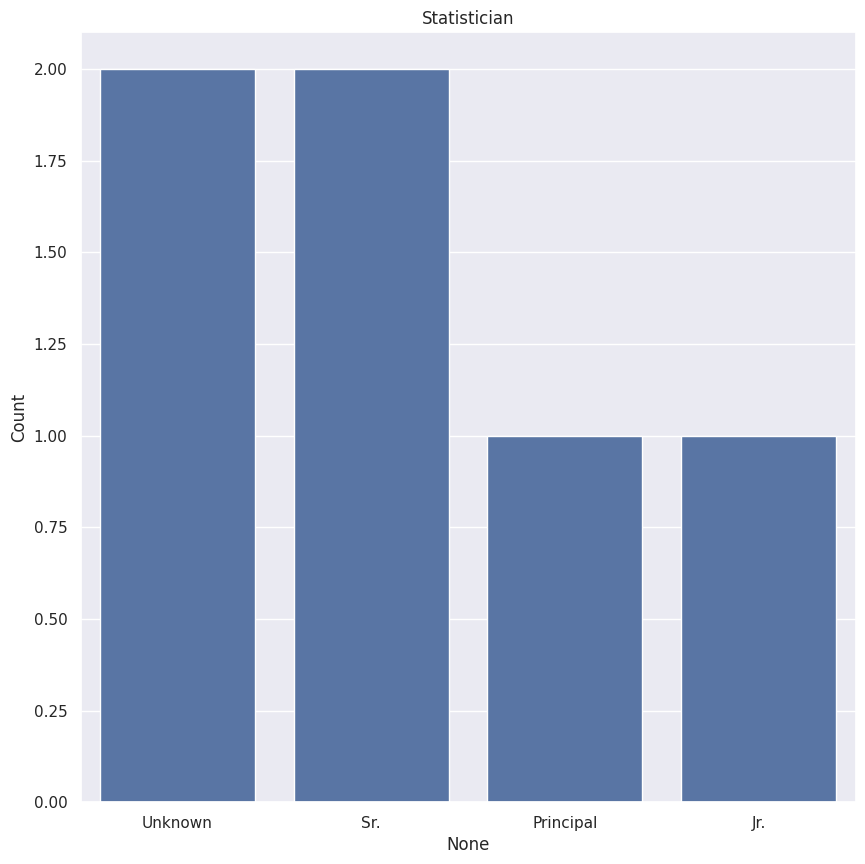

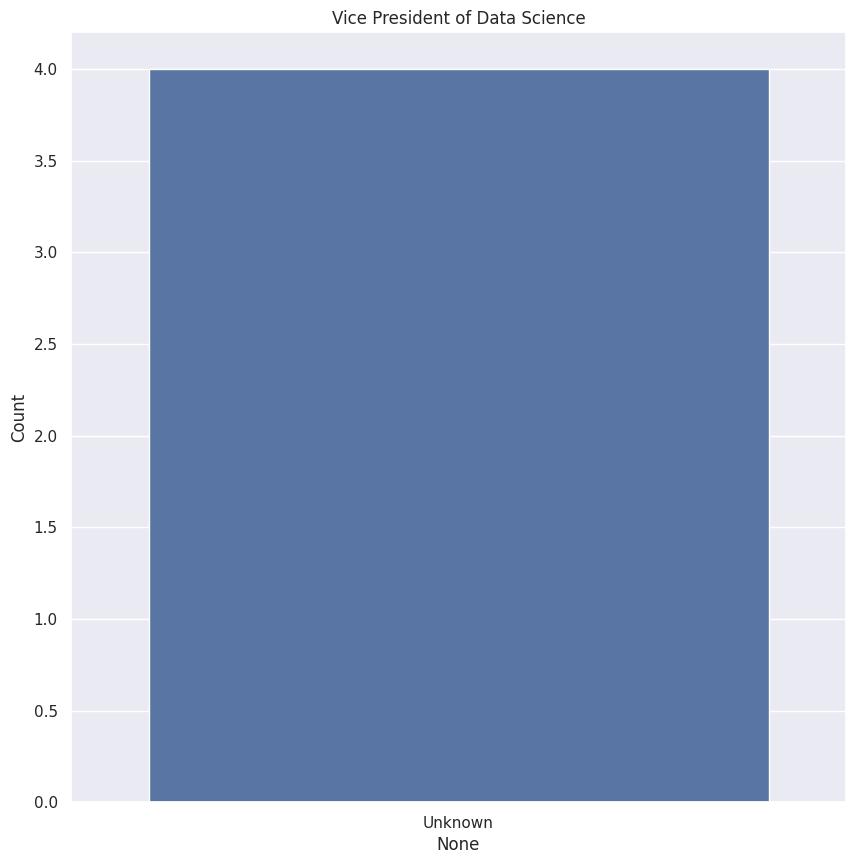

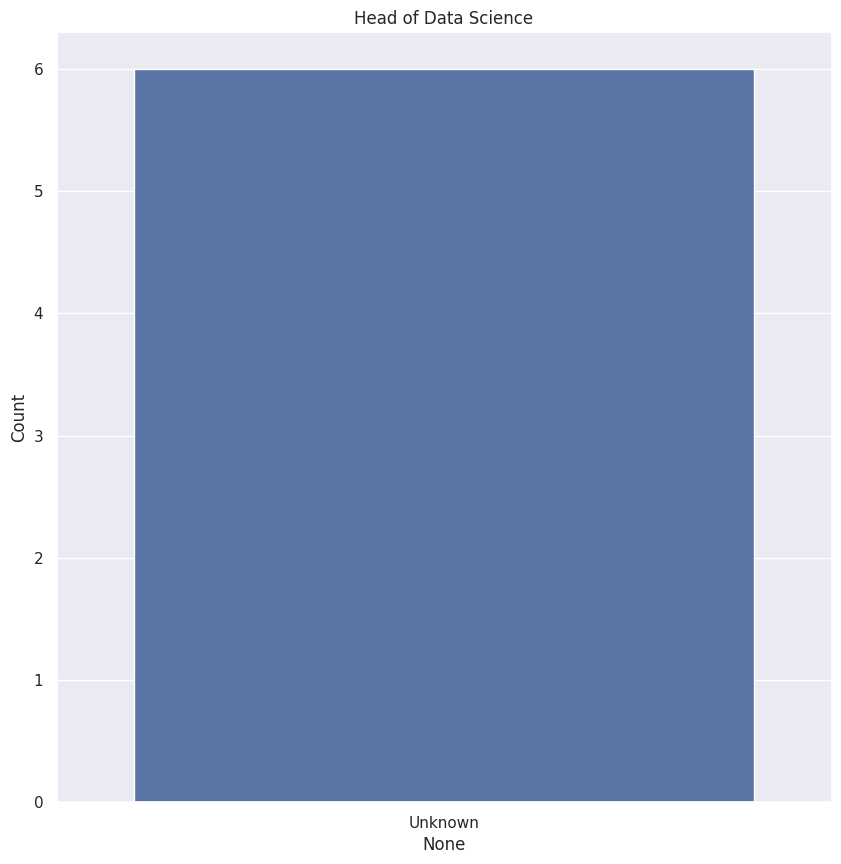

In [28]:
for i in df_1.Title.unique():
    plt.figure(figsize=(10, 10))
    plt.title('{}'.format(i))
    sns.barplot(x = df_1[df_1.Title==i]['Levels'].value_counts().index, y = df_1[df_1.Title==i]['Levels'].value_counts().values)
    plt.ylabel('Count')
    plt.show()

In [74]:
sorted_index_descent = df_1.groupby(['Title']).median().sort_values(by= 'Salary',ascending=False).index

/tmp/ipykernel_668534/3289407335.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_index_descent = df_1.groupby(['Title']).median().sort_values(by= 'Salary',ascending=False).index


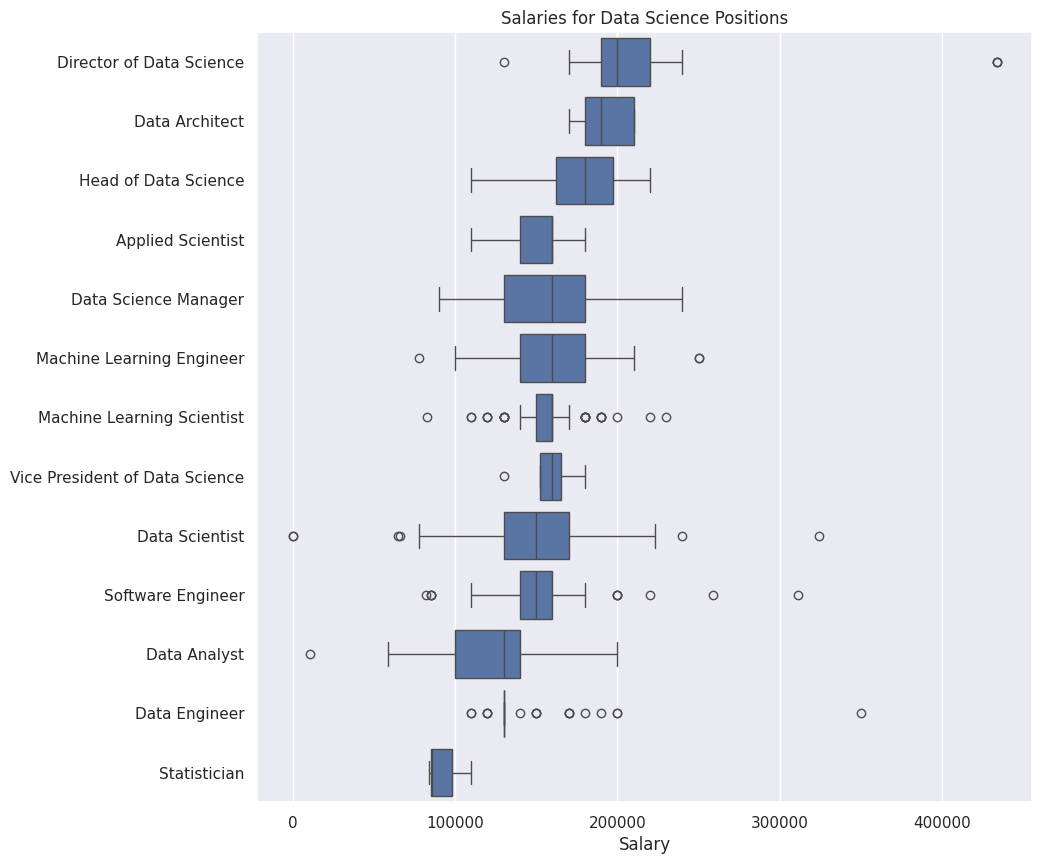

In [75]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df_1['Title'], x=df_1['Salary'],order=sorted_index_descent)
plt.ylabel('')
plt.title('Salaries for Data Science Positions')
plt.show()

In [105]:
sorted_index_descent = df_1.groupby(['Levels']).median().sort_values(by= 'Salary',ascending=False).index
sorted_index_descent

/tmp/ipykernel_668534/4211366915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_index_descent = df_1.groupby(['Levels']).median().sort_values(by= 'Salary',ascending=False).index


Index(['Distinguished', 'Lead', 'Principal', 'Sr.', 'Jr.', 'Staff', 'Unknown'], dtype='object', name='Levels')

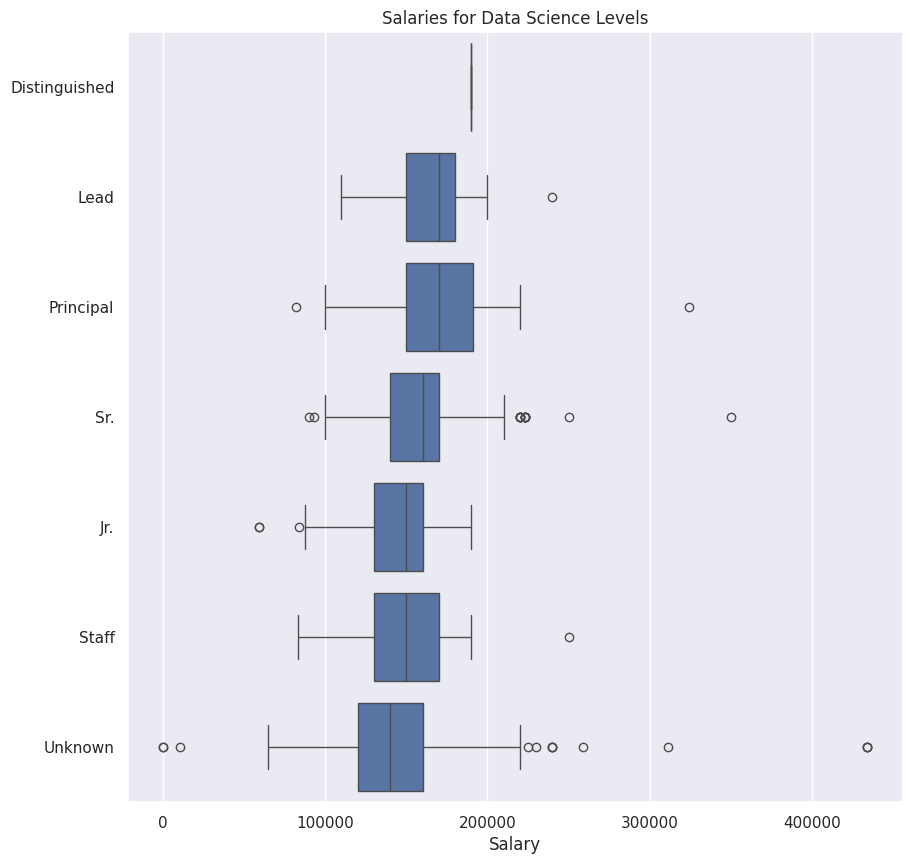

In [77]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df_1['Levels'], x=df_1['Salary'],order=sorted_index_descent)
plt.ylabel('')
plt.title('Salaries for Data Science Levels')
plt.show()

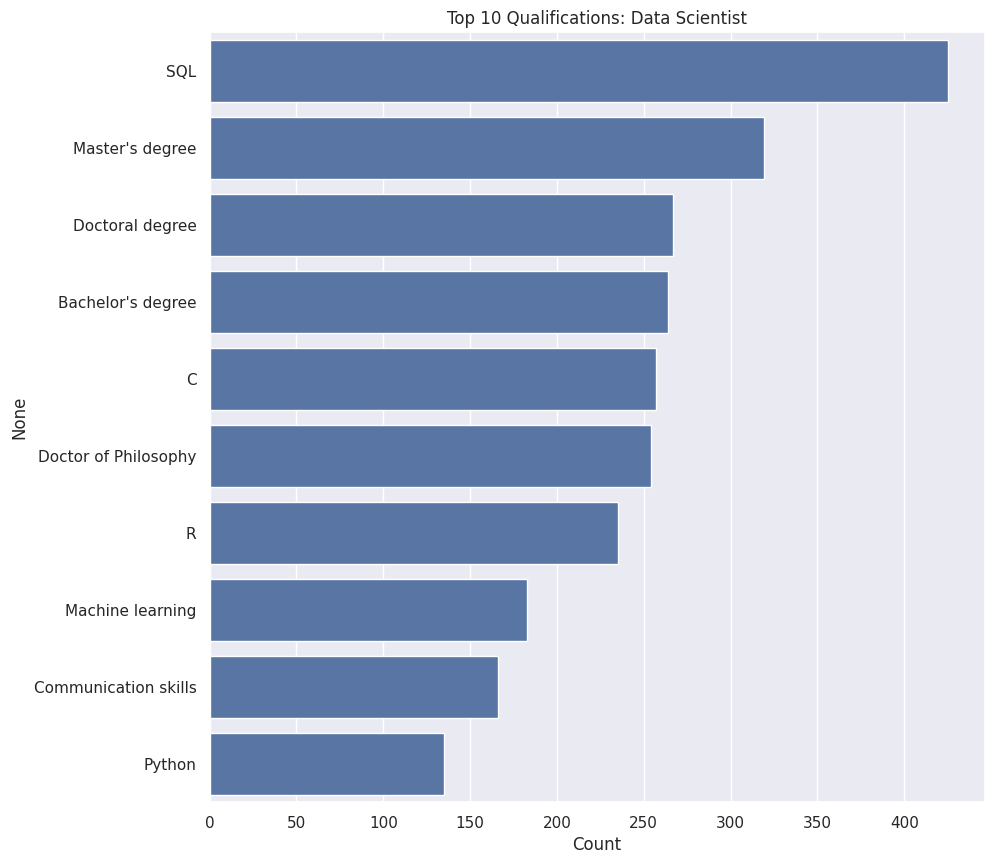

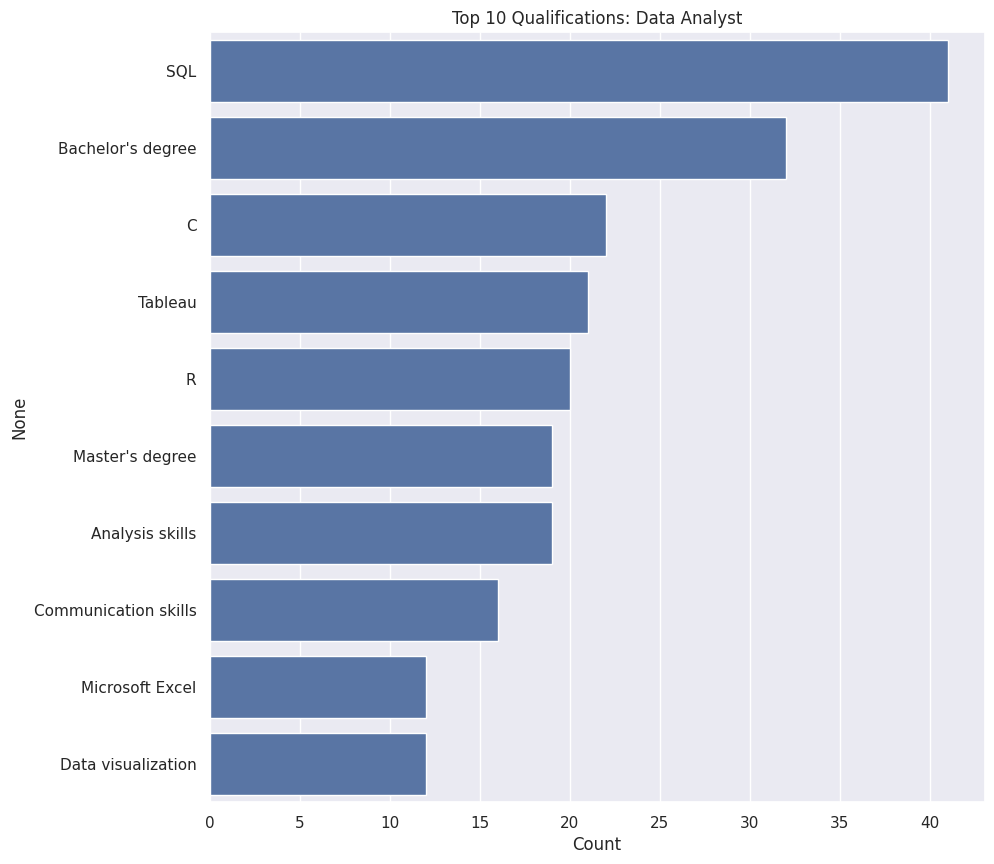

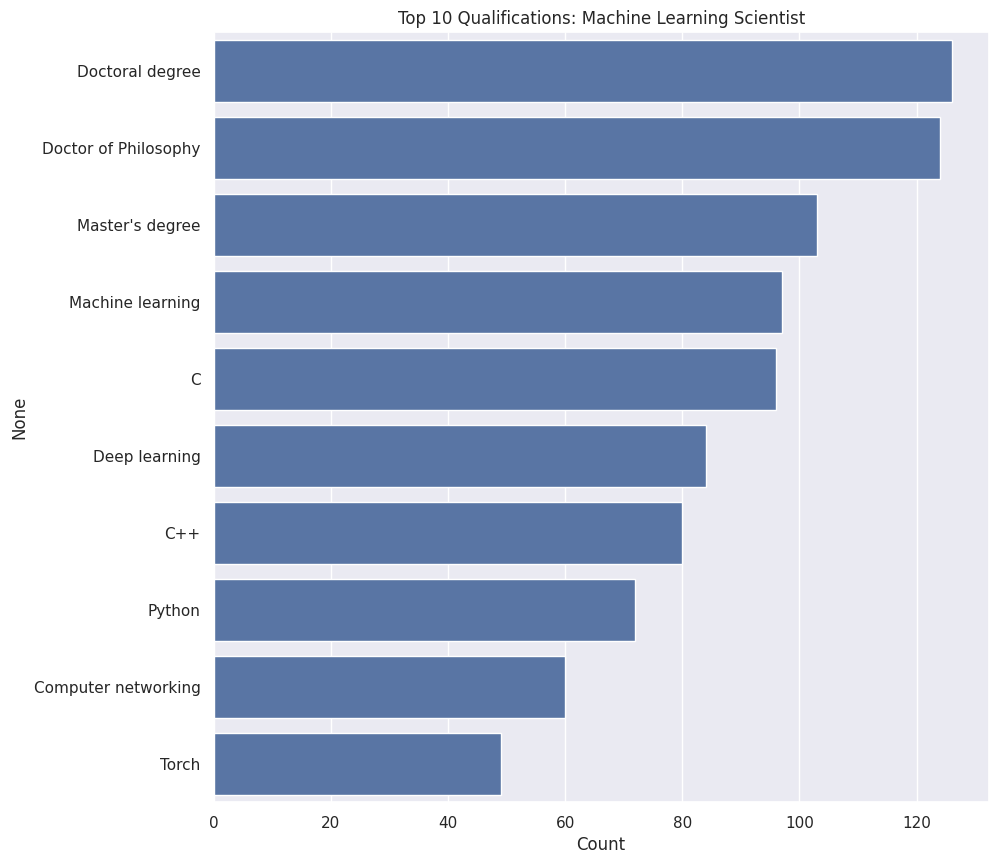

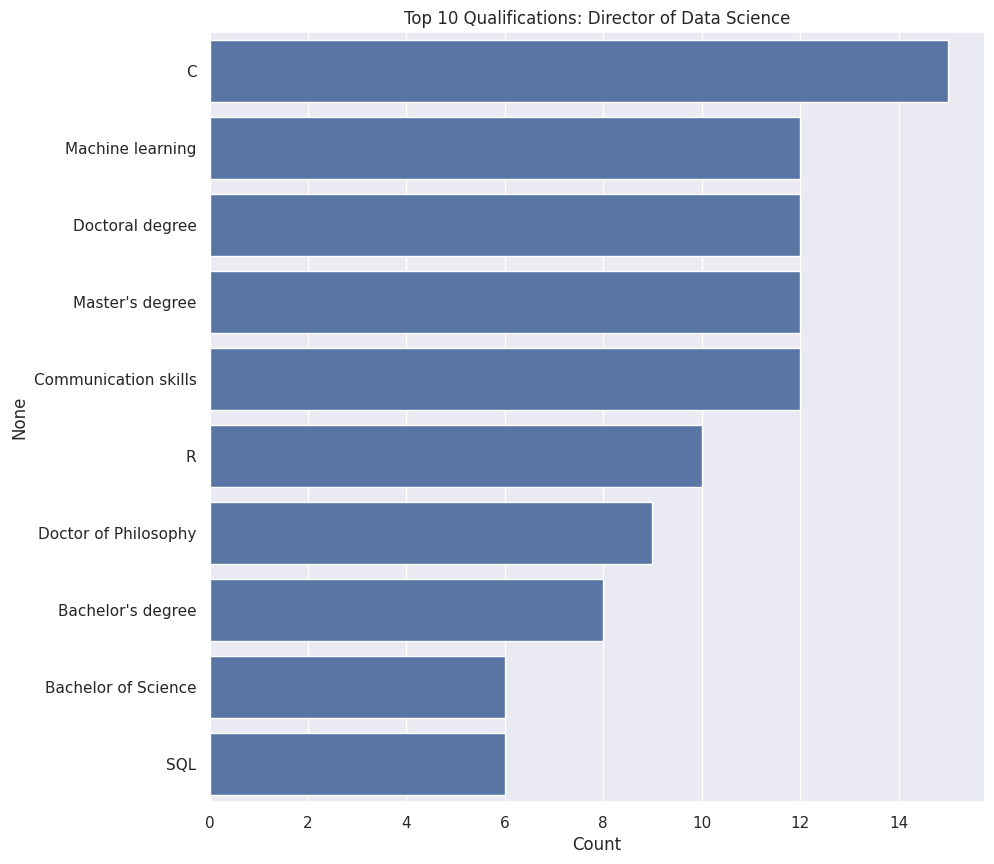

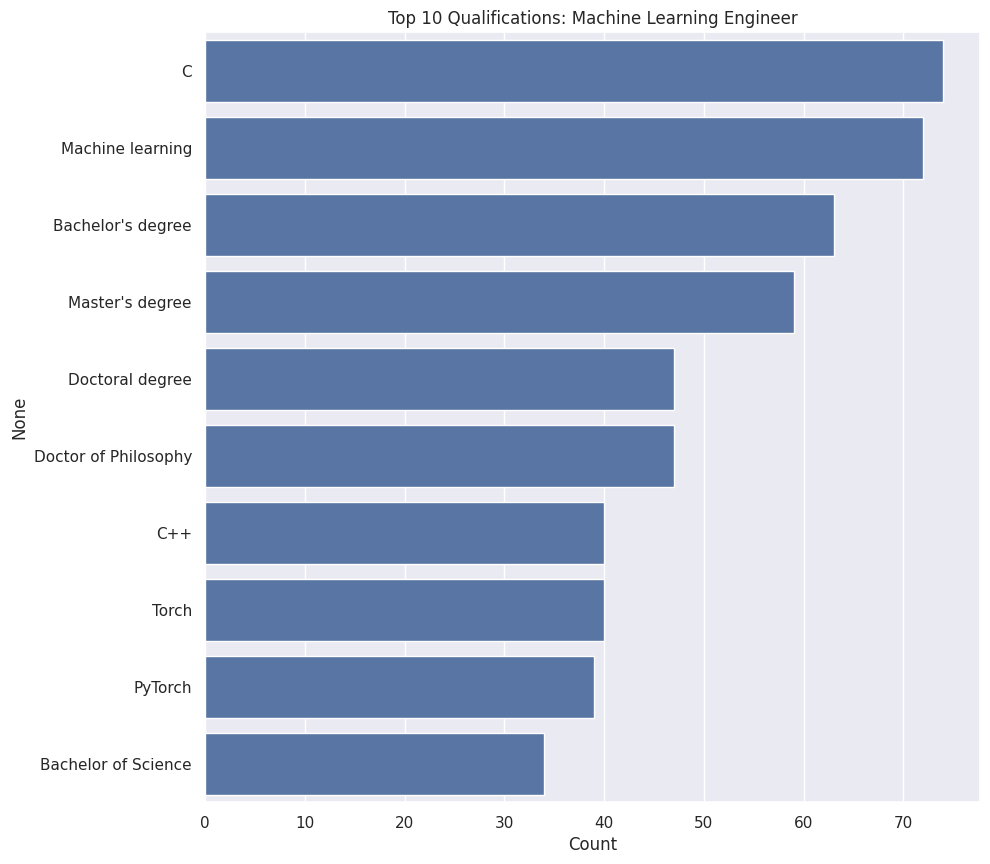

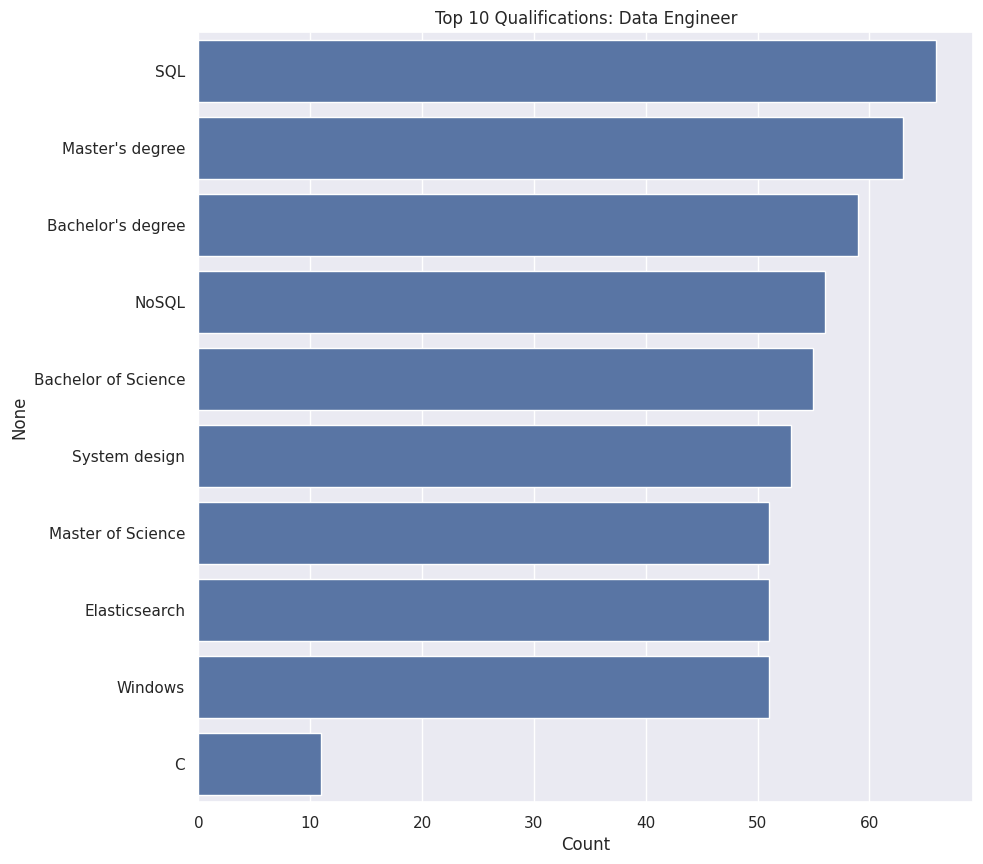

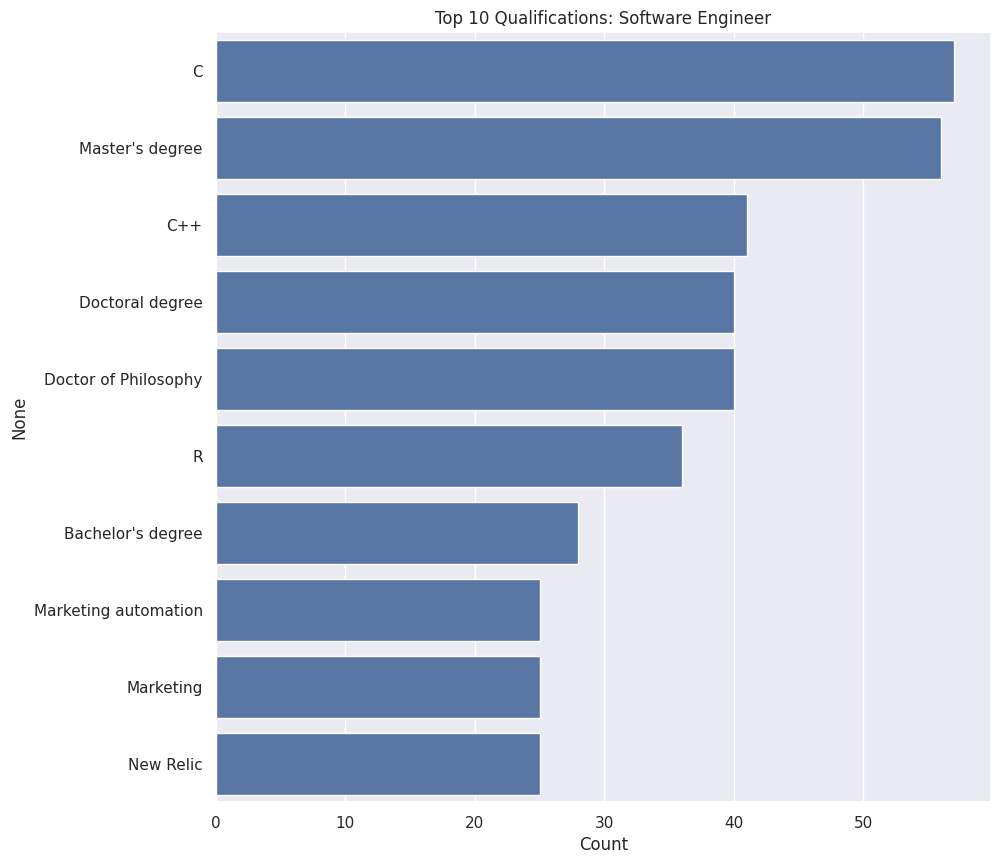

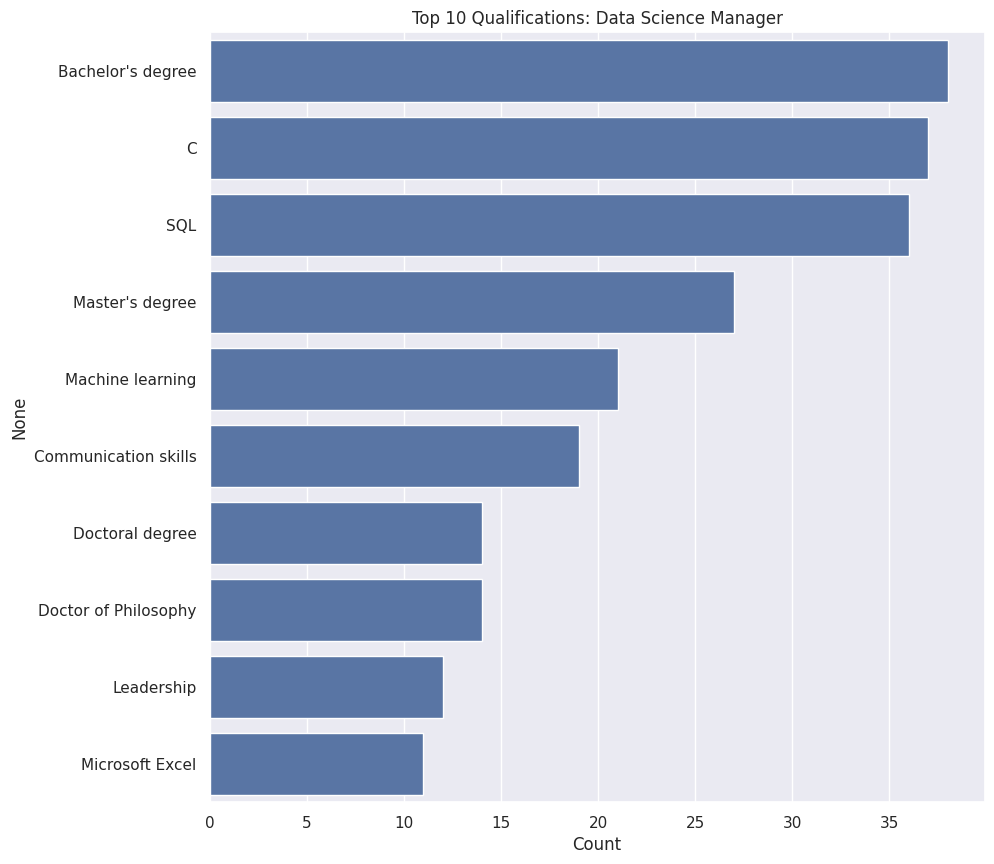

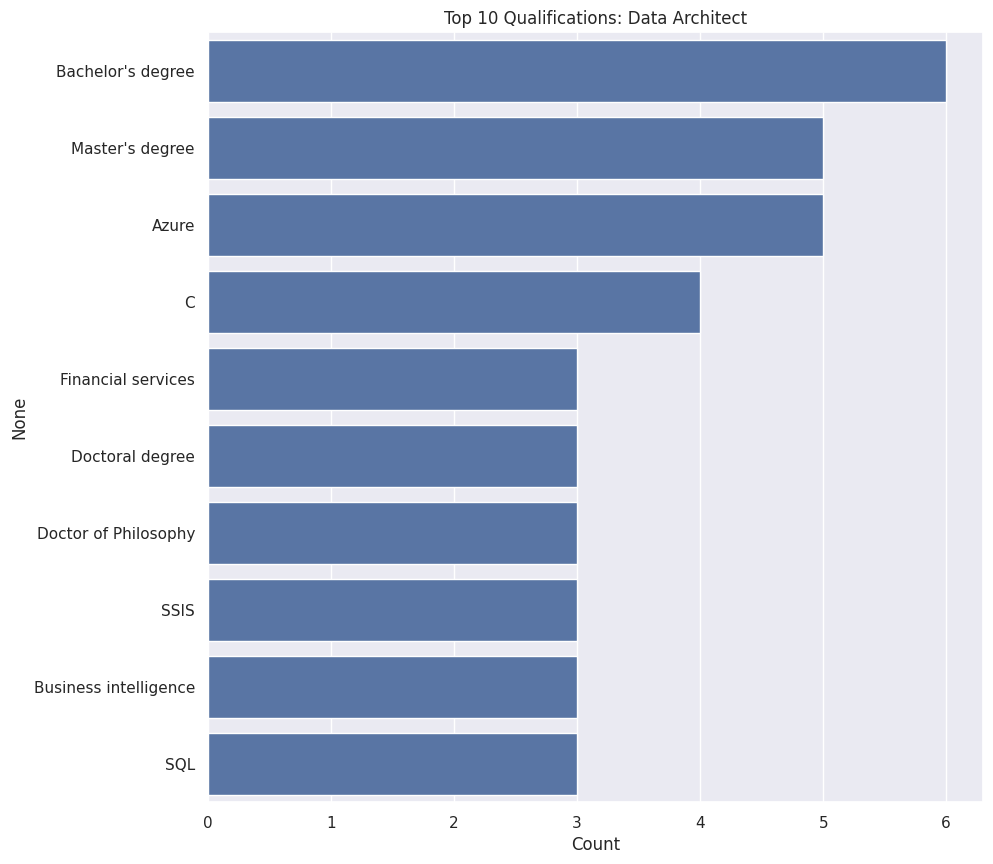

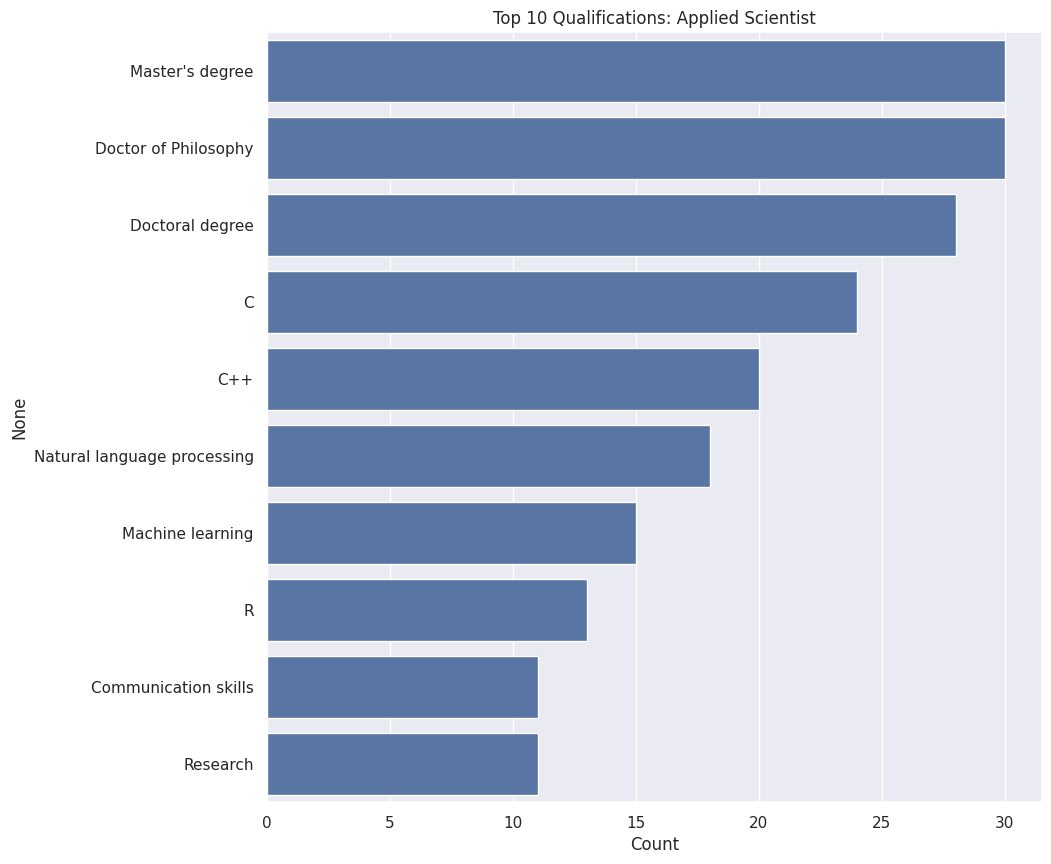

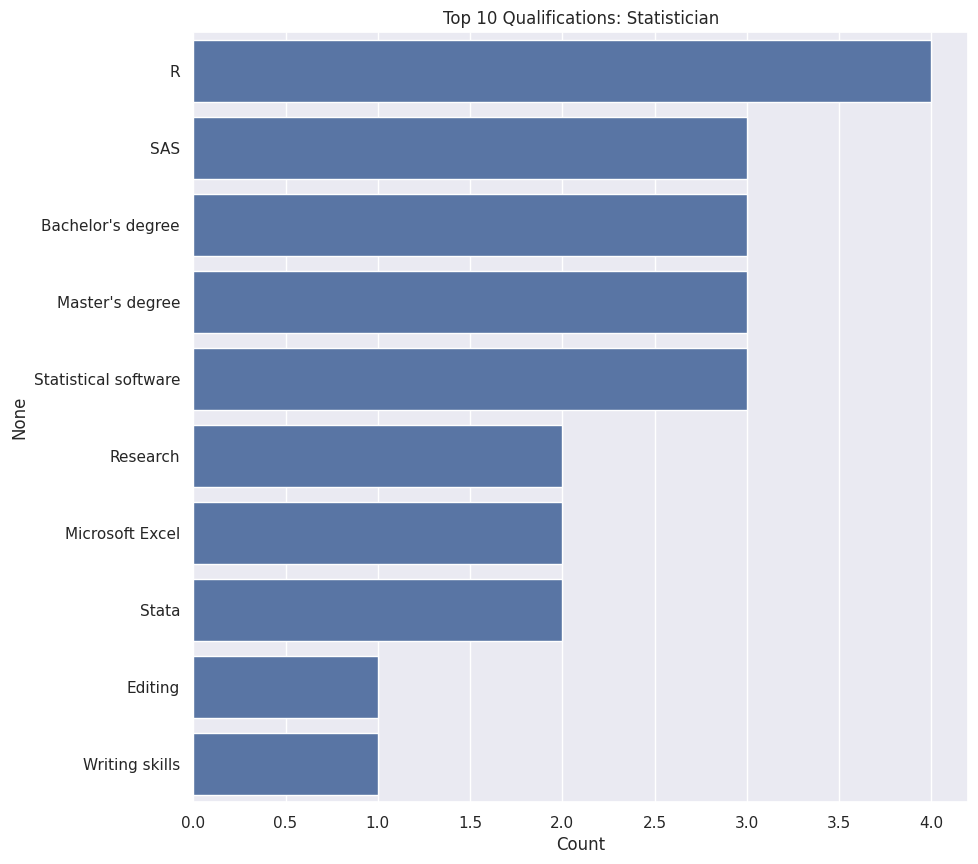

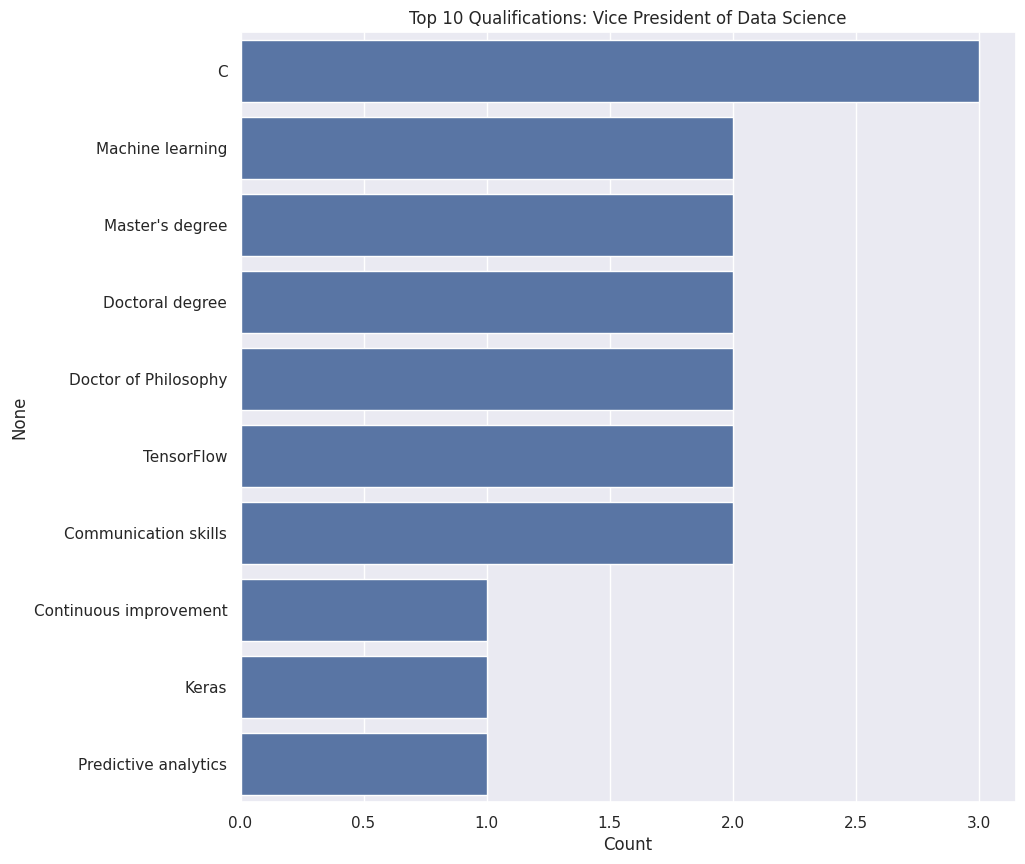

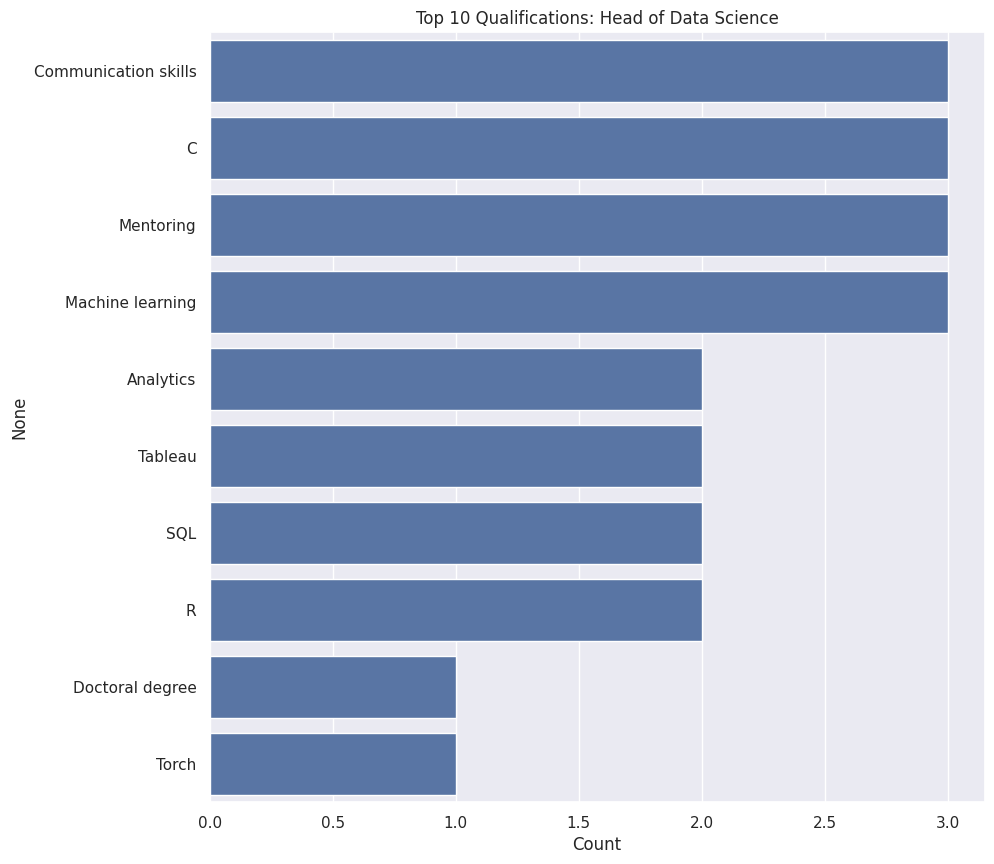

In [36]:
for i in df_1.Title.unique():
    qual_index = df_2.loc[df_1[df_1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).index
    qual_counts = df_2.loc[df_1[df_1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=qual_index[0:10], x=qual_counts[0:10])
    plt.title('Top 10 Qualifications: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

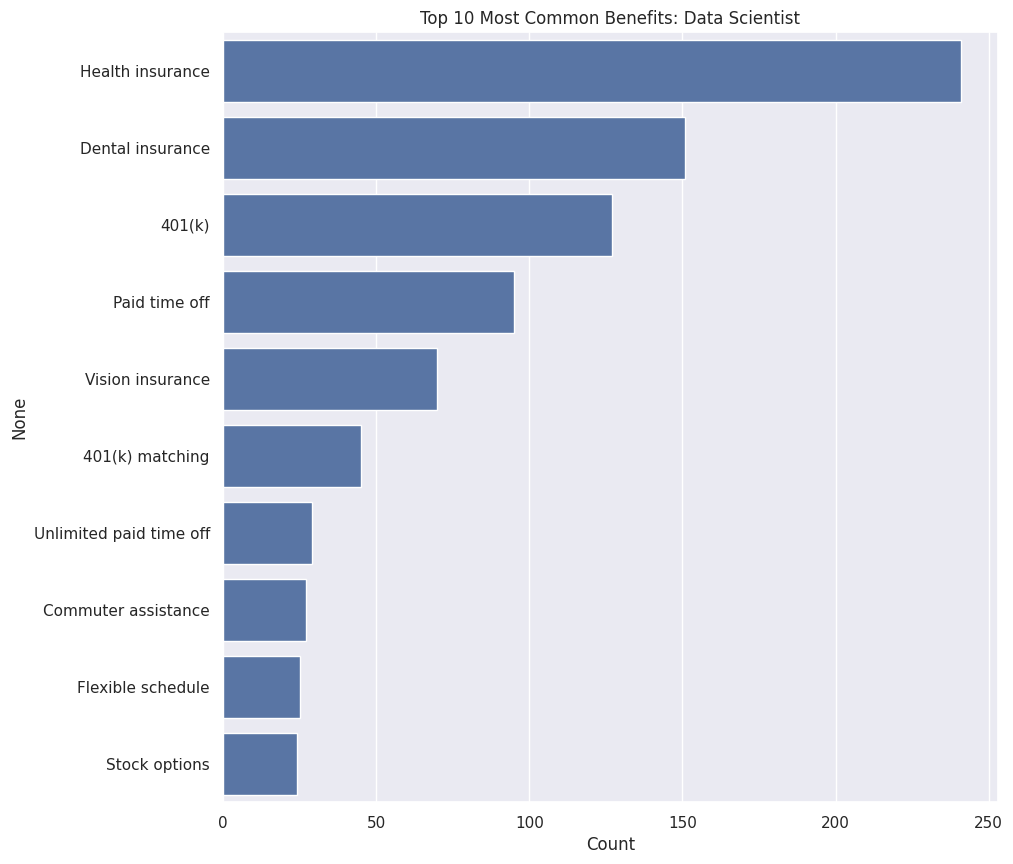

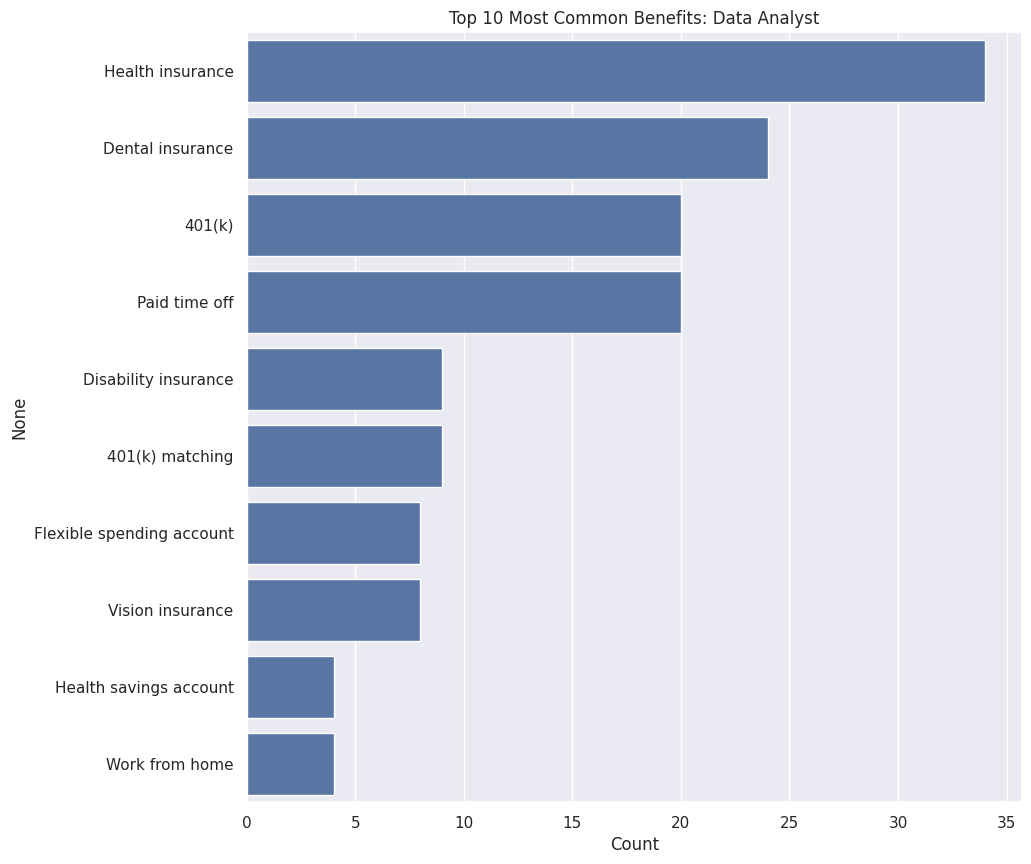

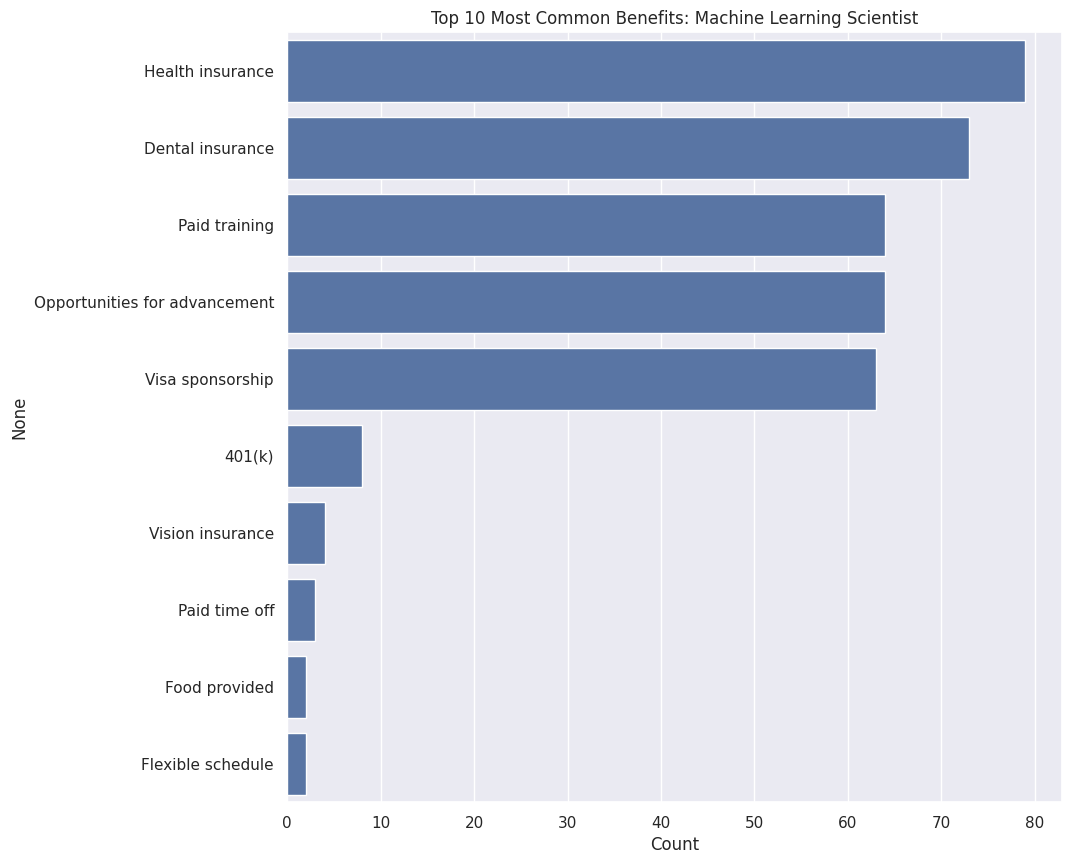

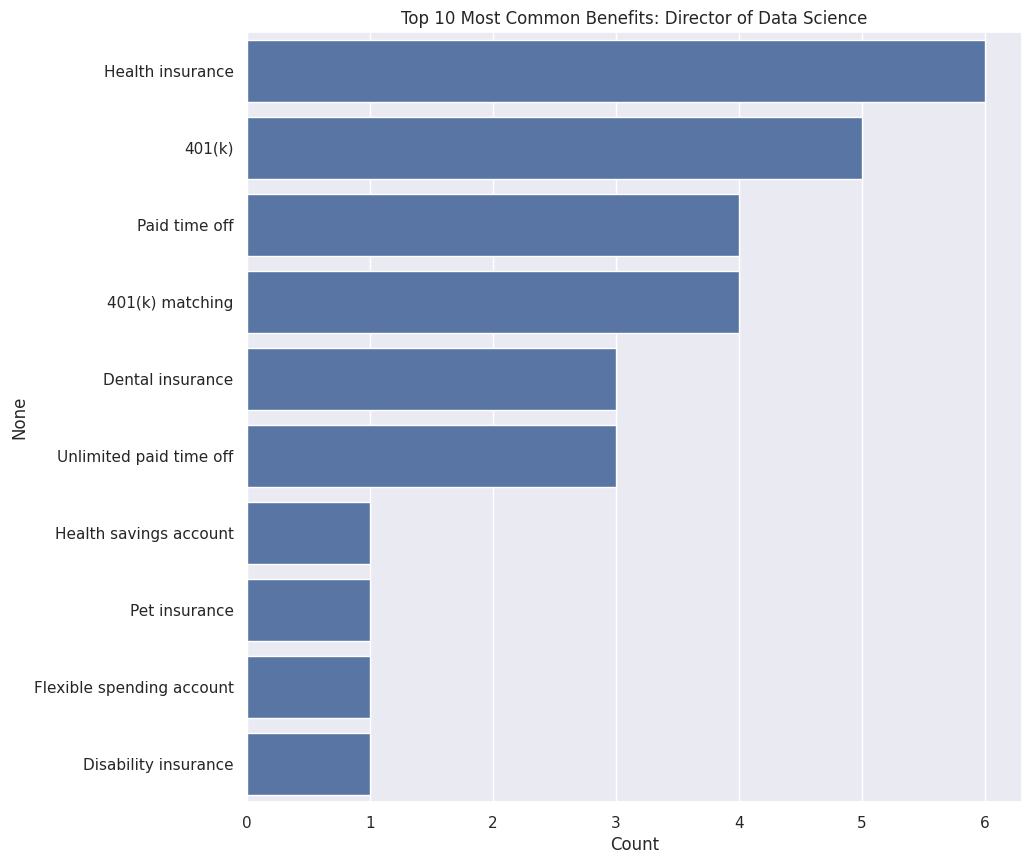

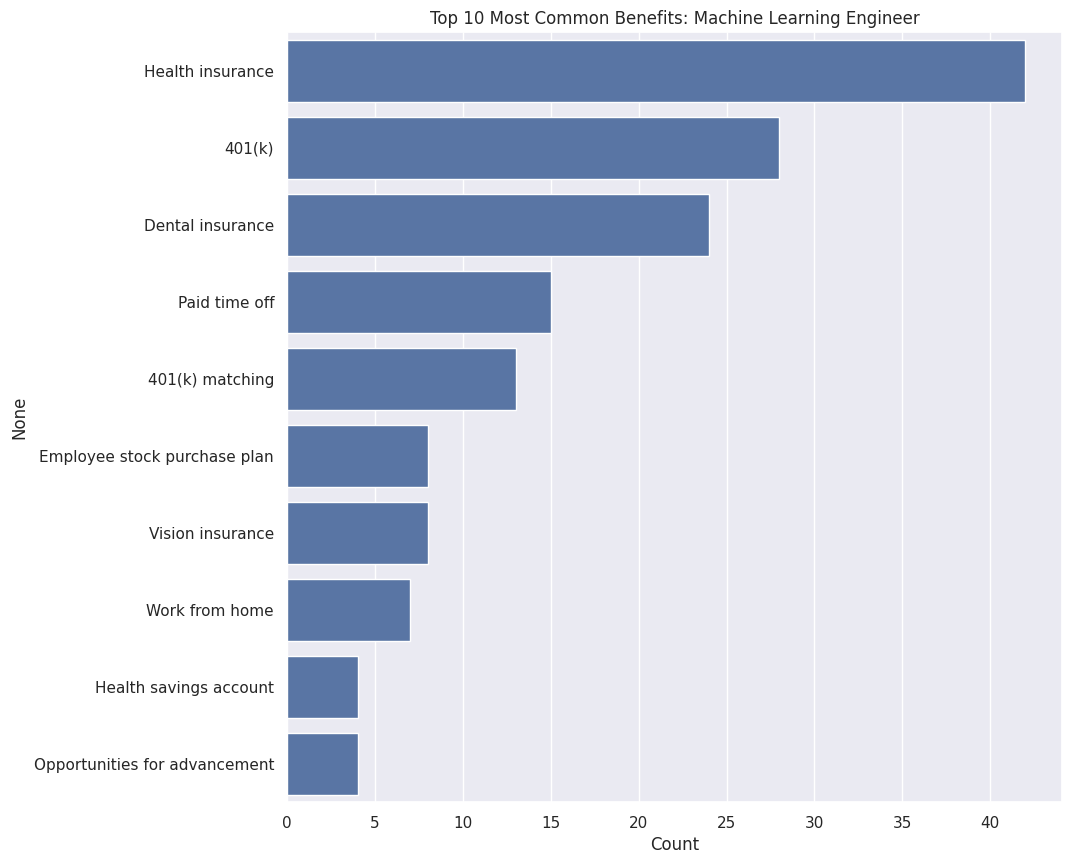

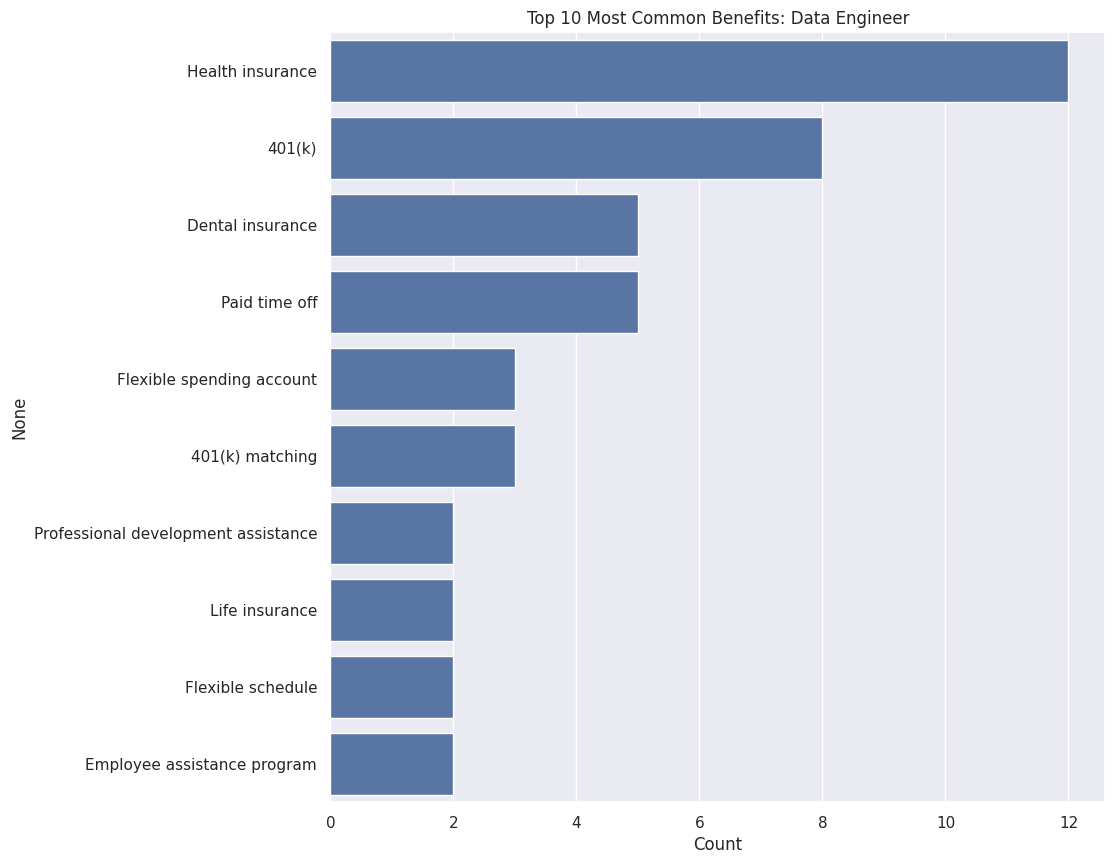

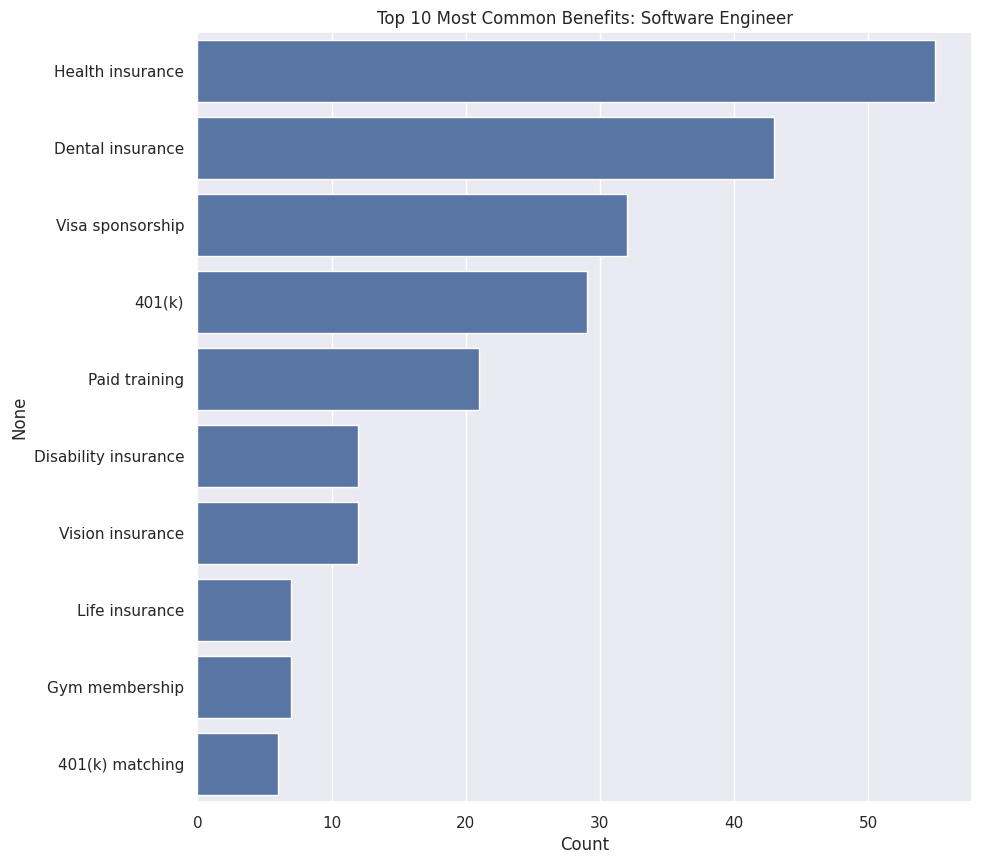

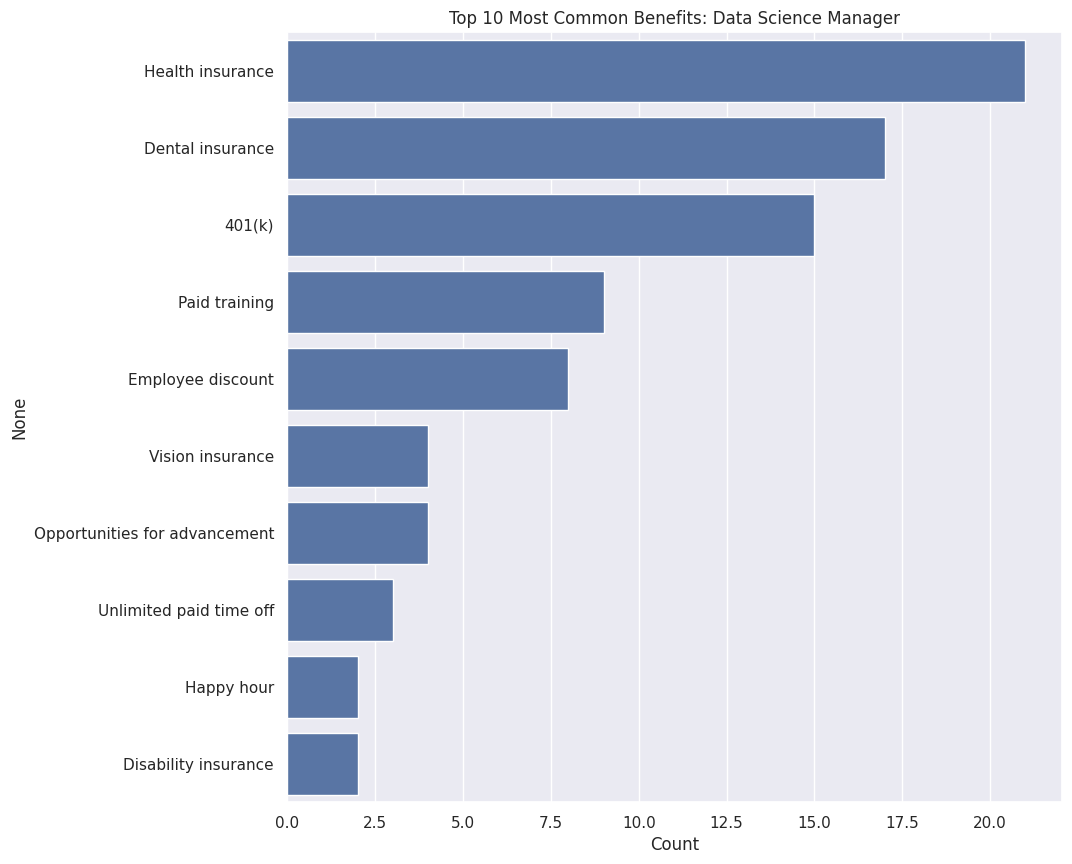

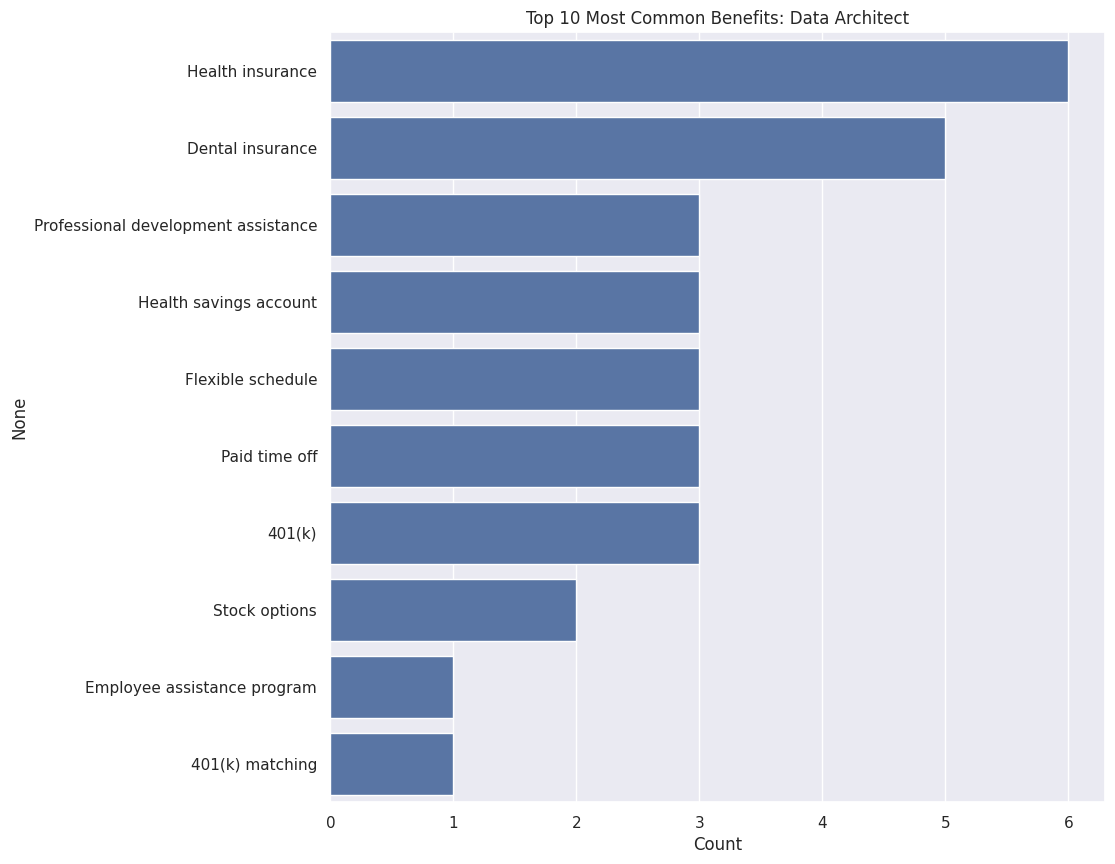

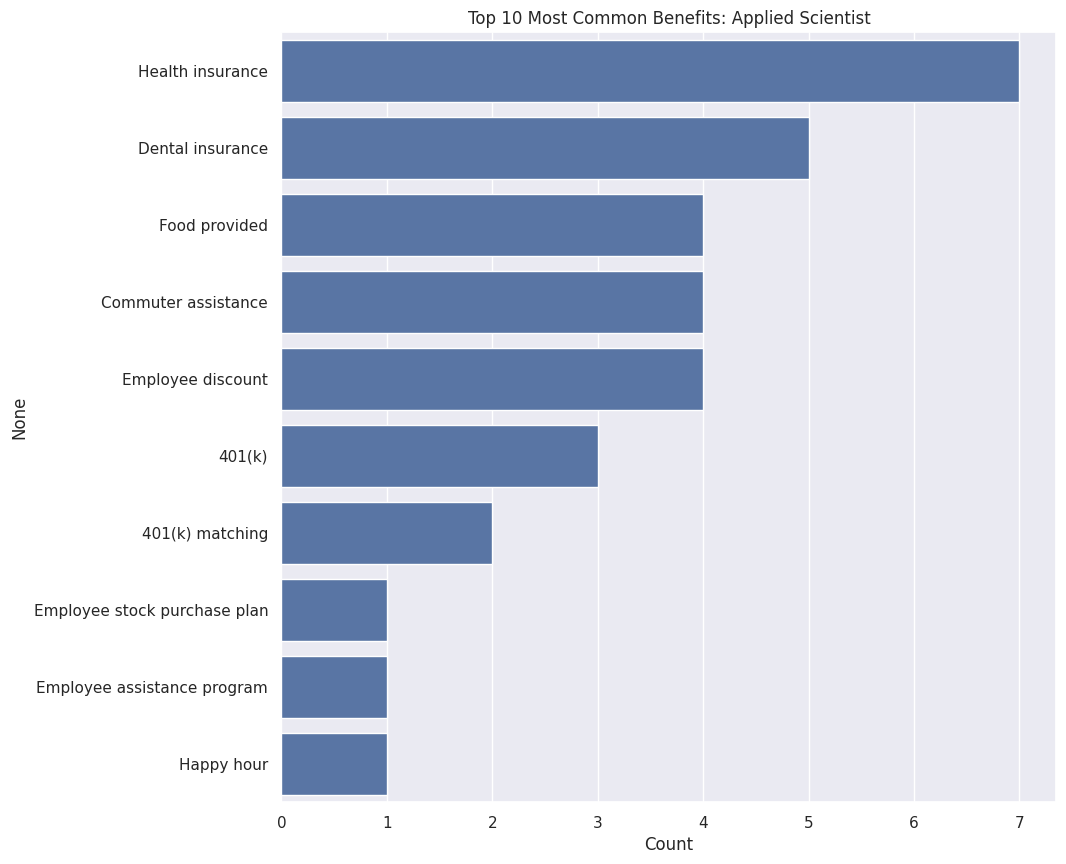

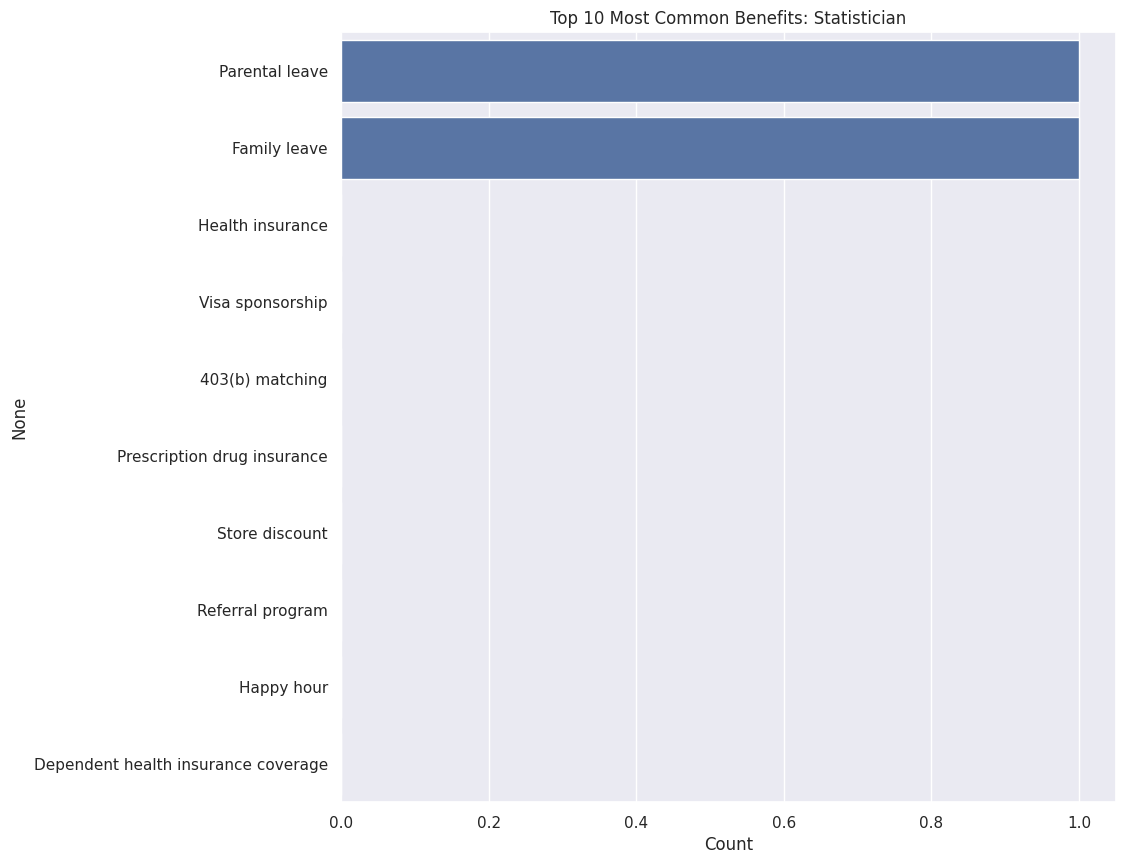

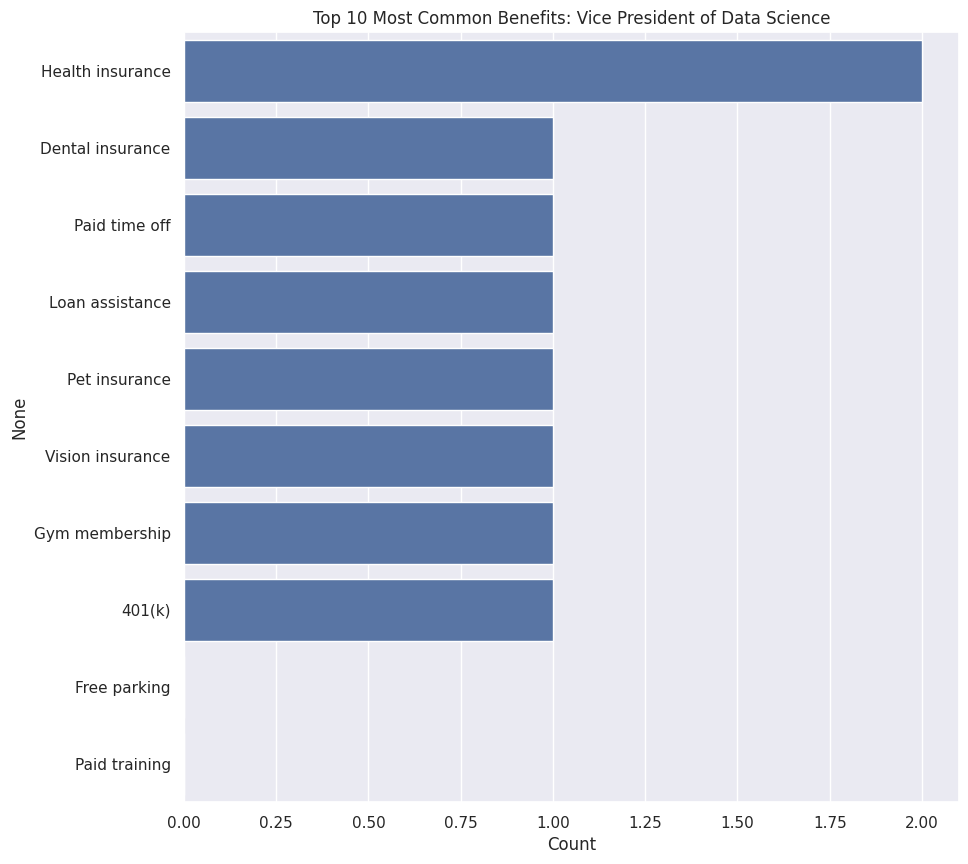

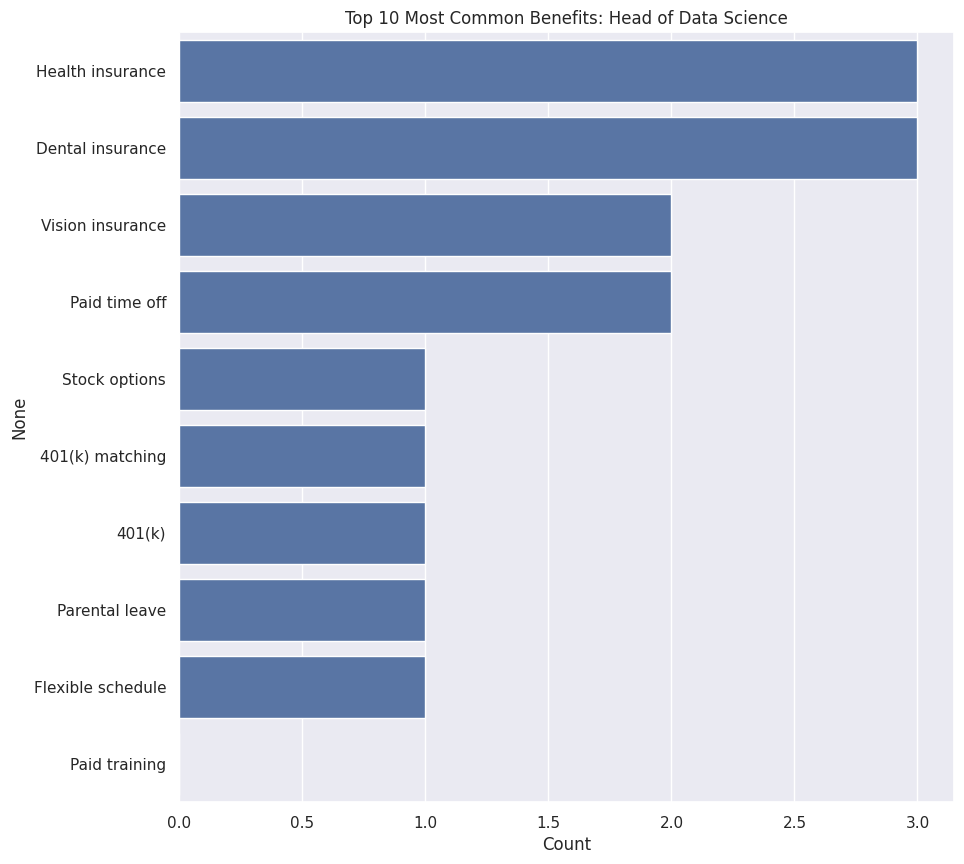

In [78]:
for i in df_1.Title.unique():
    benefits_index = df_3.loc[df_1[df_1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).index
    benefits_counts = df_3.loc[df_1[df_1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=benefits_index[0:10], x=benefits_counts[0:10])
    plt.title('Top 10 Most Common Benefits: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

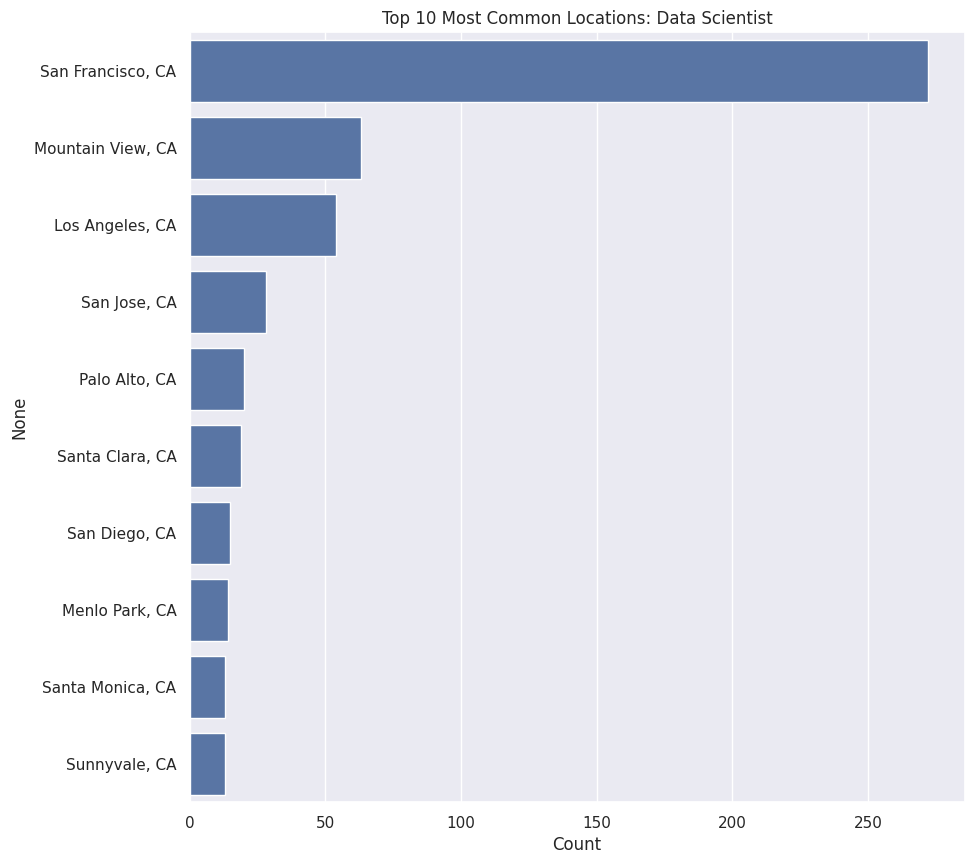

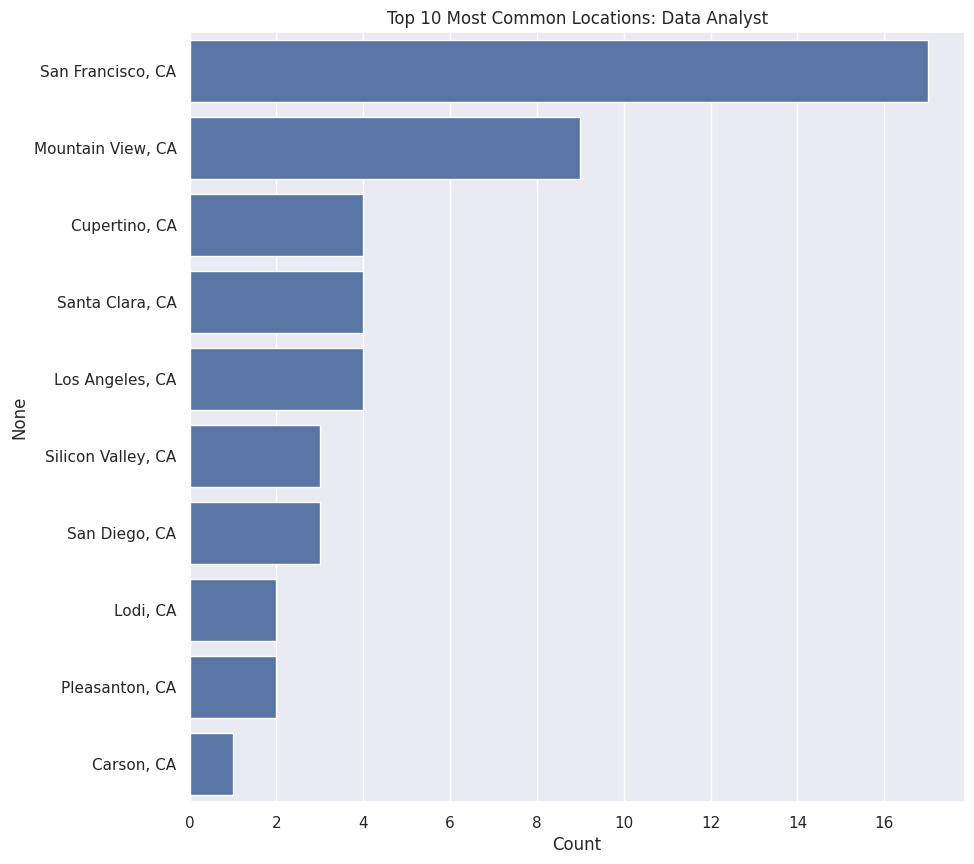

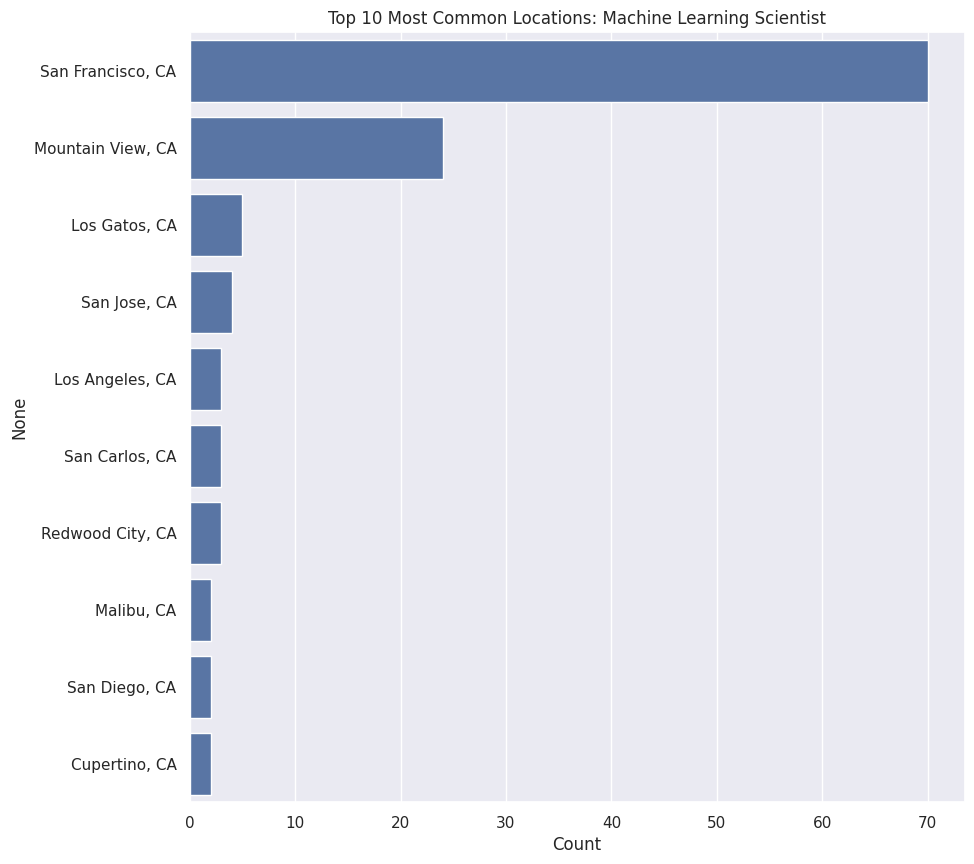

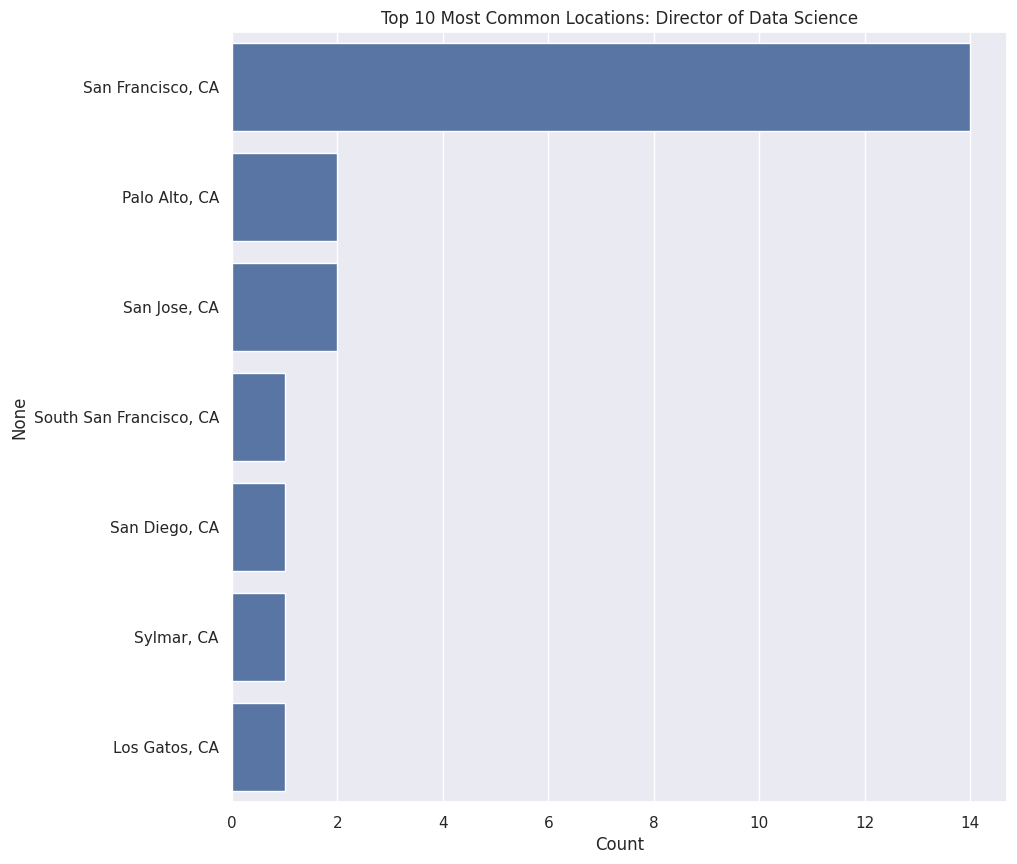

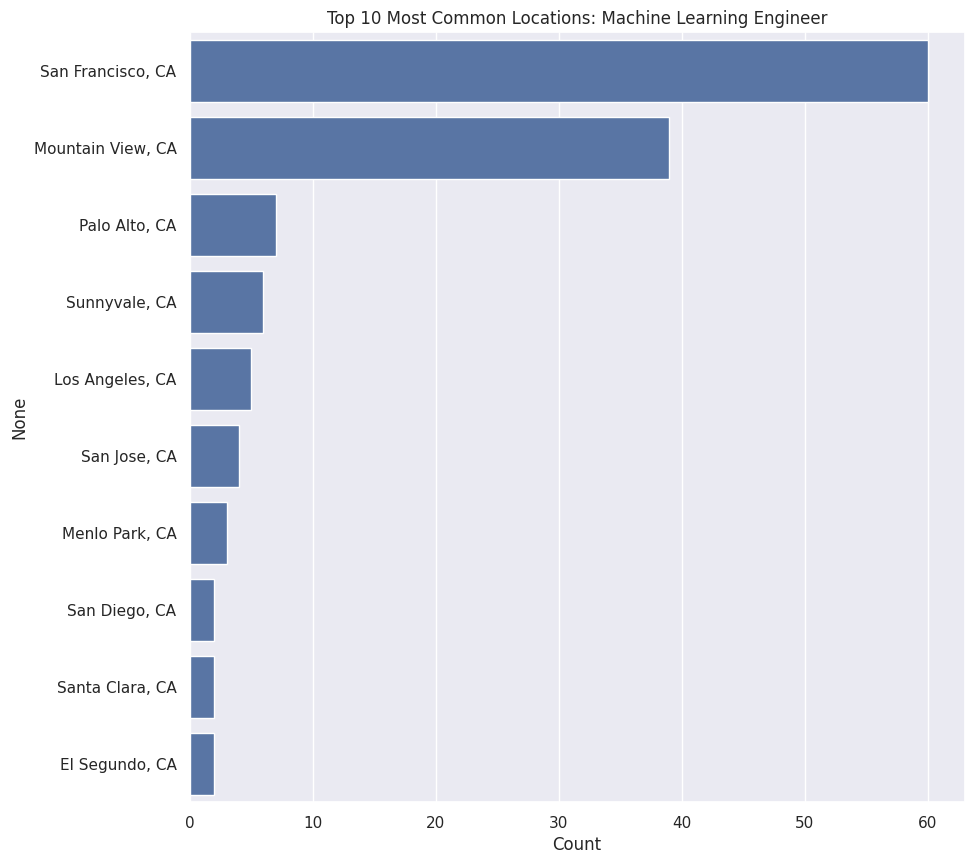

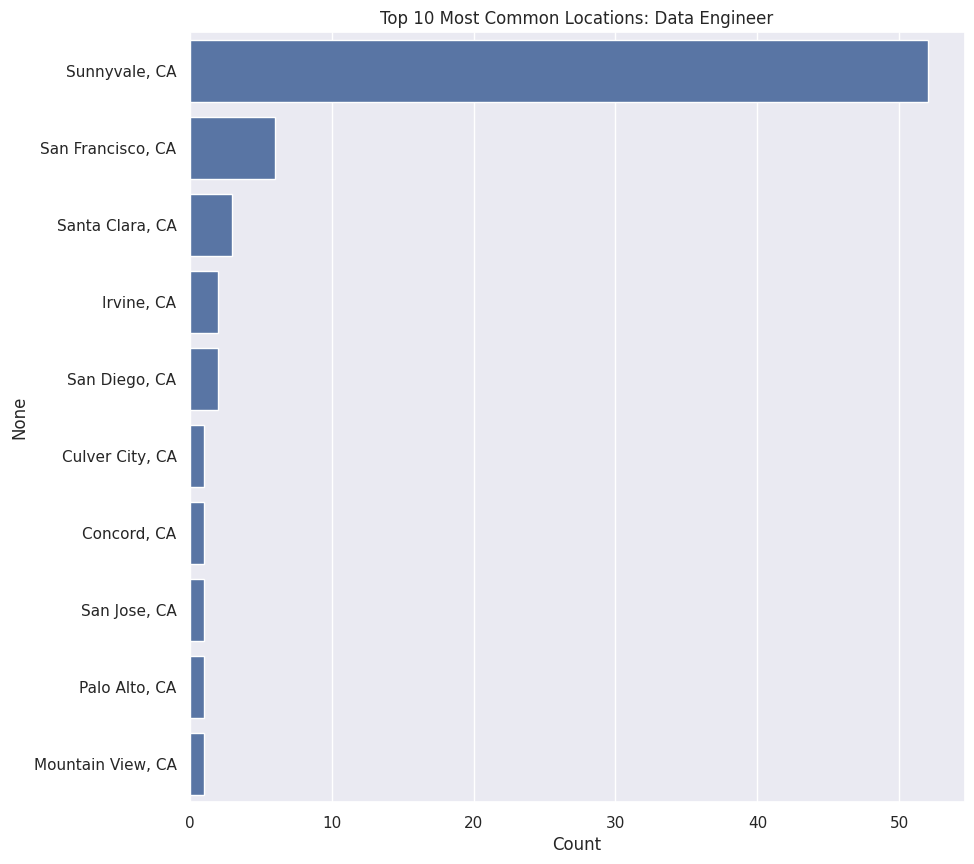

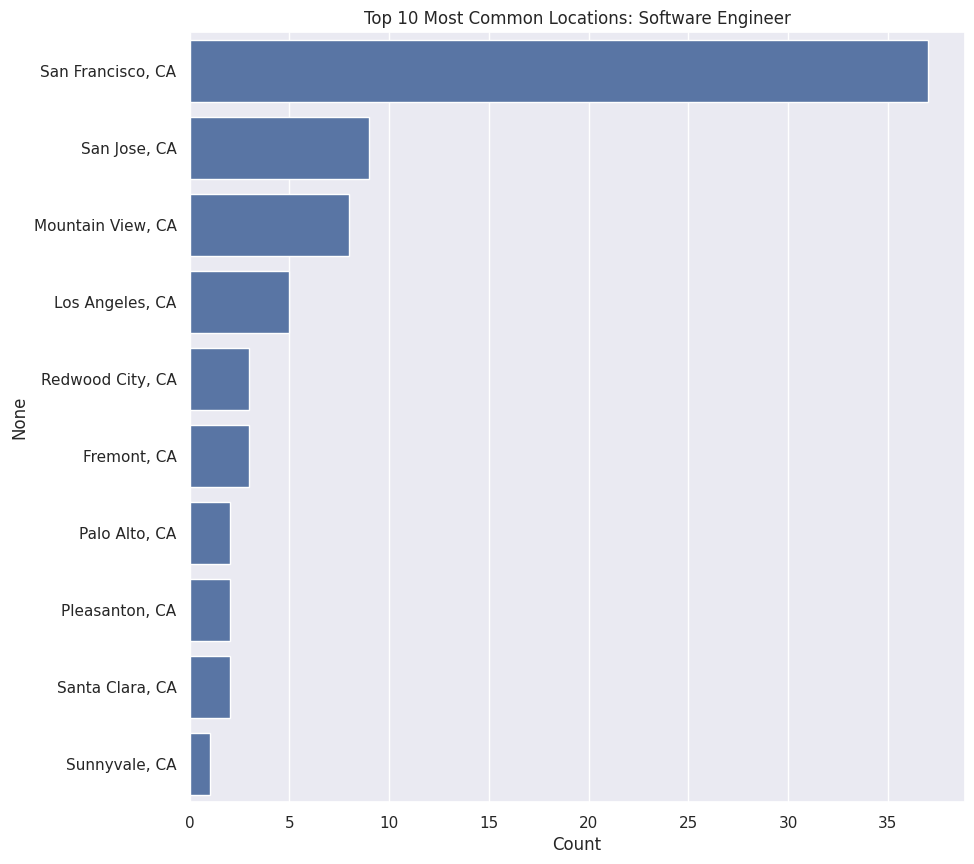

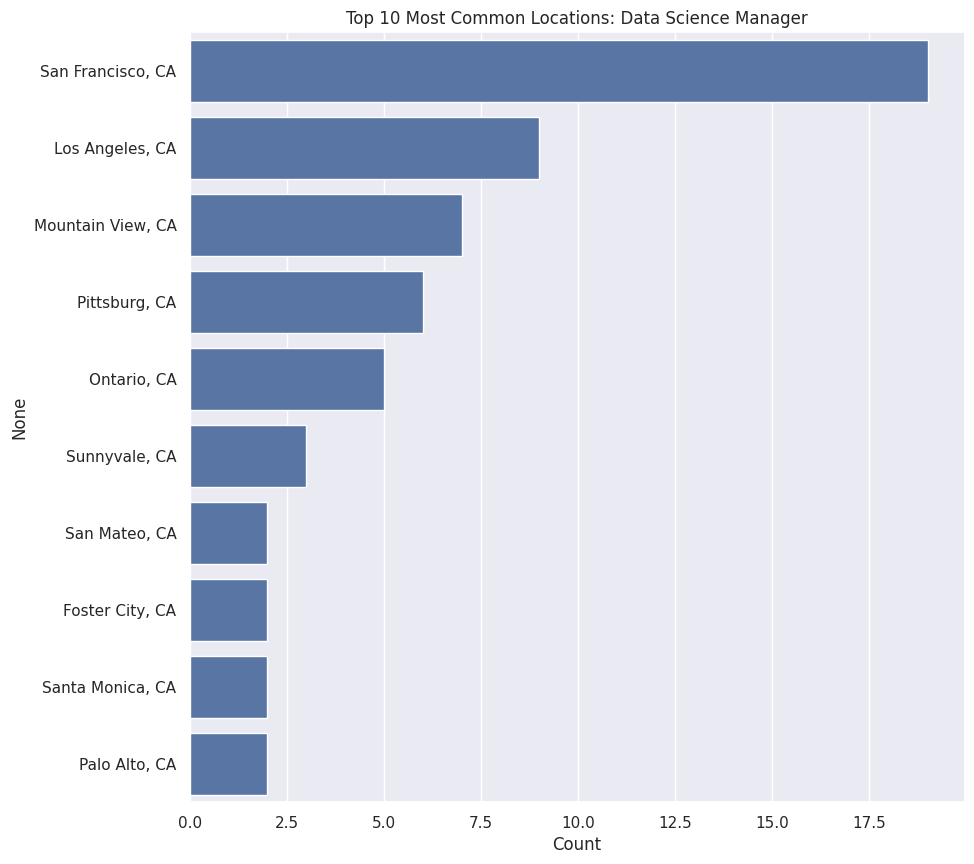

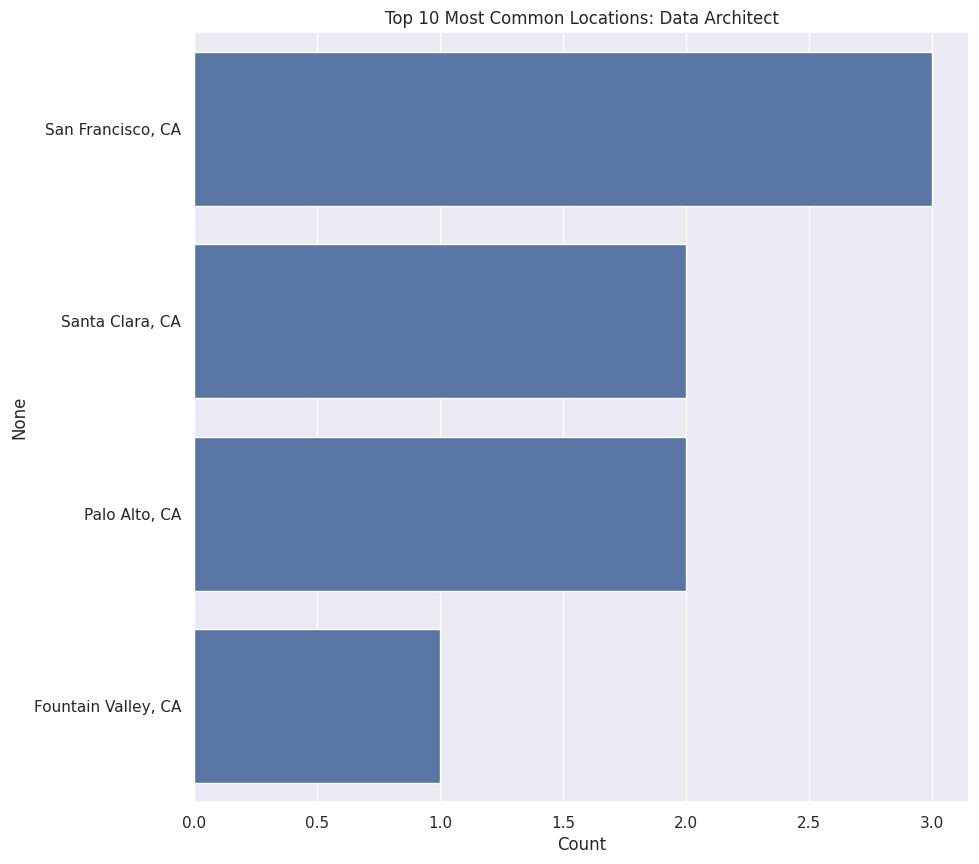

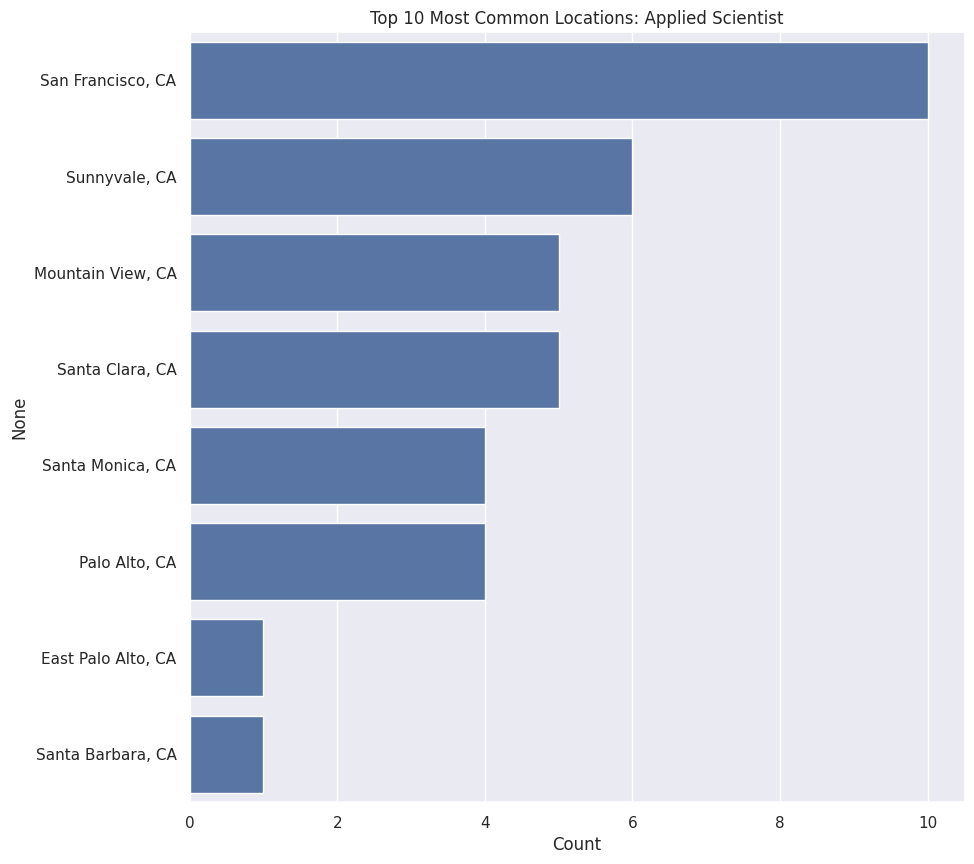

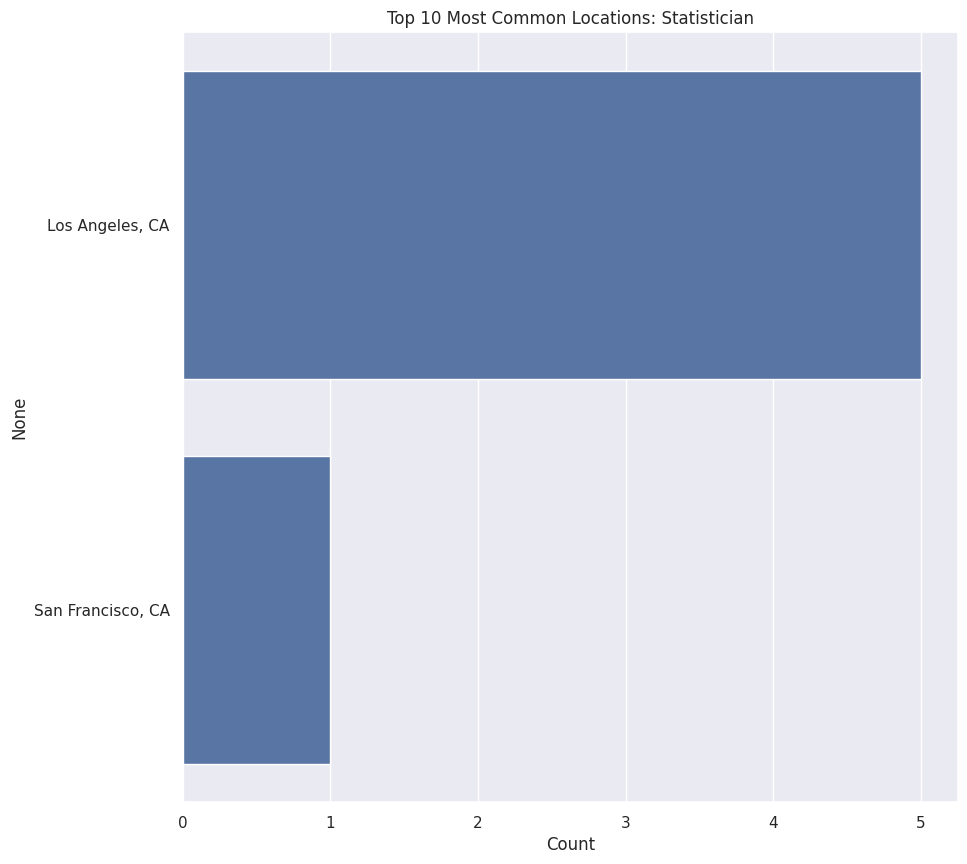

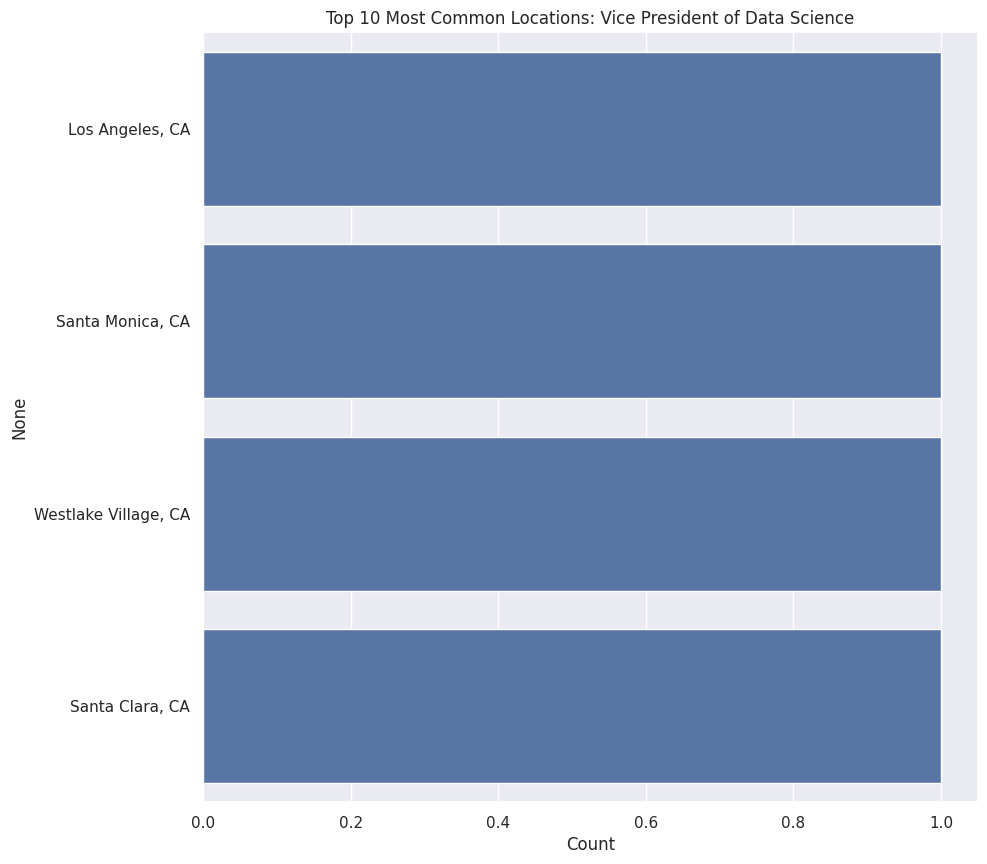

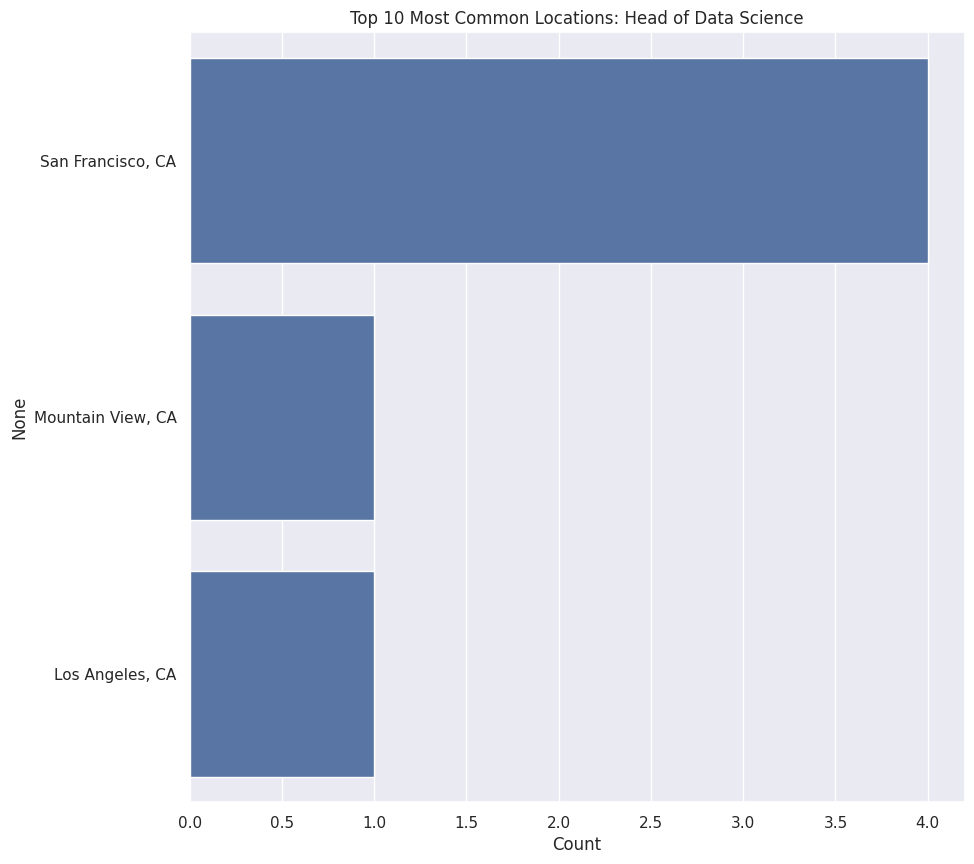

In [83]:
for i in df_1.Title.unique():
    locations_index = df_1[df_1.Title == i]['Location'].value_counts().index
    locations_counts = df_1[df_1.Title == i]['Location'].value_counts().values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=locations_index[0:10], x=locations_counts[0:10])
    plt.title('Top 10 Most Common Locations: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for jobs in Texas
df_texas = df_1[df_1['Location'].str.contains('TX', na=False)]

# Iterate over unique job titles
for title in df_texas['Title'].unique():
    # Filter data for current job title
    title_df = df_texas[df_texas['Title'] == title]
    # Count occurrences of each location
    location_counts = title_df['Location'].value_counts()
    # Get the location with the highest count
    best_location = location_counts.idxmax()
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=location_counts.values[:10], y=location_counts.index[:10], palette='viridis')
    plt.title(f"Top 10 Most Common Locations for {title} Jobs in Texas")
    plt.xlabel('Count')
    plt.ylabel('Location')
    plt.show()
    print(f"The best location for {title} jobs in Texas is: {best_location}")


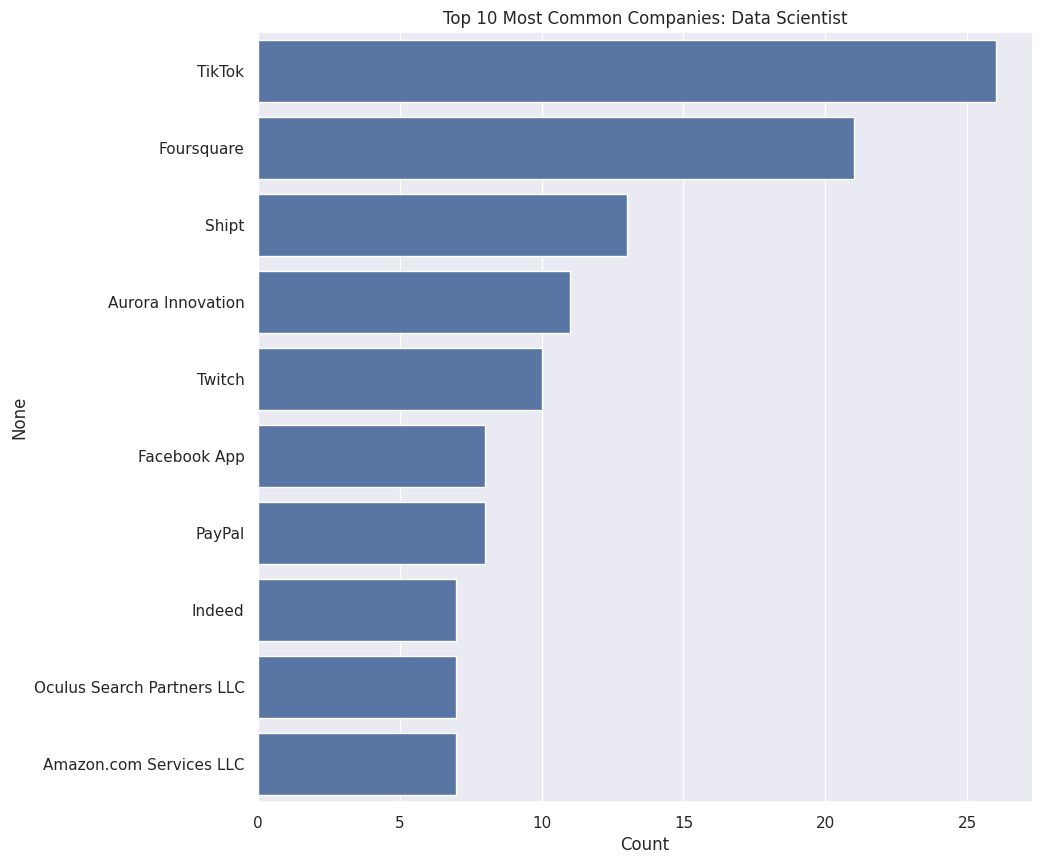

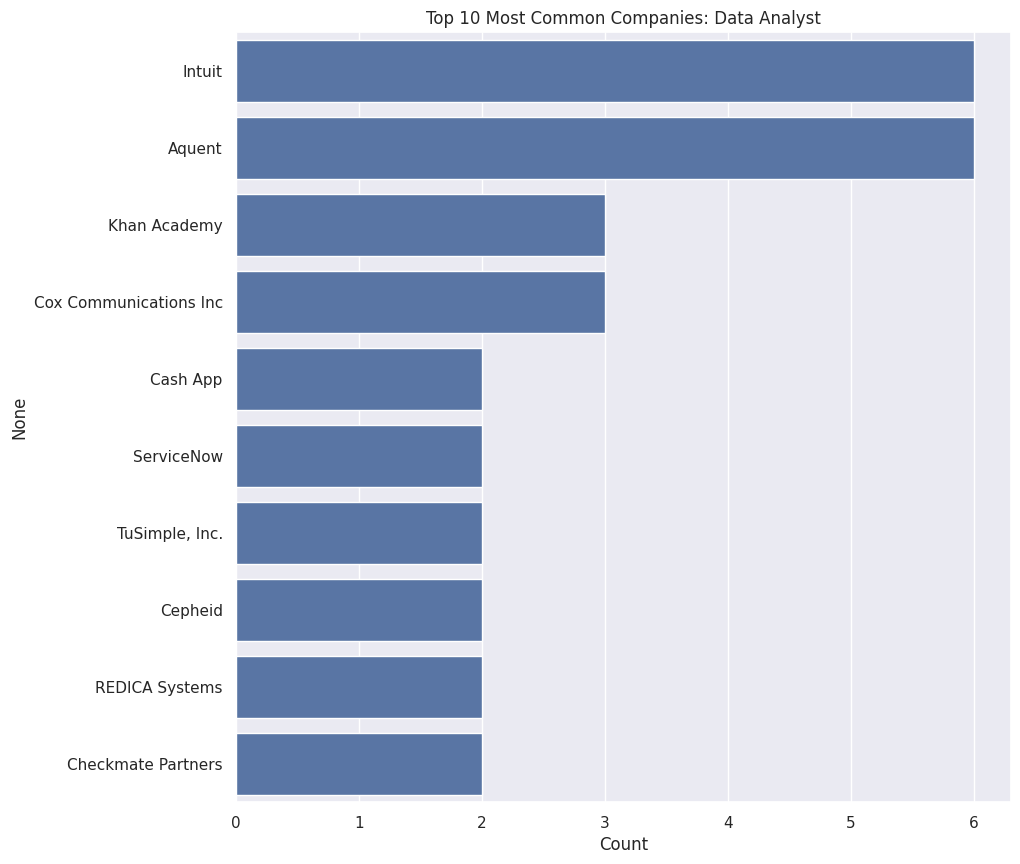

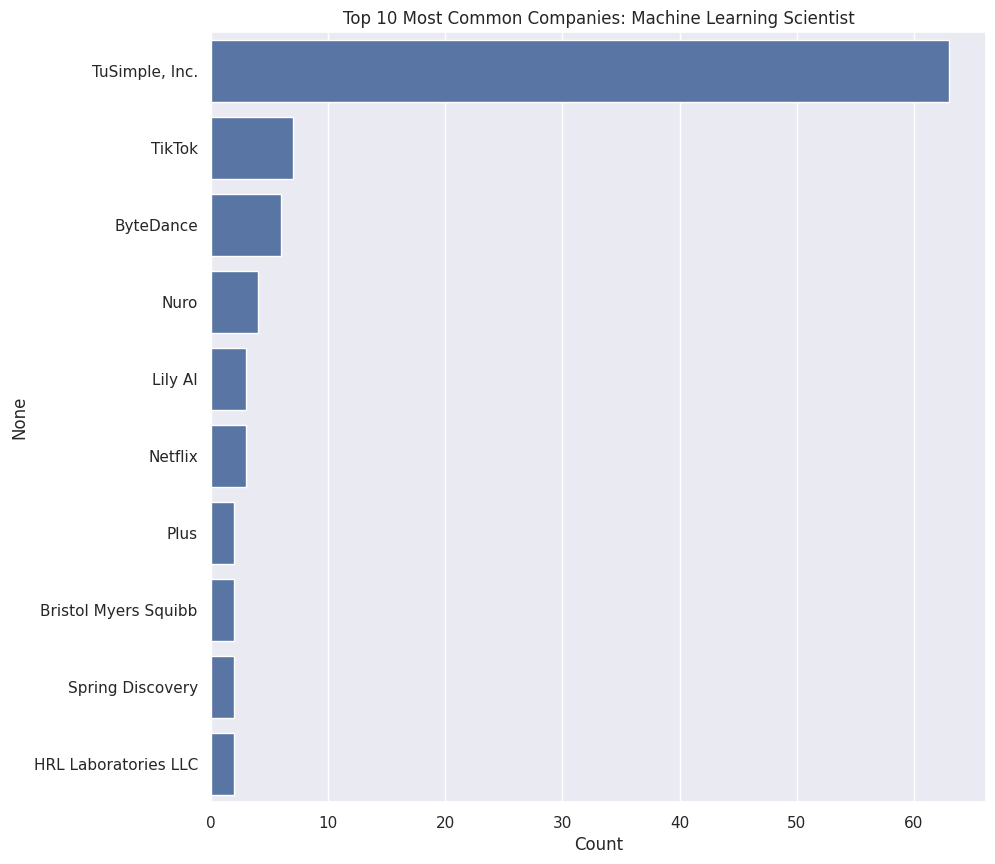

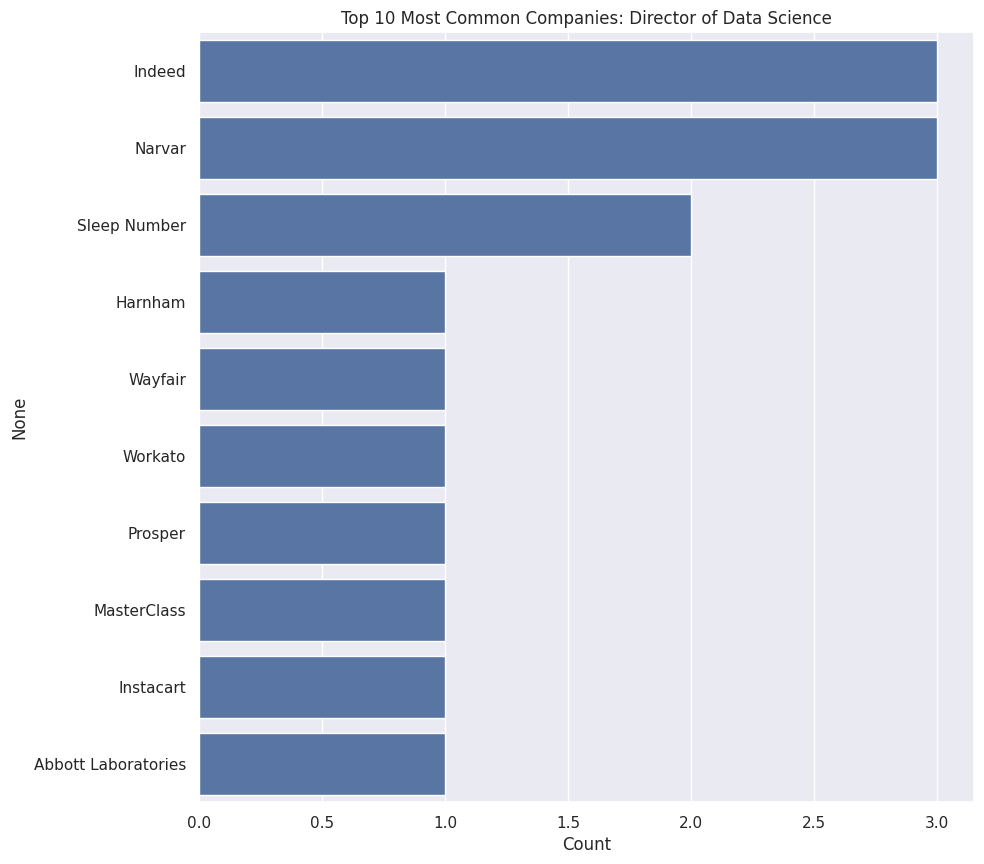

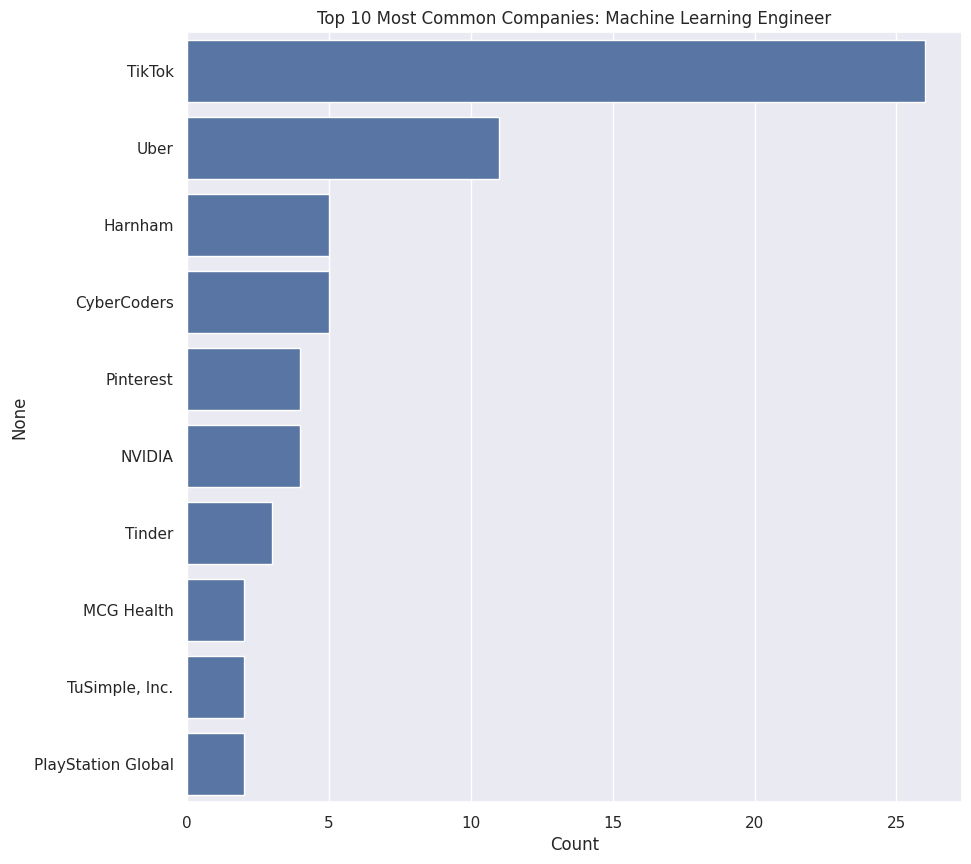

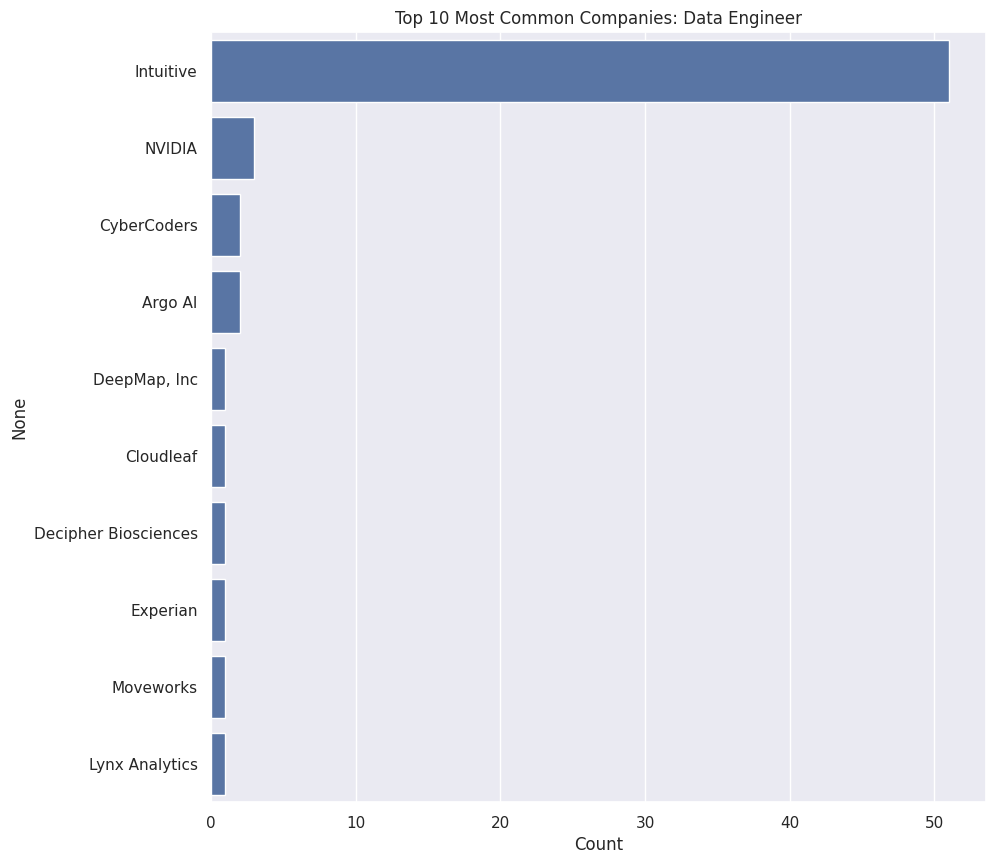

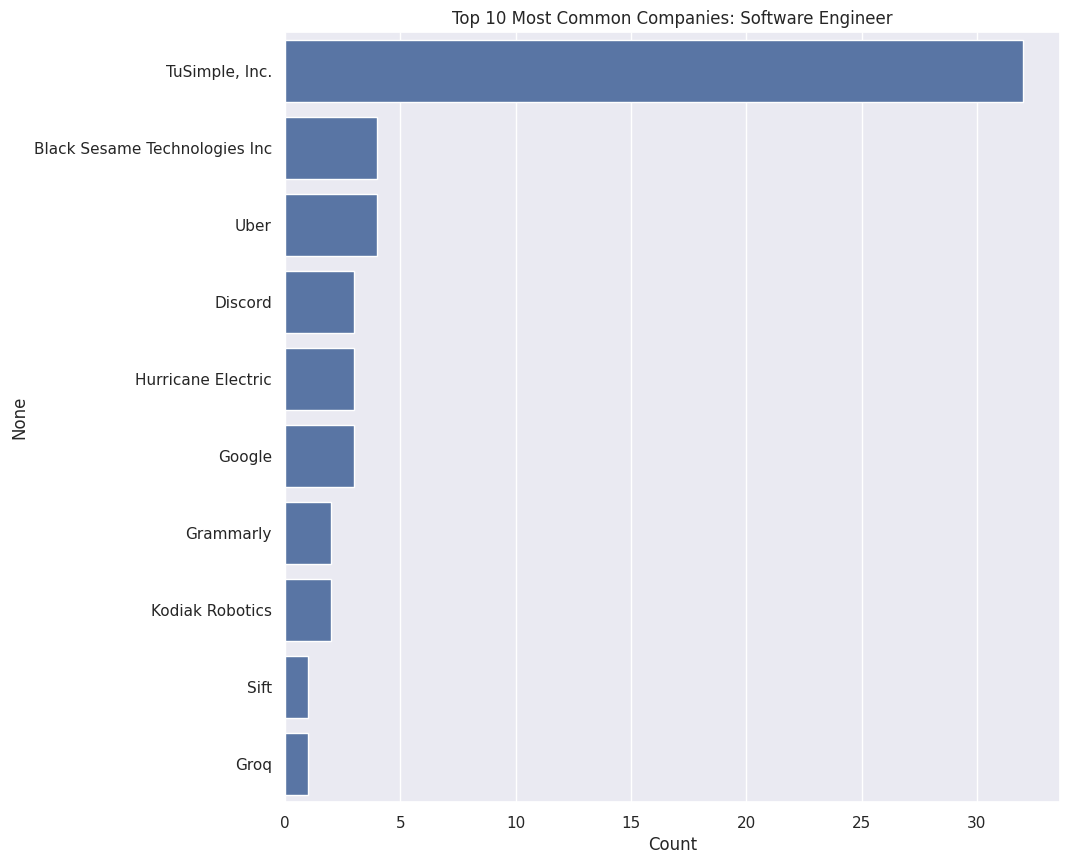

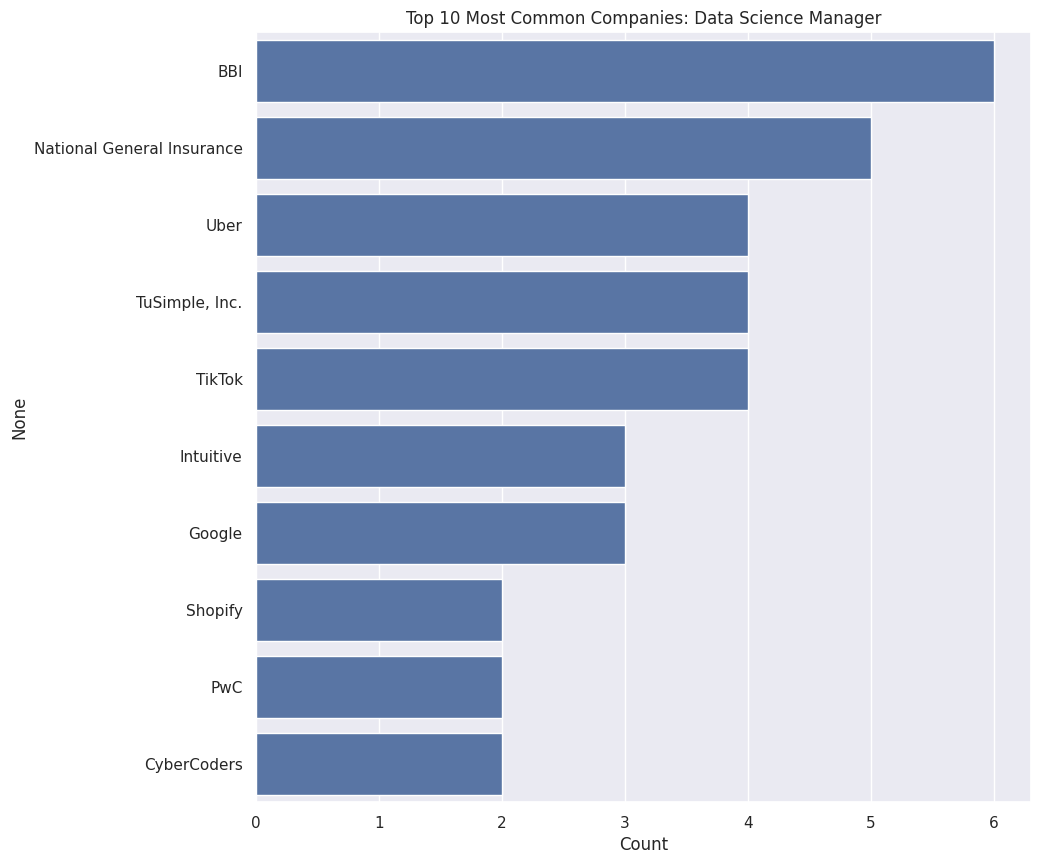

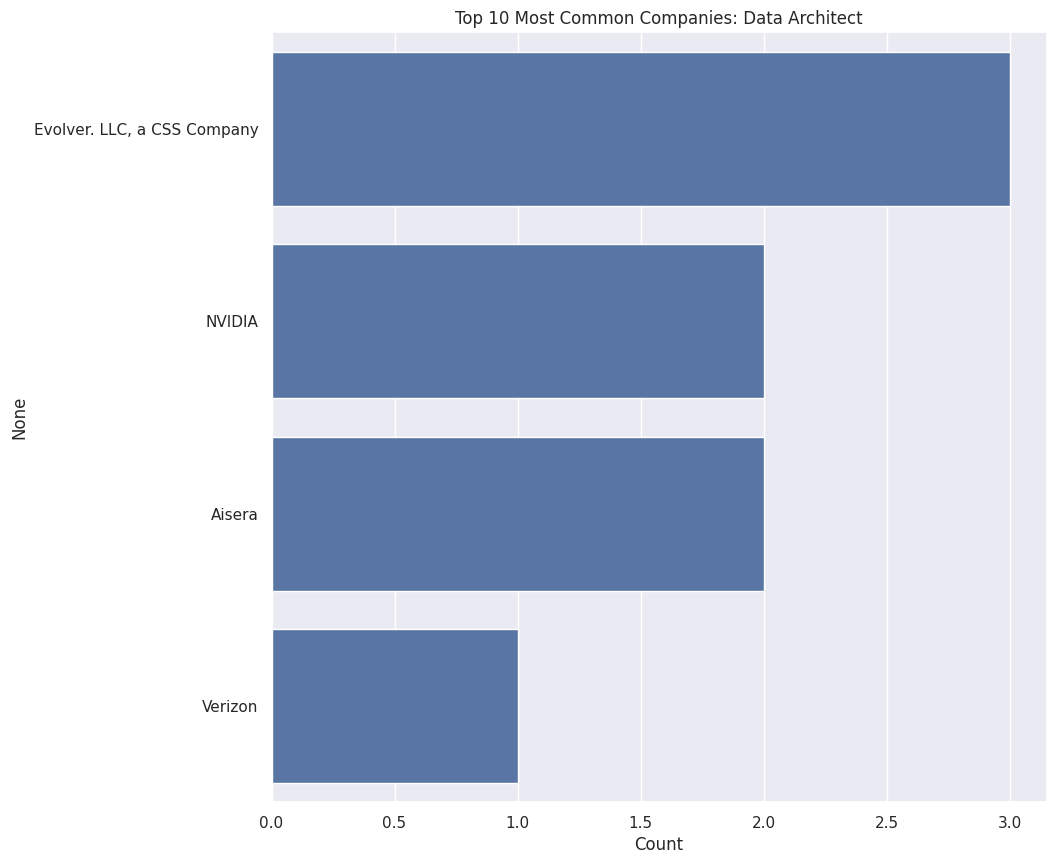

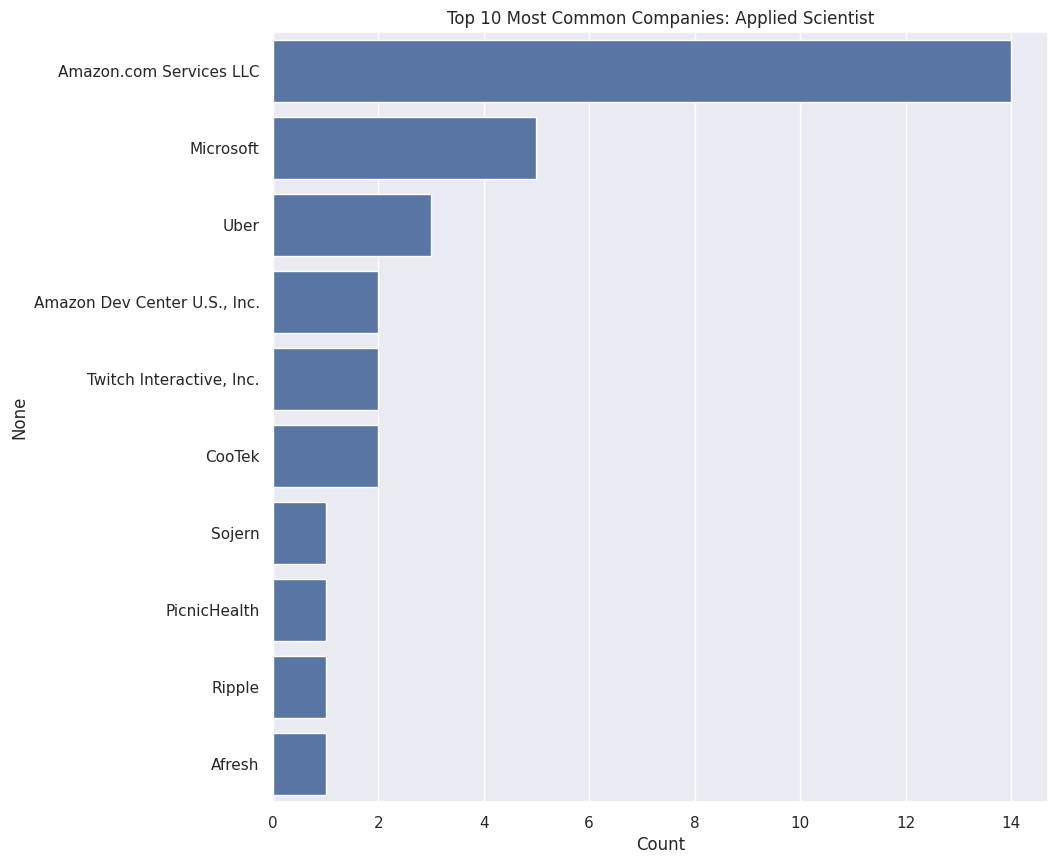

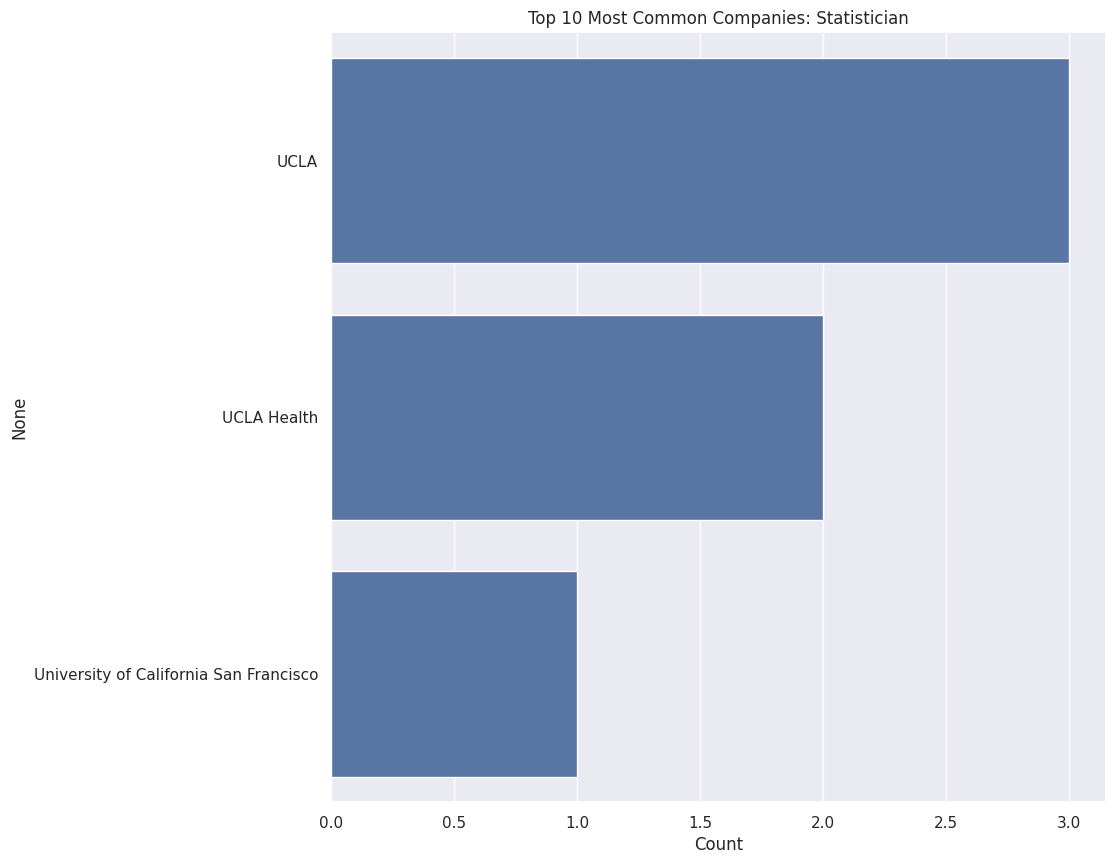

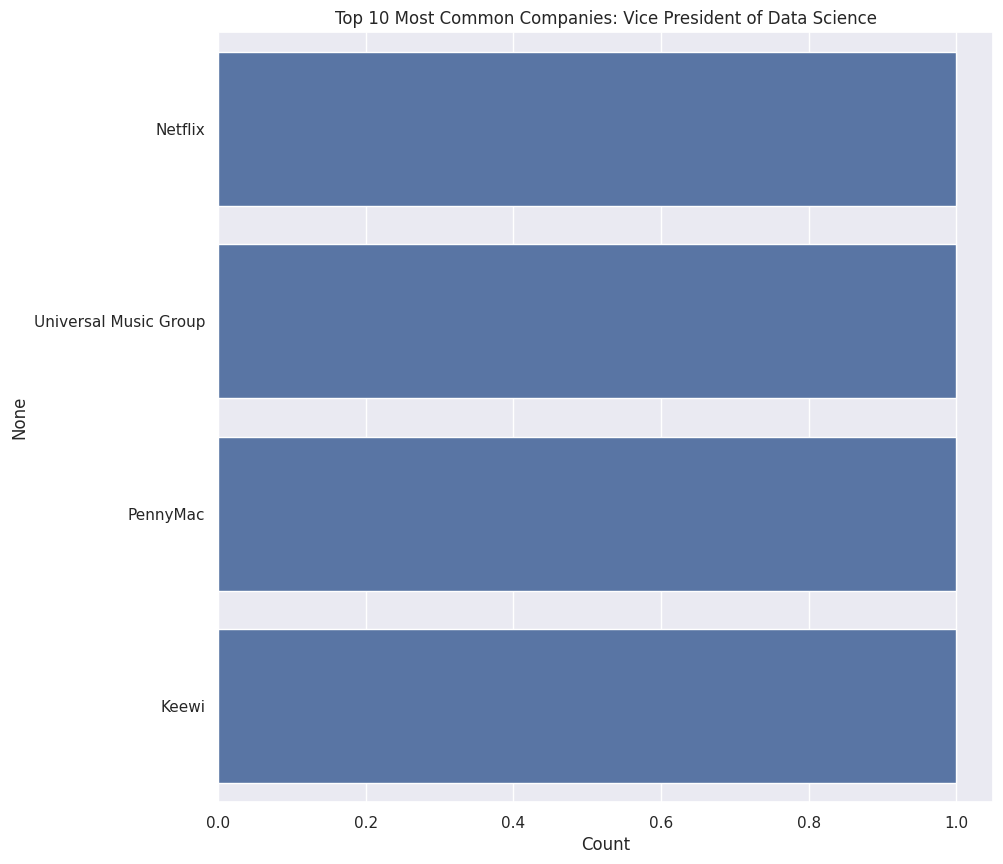

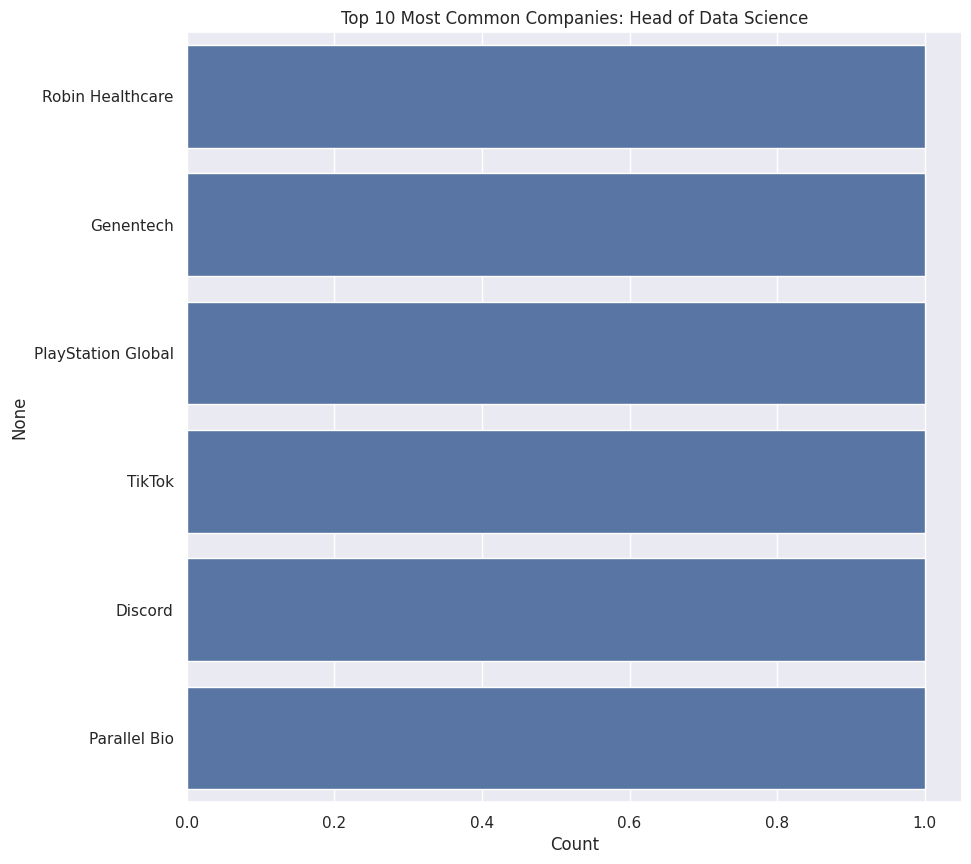

In [39]:
for i in df_1.Title.unique():
    company_index = df_1[df_1.Title == i]['Company'].value_counts().index
    company_counts = df_1[df_1.Title == i]['Company'].value_counts().values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=company_index[0:10], x=company_counts[0:10])
    plt.title('Top 10 Most Common Companies: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

# 5. Imputation by SimpleImputer and KNNImputer

In [80]:
from sklearn.impute import SimpleImputer
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_1.loc[:,'Location'] = imp_most_frequent.fit_transform(df_1.loc[:,'Location'].values.reshape(-1,1))
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1287 non-null   object 
 1   Company   1285 non-null   object 
 2   Location  1287 non-null   object 
 3   Salary    1209 non-null   float64
 4   Levels    1287 non-null   object 
dtypes: float64(1), object(4)
memory usage: 50.4+ KB


In [44]:
knn_impute_salary = df_1[~pd.isna(df_1.Company)].loc[:,['Title', 'Company', 'Location', 'Salary']]

no_na_salary = knn_impute_salary.loc[~pd.isna(knn_impute_salary.Salary),:]

X = no_na_salary.copy()
y = no_na_salary.pop('Salary')
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

def reg_performance(regressor, model_name):
    print(model_name)
    print('Best Score: {} +/- {}'.format(str(regressor.best_score_),str(regressor.cv_results_['std_test_score'][regressor.best_index_])))
    print('Best Parameters: ' + str(regressor.best_params_))

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'n_neighbors' : [1,2,3,4,5,7,9,11,13,15],
               'weights' : ['uniform','distance']}
reg_knn = GridSearchCV(knn, param_grid = param_grid, cv = 10, scoring='neg_mean_squared_error', n_jobs = -1)
best_reg_knn = reg_knn.fit(X_train,y_train)
reg_performance(best_reg_knn,'kNeighborsRegressor')

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
knn = KNeighborsRegressor(n_neighbors= 2, weights= 'distance')
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print('KNeighborsRegressor')
print('MSE: {}'.format(mean_squared_error(y_test,pred_knn)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,pred_knn))))
print('MAE: {}'.format(mean_absolute_error(y_test,pred_knn)))
print('R-squared: {}'.format(r2_score(y_test,pred_knn)))

kNeighborsRegressor
Best Score: -541753.8679218611 +/- 769735.2019875911
Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}
KNeighborsRegressor
MSE: 526791.9465619664
RMSE: 725.8043445460811
MAE: 66.01307071713615
R-squared: 0.9992760784941996


In [45]:
from sklearn.impute import KNNImputer
knn_impute_salary = pd.get_dummies(knn_impute_salary)
imputer = KNNImputer(n_neighbors=2, weights='distance')
result = pd.DataFrame(imputer.fit_transform(knn_impute_salary))

imputed_salary = result.iloc[:,0]

j = 0
for i in df_1[~pd.isna(df_1.Company)].index:
    df_1.loc[i,'Salary'] = imputed_salary[j]
    j+=1

imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_1.loc[:,['Location','Company']] = imp_most_frequent.fit_transform(df_1.loc[:,['Location','Company']])

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1287 non-null   object 
 1   Company   1287 non-null   object 
 2   Location  1287 non-null   object 
 3   Salary    1287 non-null   float64
 4   Levels    1287 non-null   object 
dtypes: float64(1), object(4)
memory usage: 50.4+ KB


In [46]:
imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_2 = pd.DataFrame(imputer_most_frequent.fit_transform(df_2), columns = df_2.columns)

pd.isna(df_2).sum().sum()

0

In [47]:
df_modeling = pd.concat([df_1, df_2], axis=1)
df_modeling.shape
df_modeling.columns

df_no_drop_first = pd.DataFrame(pd.get_dummies(df_modeling.copy()))

df_modeling_drop_first = pd.DataFrame(pd.get_dummies(df_modeling.copy(), drop_first=True))
dropped_columns = list(set(df_no_drop_first.columns) - set(df_modeling_drop_first.columns))

In [48]:
df_modeling_drop_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 987 entries, Salary to Levels_Unknown
dtypes: float64(363), uint8(624)
memory usage: 4.3 MB


In [49]:
df_modeling_drop_first.head()

Salary  Analysis skills  Communication skills  Research    R  \
0  110000.0              1.0                   1.0       1.0  1.0   
1  120000.0              0.0                   0.0       0.0  1.0   
2  150000.0              0.0                   0.0       0.0  0.0   
3  150000.0              0.0                   1.0       0.0  1.0   
4  130000.0              0.0                   0.0       0.0  0.0   

   Machine learning  Bachelor's degree  Master's degree  Doctoral degree  \
0               1.0                1.0              1.0              1.0   
1               0.0                1.0              1.0              0.0   
2               1.0                1.0              1.0              1.0   
3               0.0                0.0              1.0              0.0   
4               0.0                0.0              0.0              1.0   

   Doctor of Philosophy  ...  Location_West Hollywood, CA  \
0                   1.0  ...                            0   
1                   0.0  ...                            0   
2                   0.0  ...                            0   
3                   0.0  ...                            0   
4                   1.0  ...                            0   

   Location_West Sacramento, CA  Location_Westlake Village, CA  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   Location_Woodland Hills, CA  Levels_Jr.  Levels_Lead  Levels_Principal  \
0                            0           1            0                 0   
1                            0           0            0                 0   
2                            0           0            0                 0   
3                            0           0            0                 0   
4                            0           1            0                 0   

   Levels_Sr.  Levels_Staff  Levels_Unknown  
0           0             0               0  
1           0             0               1  
2           0             1               0  
3           0             0               1  
4           0             0               0  

[5 rows x 987 columns]

In [50]:
dropped_columns

['Title_Applied Scientist',
 'Levels_Distinguished',
 'Company_23andMe',
 'Location_Alameda, CA']

# 6. OLS data preparation

In [51]:
for i in df_modeling_drop_first.columns[1:]:
    df_modeling_drop_first.loc[:,i] = df_modeling_drop_first.loc[:,i].astype('Int64')

/tmp/ipykernel_668534/1439129833.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_modeling_drop_first.loc[:,i] = df_modeling_drop_first.loc[:,i].astype('Int64')


In [52]:
X_drop_first = df_modeling_drop_first.copy()
y = X_drop_first.pop('Salary')

In [53]:
X_drop_first.shape

(1287, 986)

# 7. OLS analysis

With 986 predictors, using an alpha value of 0.05 will result in about 49 type I errors. Therefore, use a multiple testing technique to determine a more conservative alpha value to reduce the number of type I errors.

In [54]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_drop_first)
model = sm.OLS(y.astype(float),X_sm.astype(int))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.082
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.168
Time:                        01:19:40   Log-Likelihood:                -14539.
No. Observations:                1287   AIC:                         3.069e+04
Df Residuals:                     480   BIC:                         3.486e+04
Df Model:                         806                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                             1.907e+05   7.75e+04      2.461      0.014    3.84e+04    3.43e+05
Analysis skills                                                   5551.3898   9437.490      0.588      0.557    -1.3e+04    2.41e+04
Communication skills                                             -5007.6564   1.26e+04     -0.399      0.690   -2.97e+04    1.97e+04
Research                                                          -674.2089   1.21e+04     -0.056      0.956   -2.45e+04    2.31e+04
R                                                                -2730.7483   8856.811     -0.308      0.758   -2.01e+04    1.47e+04
Machine learning                                                 -1.949e+04   8814.997     -2.211      0.028   -3.68e+04   -2169.143
Bachelor's degree                                                -1.183e+04   7580.453     -1.561      0.119   -2.67e+04    3063.191
Master's degree                                                  -6355.7887   7326.935     -0.867      0.386   -2.08e+04    8041.042
Doctoral degree                                                   1.976e+04   2.03e+04      0.975      0.330   -2.01e+04    5.96e+04
Doctor of Philosophy                                              -2.12e+04   2.21e+04     -0.960      0.337   -6.46e+04    2.22e+04
Power BI                                                         -3.031e+04   2.09e+04     -1.448      0.148   -7.15e+04    1.08e+04
Relational databases                                              3.365e+04   2.09e+04      1.613      0.107   -7331.604    7.46e+04
Manufacturing                                                      623.6748   2.48e+04      0.025      0.980   -4.82e+04    4.94e+04
Microsoft Excel                                                  -3.468e+04   1.84e+04     -1.881      0.061   -7.09e+04    1552.246
Molecular biology                                                -7.973e+04   7.09e+04     -1.124      0.262   -2.19e+05    5.96e+04
Product management                                               -2.283e+04   1.53e+04     -1.494      0.136   -5.29e+04    7202.144
Usability                                                        -9126.8878    5.2e+04     -0.175      0.861   -1.11e+05    9.31e+04
Natural language processing                                      -1.451e+04   9821.758     -1.477      0.140   -3.38e+04    4788.504
Python                                                            1564.6239   8489.196      0.184      0.854   -1.51e+04    1.82e+04
SQL                                                               1339.6068   1.06e+04      0.126      0.900   -1.95e+04    2.22e+04
ICD coding              

In [55]:
from statsmodels.stats.multitest import multipletests

p_set = results.pvalues.values[1:]

reject, p_corrected, alphac_sidak, alphac_bonf = multipletests(pvals=p_set,
                                                               method='bonferroni',
                                                               alpha=0.05, 
                                                               is_sorted=False,
                                                               returnsorted=False)

print('Total number of hypothesis tests:', len(p_set))
print('Number of null hypotheses rejected at alpha = 0.05:', sum(results.pvalues.values < 0.05))
print('Number of null hypotheses rejected with adj. alpha with Bonferroni method:', sum(reject))
print('Adj. alpha value after FWER correction by Bonferroni method:', alphac_bonf)

Total number of hypothesis tests: 986
Number of null hypotheses rejected at alpha = 0.05: 22
Number of null hypotheses rejected with adj. alpha with Bonferroni method: 1
Adj. alpha value after FWER correction by Bonferroni method: 5.070993914807303e-05


In [56]:
print('Variables with a rejected null hypothesis using Bonferroni method:')
for i in results.pvalues.index[1:][reject]:
    print(i)

Variables with a rejected null hypothesis using Bonferroni method:
Performance marketing


In [57]:
order = results.pvalues.index[1:][reject][pd.DataFrame(results.params.values[1:][reject]).sort_values(by=0, ascending=False).index]

In [58]:
dropped_columns

['Title_Applied Scientist',
 'Levels_Distinguished',
 'Company_23andMe',
 'Location_Alameda, CA']

In [59]:
#modified from: https://stackoverflow.com/a/56780852
def show_values_on_bars(axs, h_v="v", space=0.5):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                if p.get_x() + p.get_width() > 0:
                    _x = p.get_x() + p.get_width() + float(space)
                elif p.get_x() + p.get_width() < 0:
                    _x = p.get_x() + p.get_width() - float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                if p.get_x() + p.get_width() > 0:
                    ax.text(_x, _y, value, ha="left")
                elif p.get_x() + p.get_width() < 0:
                    ax.text(_x, _y, value, ha="right")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

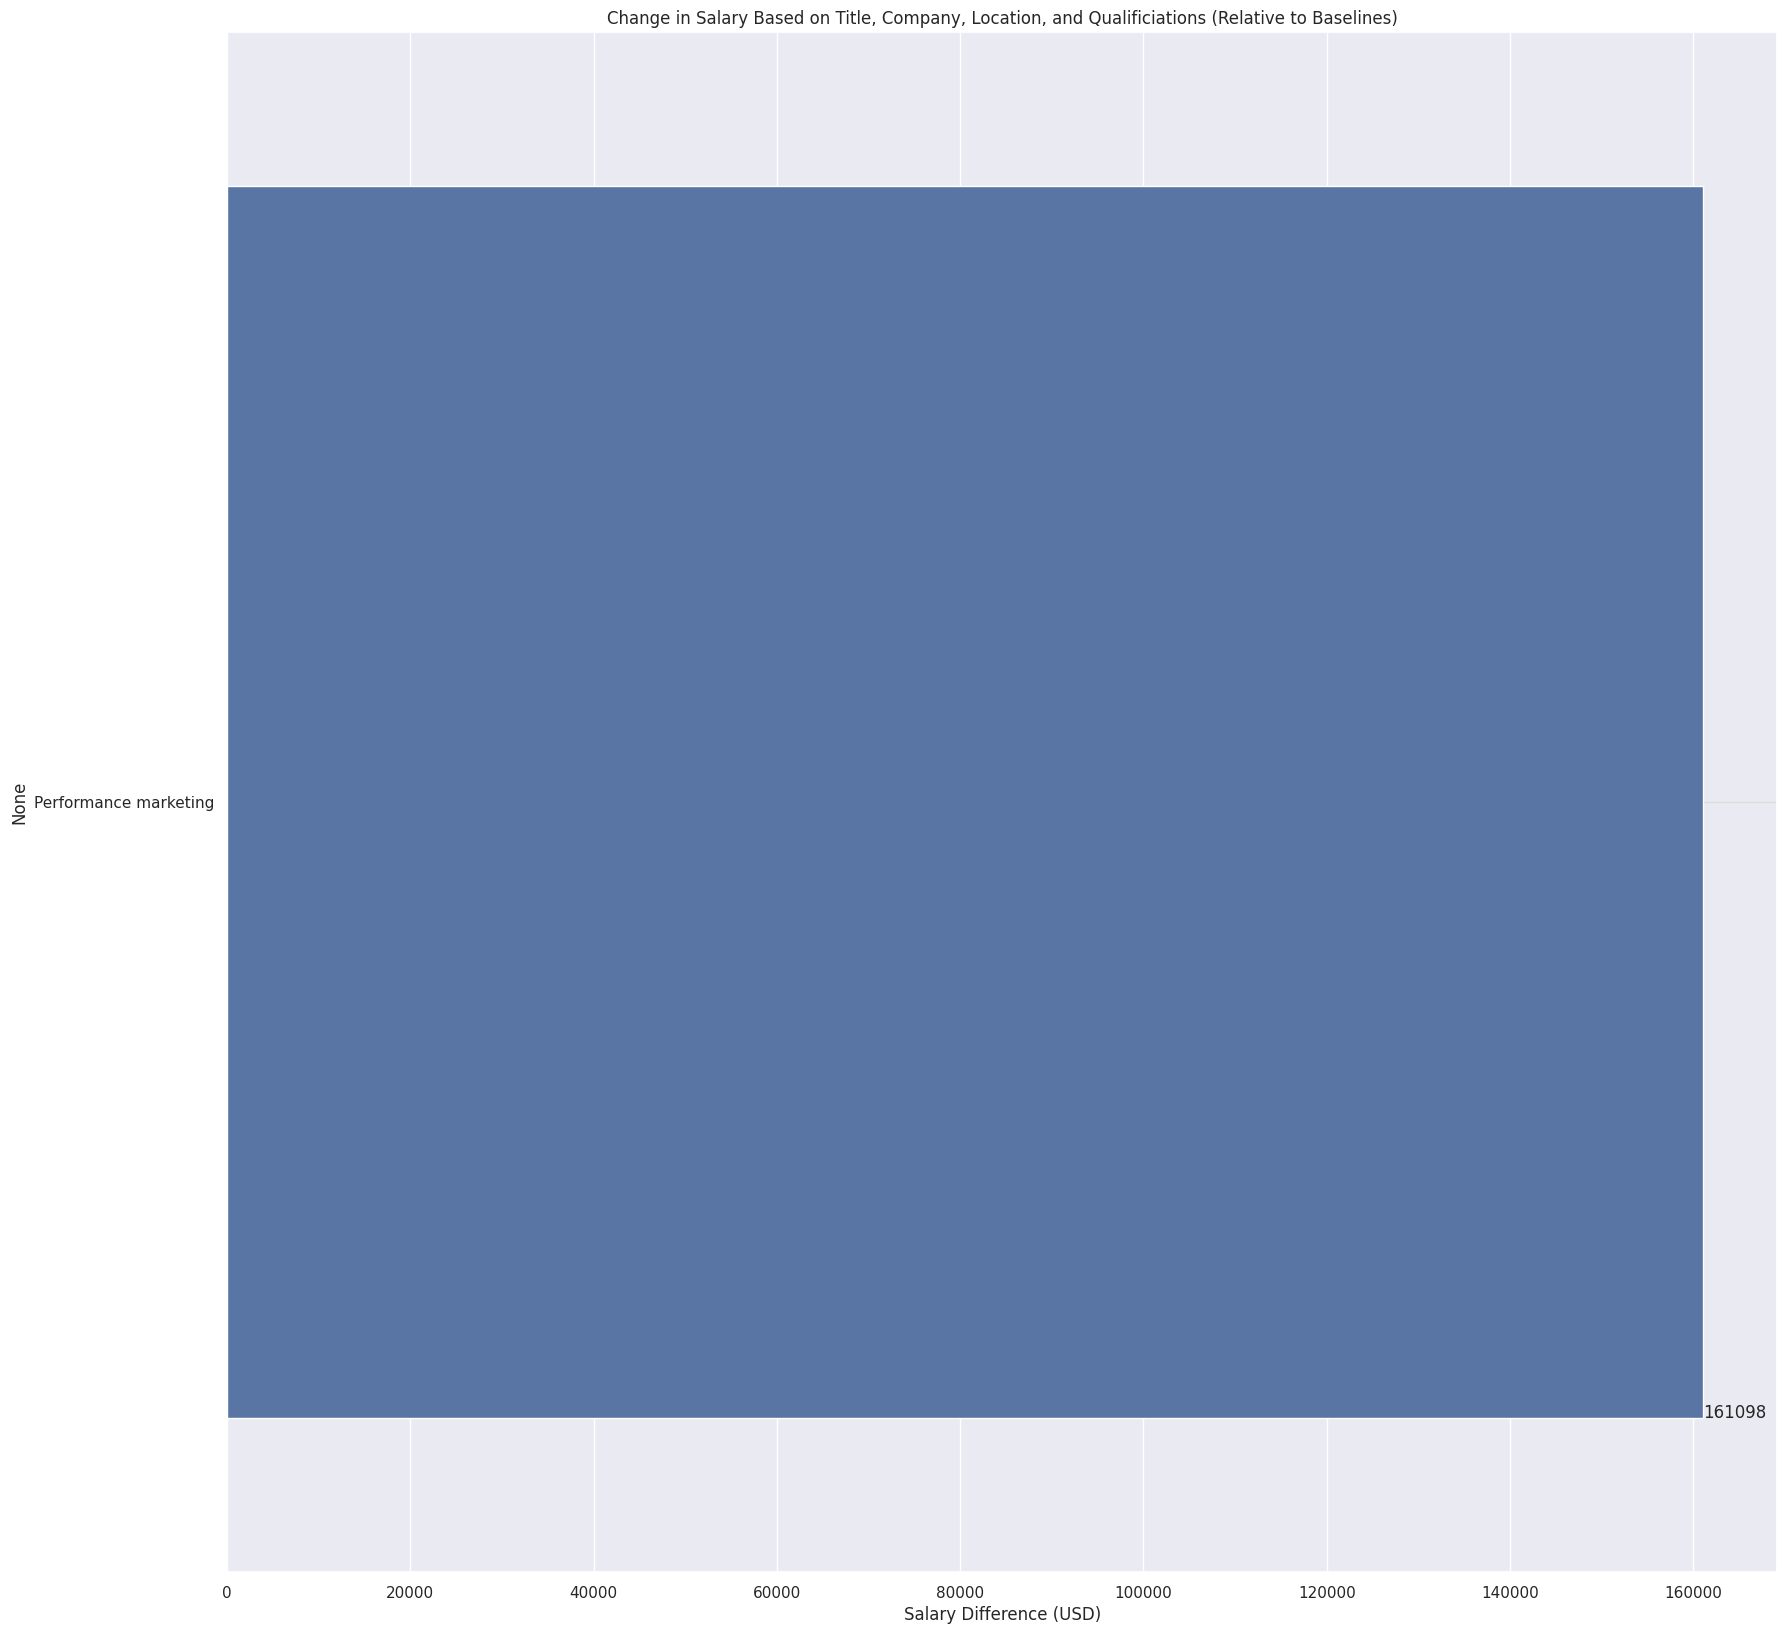

In [60]:
plt.figure(figsize=(20, 20))
bp = sns.barplot(y=results.pvalues.index[1:][reject],x=results.params.values[1:][reject], order = order)
bp.set_axisbelow(True)
bp.yaxis.grid(color='gainsboro', linestyle='solid')
plt.xlabel('Salary Difference (USD)')
plt.title('Change in Salary Based on Title, Company, Location, and Qualificiations (Relative to Baselines)')
show_values_on_bars(bp, "h", 1)

In [61]:
company = 0
title = 0
location = 0
levels = 0
qualifications = 0
for i in results.pvalues.index[1:][reject]:
    if 'Company' in i:
        company += 1
    elif 'Title' in i:
        title += 1
    elif 'Location' in i:
        location += 1
    elif 'Levels' in i:
        levels += 1
    else:
        qualifications += 1

print('Statistically significant predictors count')        
print('Company: {}'.format(company))
print('Qualifications: {}'.format(qualifications))
print('Title: {}'.format(title))
print('Location: {}'.format(location))
print('Levels: {}'.format(levels))

Statistically significant predictors count
Company: 0
Qualifications: 1
Title: 0
Location: 0
Levels: 0
